In [2]:
# Imports and initial setup
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
plt.style.use('fivethirtyeight')
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import seaborn as sns
import time
from IPython.display import Image
import matplotlib as mpl
# Undersampling and Oversampling for class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb

# Metrics & Corss-Validation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, make_scorer, classification_report, confusion_matrix)
import statsmodels
import matplotlib.pyplot as plt
import folium
#from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
#from pandas_profiling import ProfileReport
#import plotly.express as px
#import pprint
#import plotly.graph_objs as go
#import matplotlib as mpl
#import calendar
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Collisions.csv',low_memory=False, parse_dates=["INCDATE"])

In [4]:
print('The dataset has {:3,d} samples and {} features'.format(*data.shape))

The dataset has 227,381 samples and 40 features


In [ ]:
#replace all questions marks "?" with NaN
data.replace("?", np.nan, inplace = True)
#evaluate missing data or "NAN" 
missing_data = coll_df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("-----------------------------------")

In [4]:
# As expected, 37 features, 1 target variable which appears to be binary - suggesting a classification problem. Combination
# of numerical and continuous vs. categorical and discrete variables.

# Take-aways:
# - X and Y appear to be coordinates, focused on one particular area
# - ObjectID may suggest what is involved in incident - it's a unique identifier. 
# - Inckey is unique key for incident.  LIKELY UNINSIGHTFUL, SINCE IT"S A CLASSIFIER.
# - Intkey is unique key for intersection where incident happens.  
# - Coldetkey corresponds to collision detail
# - Seglane and Crosswalk have keys reflecting where incident happened
# - Hit Parked Car reflects whether or not this happened
# - Collison code and description given by State Dept of Transportation
# - Whether speeding was factor and whether Pedestrian Right Of Way Was Not Granted
# - Lighting and road conditions
# - Type of Junction, whether or not driver was DUI
# - IN ATTENID - wether collision was due to lack of attention

In [5]:
pd.set_option('max_column' ,None)

In [6]:
data

X              Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0       1.270903e+06  202514.900099         1  336405     337905  EA80579   
1       1.269818e+06  205487.186566         2  339626     341126  3889108   
2       1.272455e+06  234505.292132         3  339594     341094  EB20946   
3       1.271451e+06  222766.587288         4  326983     328483  E993876   
4       1.259160e+06  196525.743229         5    1277       1277  3331265   
...              ...            ...       ...     ...        ...      ...   
227376  1.266792e+06  192367.687289    227377  341237     342737  3881804   
227377  1.282183e+06  206862.764936    227378  340037     341537  3881396   
227378  1.274753e+06  246074.605232    227379  340669     342169  3906235   
227379  1.280729e+06  266116.410501    227380  339960     341460  EB21474   
227380  1.267317e+06  242967.842093    227381  340436     341936  EB29467   

           STATUS      ADDRTYPE   INTKEY  \
0         Matched  Intersection  34219.0   
1         Matched  Intersection  33034.0   
2         Matched         Block      NaN   
3         Matched  Intersection  30494.0   
4         Matched  Intersection  34685.0   
...           ...           ...      ...   
227376  Unmatched  Intersection  35066.0   
227377  Unmatched         Block      NaN   
227378  Unmatched  Intersection  25789.0   
227379    Matched         Block      NaN   
227380  Unmatched         Block      NaN   

                                                 LOCATION EXCEPTRSNCODE  \
0                             4TH AVE S AND S MICHIGAN ST                 
1                               1ST AVE S AND S LUCILE ST                 
2       EASTLAKE AVE E BETWEEN FAIRVIEW AVE N AND E GA...                 
3                           4TH AVE S AND S WASHINGTON ST                 
4                           35TH AVE SW AND SW THISTLE ST                 
...                                                   ...           ...   
227376                       8TH AVE SW AND SW ROXBURY ST                 
227377  S FERDINAND ST BETWEEN RAINIER AVE S AND 39TH ...                 
227378                    ROOSEVELT WAY NE AND NE 50TH ST                 
227379  LAKE CITY WAY NE BETWEEN NE 125TH ST AND NE 12...                 
227380       AURORA AVE N BETWEEN N 40TH ST AND N 41ST ST                 

       EXCEPTRSNDESC SEVERITYCODE                    SEVERITYDESC  \
0                NaN            2                Injury Collision   
1                NaN            2                Injury Collision   
2                NaN            2                Injury Collision   
3                NaN            1  Property Damage Only Collision   
4                NaN            1  Property Damage Only Collision   
...              ...          ...                             ...   
227376           NaN            2                Injury Collision   
227377           NaN            0                         Unknown   
227378           NaN            1  Property Damage Only Collision   
227379           NaN            2                Injury Collision   
227380           NaN            1  Property Damage Only Collision   

       COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
0             Angles            2         0            0         2         1   
1             Angles            2         0            0         2         1   
2             Cycles            2         0            1         1         1   
3         Right Turn            2         0            0         2         0   
4          Sideswipe            2         0            0         2         0   
...              ...          ...       ...          ...       ...       ...   
227376           NaN            2         0            0         0         1   
227377           NaN            0         0            0         0         0   
227378           NaN            2         0            0         0         0   
227379    Rear Ended            2  

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227381 entries, 0 to 227380
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   X                219800 non-null  float64            
 1   Y                219800 non-null  float64            
 2   OBJECTID         227381 non-null  int64              
 3   INCKEY           227381 non-null  int64              
 4   COLDETKEY        227381 non-null  int64              
 5   REPORTNO         227381 non-null  object             
 6   STATUS           227381 non-null  object             
 7   ADDRTYPE         223595 non-null  object             
 8   INTKEY           74222 non-null   float64            
 9   LOCATION         222702 non-null  object             
 10  EXCEPTRSNCODE    106978 non-null  object             
 11  EXCEPTRSNDESC    12099 non-null   object             
 12  SEVERITYCODE     227380 non-null  object             
 13 

<AxesSubplot:>

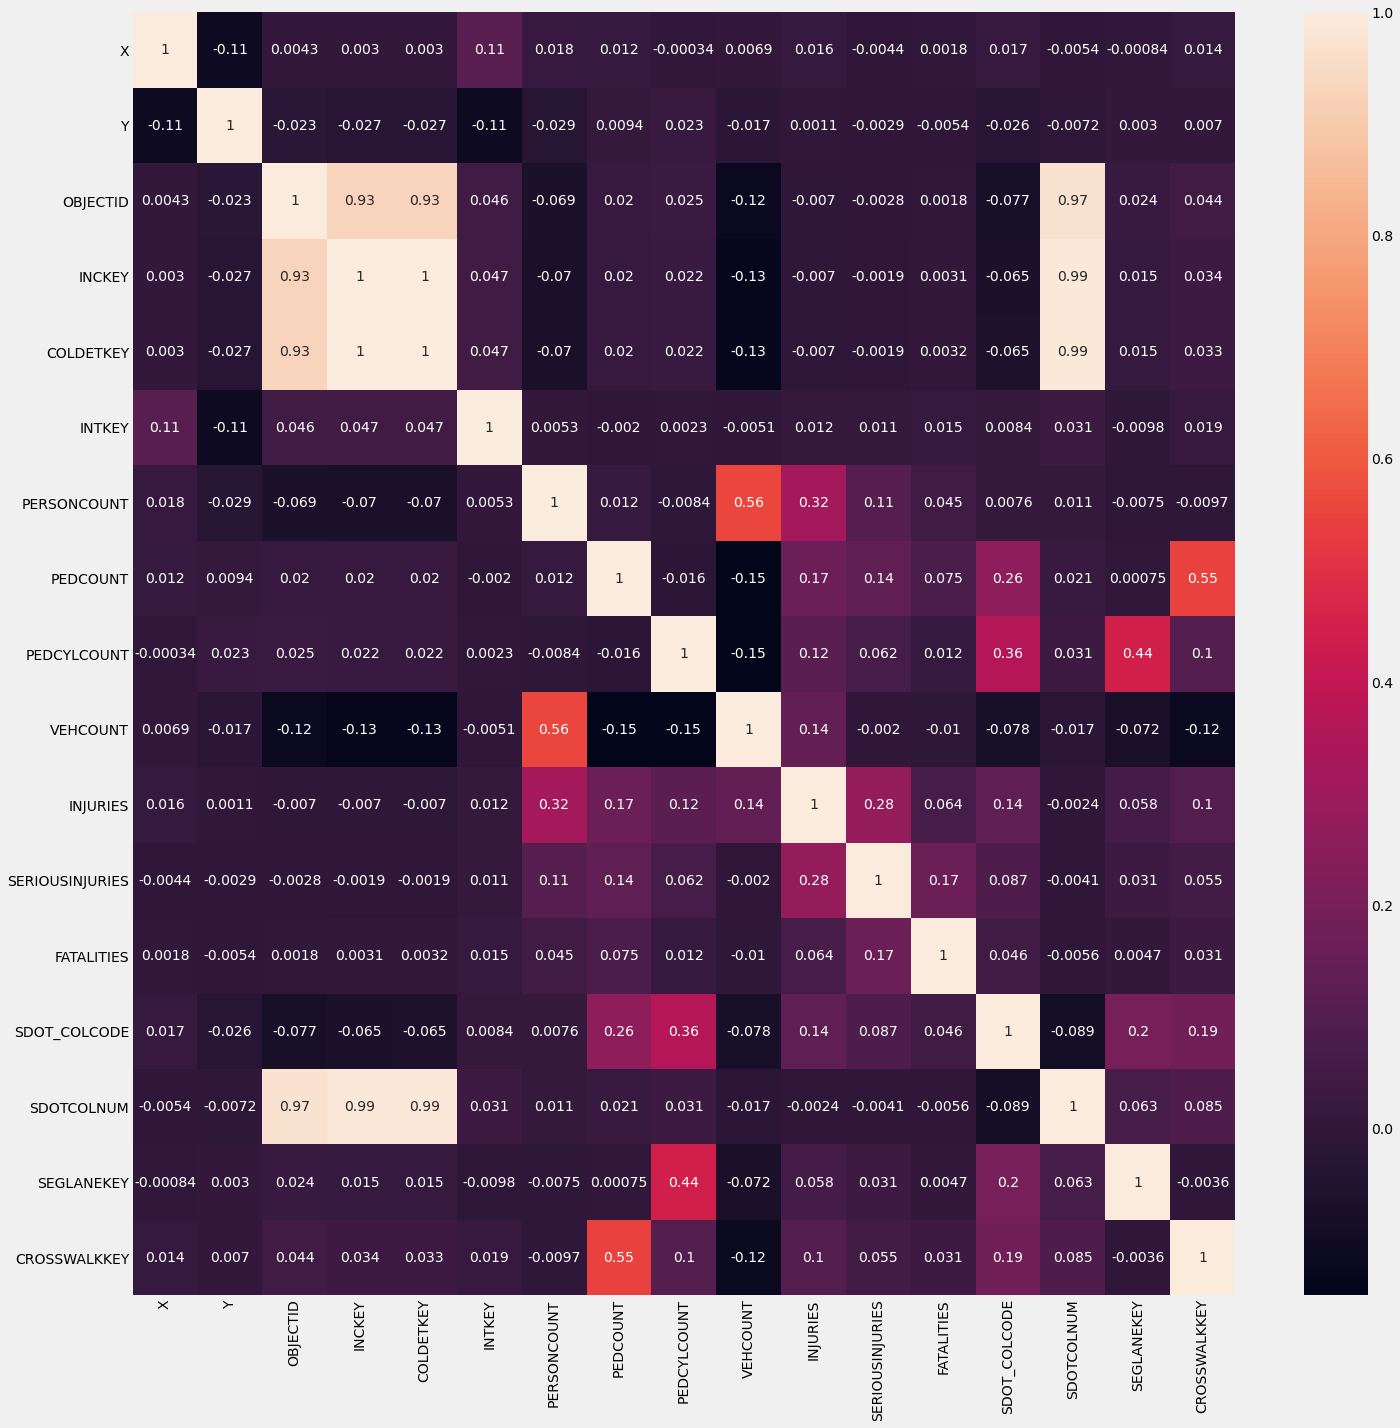

In [8]:
plt.figure(figsize=(22,22))
sns.heatmap(data.corr(),annot=True)

# Biggest take-away from Seaborn heatmaps: severity code has highest correlation with pedestrian and vehicle count. Makes
# sense - many of the features are categorical

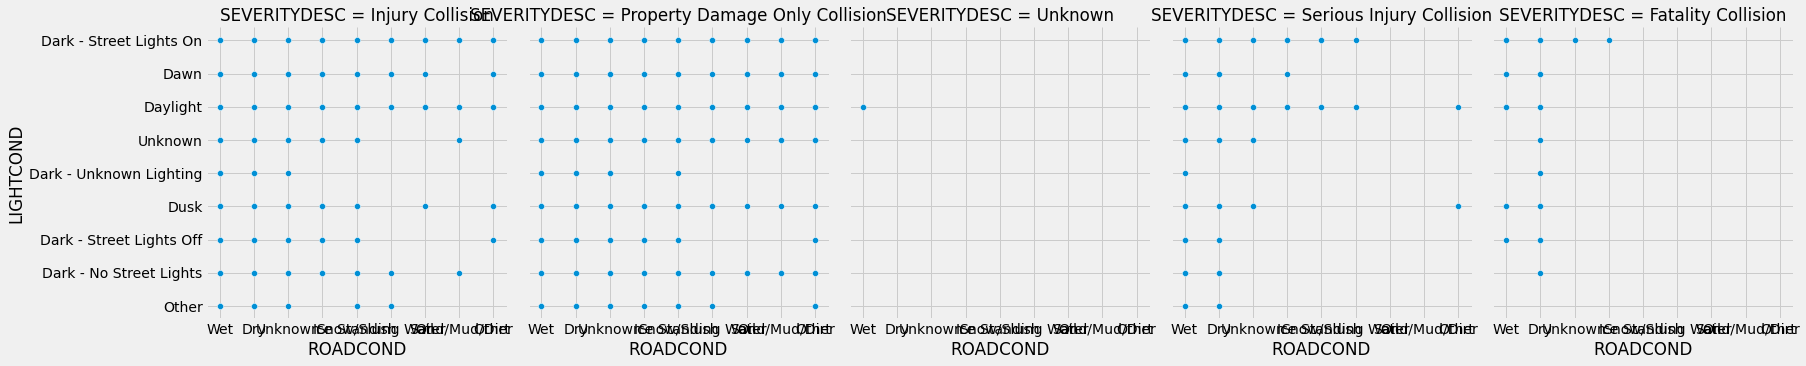

In [9]:
sns.relplot(data=data,x='ROADCOND',y='LIGHTCOND',col='SEVERITYDESC')

In [10]:
#SEVERITYDESC provides a description of the severity code
print("Road severity description types : ",data['SEVERITYDESC'].value_counts())

Road severity description types :  Property Damage Only Collision    140924
Injury Collision                   60238
Unknown                            22623
Serious Injury Collision            3222
Fatality Collision                   374
Name: SEVERITYDESC, dtype: int64


In [11]:
#SEVERITYDESC provides a description of the severity code
print("Road severity description types : ",data['SEVERITYCODE'].value_counts())

Road severity description types :  1     140924
2      60238
0      22622
2b      3222
3        374
Name: SEVERITYCODE, dtype: int64


In [12]:
def for_UNDERINFL(x):
    if x in ['Y','1']:
        return "Y"
    elif x in ['N','0']:
        return "N"
    else:
        return x
    
data["UNDERINFL"] = data["UNDERINFL"].apply(for_UNDERINFL)

In [13]:
temp = data[["SEVERITYCODE","SEVERITYDESC"]]
temp[~(temp.duplicated())].style.hide_index()

In [14]:
data["SEVERITYCODE"].fillna('0', inplace=True)

In [15]:
data["ADDRTYPE"].fillna('Not Mentioned', inplace=True)

In [16]:
#data["MONTH"] = data["INCDATE"].dt.month
#data["YEAR"] = data["INCDATE"].dt.year

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

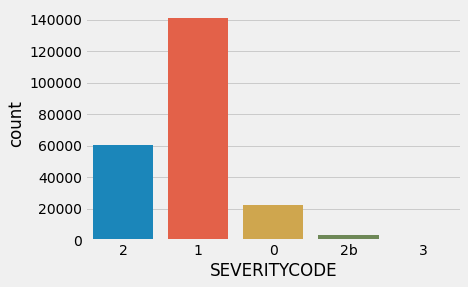

In [17]:
sns.countplot(data["SEVERITYCODE"])

In [18]:
data["SEVERITYCODE"].value_counts(normalize=True)*100

1     61.977034
2     26.492099
0      9.949380
2b     1.417005
3      0.164482
Name: SEVERITYCODE, dtype: float64

In [19]:
data["MONTH"] = data["INCDATE"].dt.month
data["YEAR"] = data["INCDATE"].dt.year

Text(0.5, 1.0, 'Collision count YoY')

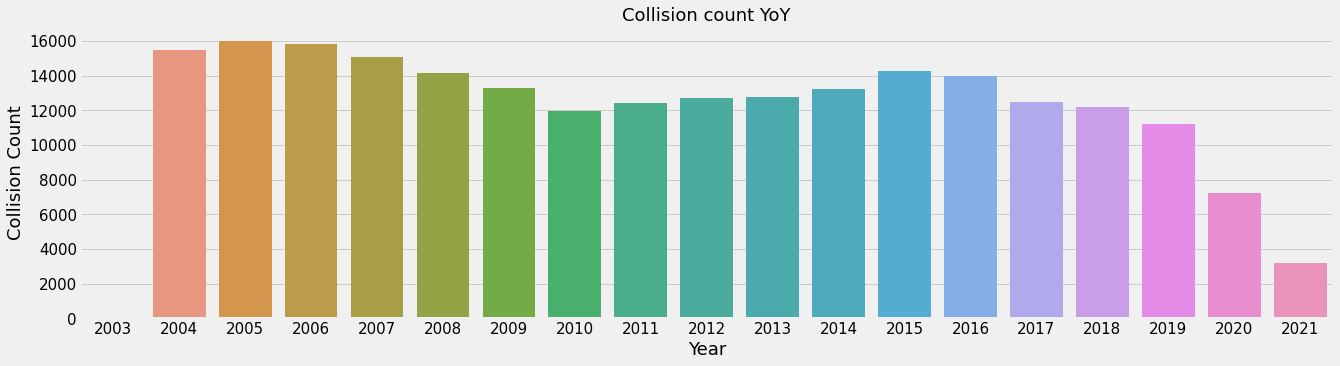

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(data["INCDATE"].dt.year,ax=ax)
ax.set_xlabel('Year', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count YoY", fontsize=18)
# plt.savefig('./blog/1.png')

Text(0.5, 1.0, 'Collision count MoM')

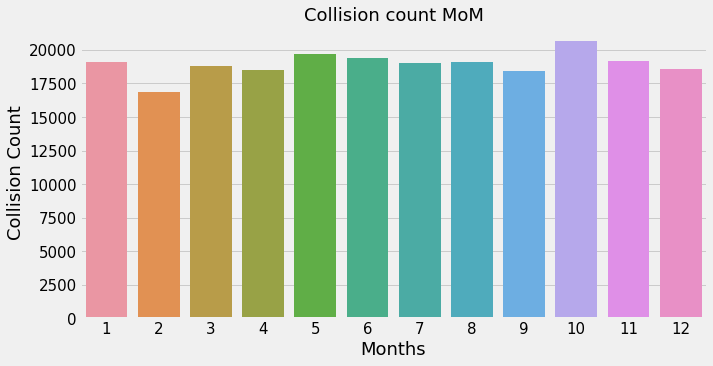

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data["INCDATE"].dt.month,ax=ax)
ax.set_xlabel('Months', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count MoM", fontsize=18)
# plt.savefig('./blog/2.png')

In [22]:
data["INCTIME"] = pd.to_datetime(data["INCDTTM"])
for idx, dt in enumerate(data["INCDTTM"]):
    if ':' not in dt:
        data["INCTIME"][idx] = np.nan

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
data["TIMEOFDAY"] = pd.cut(data["INCTIME"].dt.hour, bins=b, labels=l, include_lowest=True)

In [23]:
1 - (data["TIMEOFDAY"].isnull().sum() / len(data))

0.7602306261297118

In [24]:
pd.DataFrame({'TIME' : ['00:00 to 04:00', '04:00 to 08:00', '08:00 to 12:00', '12:00 to 16:00', '16:00 to 20:00', '20:00 to 00:00']},
             index=['Late Night', 'Early Morning','Morning','Noon','Eve','Night'])

TIME
Late Night     00:00 to 04:00
Early Morning  04:00 to 08:00
Morning        08:00 to 12:00
Noon           12:00 to 16:00
Eve            16:00 to 20:00
Night          20:00 to 00:00

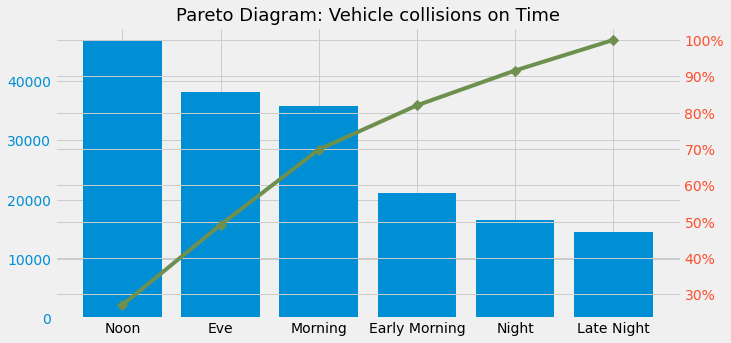

In [25]:
data_TOD = pd.DataFrame(data['OBJECTID'].groupby(data['TIMEOFDAY'].astype('object')).count())
data_TOD = data_TOD.sort_values(by='OBJECTID',ascending=False)
data_TOD["cumpercentage"] = data_TOD["OBJECTID"].cumsum()/data_TOD["OBJECTID"].sum()*100


fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax.bar(data_TOD.index, data_TOD["OBJECTID"])
ax2.plot(data_TOD.index, data_TOD["cumpercentage"], color="C9", marker="D", ms=7)
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.title("Pareto Diagram: Vehicle collisions on Time", fontsize=18)

# plt.savefig('./blog/4.png')
plt.show()

In [26]:
pd.DataFrame(data['OBJECTID'].groupby(data['TIMEOFDAY']).count())

OBJECTID
TIMEOFDAY              
Late Night        14543
Early Morning     21030
Morning           35806
Noon              46758
Eve               38146
Night             16579

<AxesSubplot:xlabel='TIMEOFDAY', ylabel='count'>

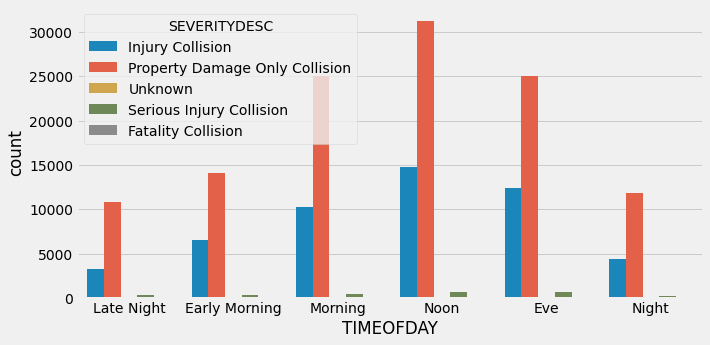

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data["TIMEOFDAY"], hue=data['SEVERITYDESC'],ax=ax)

In [28]:
pd.crosstab(data.TIMEOFDAY, data.SEVERITYCODE)

SEVERITYCODE   0      1      2   2b   3
TIMEOFDAY                              
Late Night     0  10868   3293  325  57
Early Morning  1  14097   6555  340  37
Morning        4  24983  10327  448  44
Noon           1  31243  14774  674  66
Eve            0  25047  12353  679  67
Night          0  11810   4419  307  43

array([<AxesSubplot:ylabel='Fatality Collision'>,
       <AxesSubplot:ylabel='Injury Collision'>,
       <AxesSubplot:ylabel='Property Damage Only Collision'>,
       <AxesSubplot:ylabel='Serious Injury Collision'>], dtype=object)

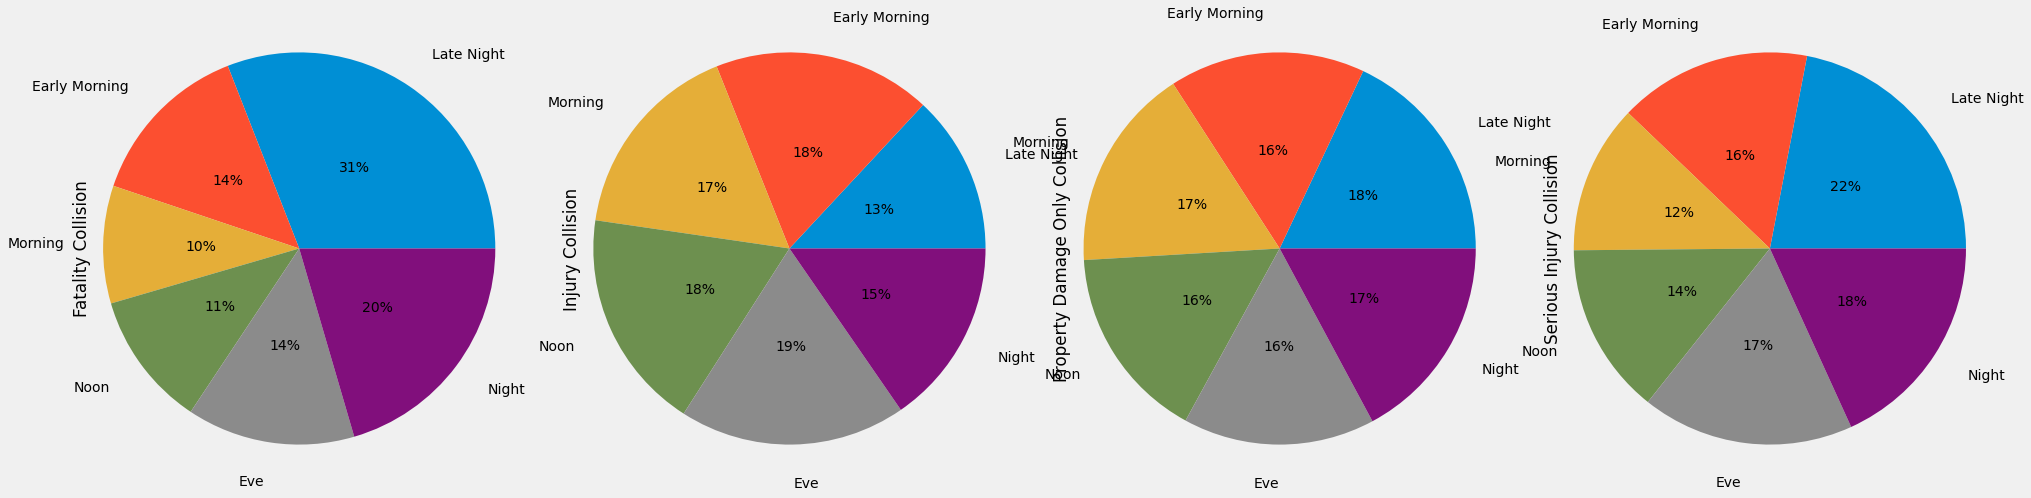

In [29]:
fig, ax = plt.subplots(figsize=(30,20))
data_temp = data.copy()
data_temp = data_temp[data_temp["SEVERITYCODE"]!='0']
(pd.crosstab(data_temp.TIMEOFDAY, data_temp.SEVERITYDESC).apply(lambda r: r/r.sum(), axis=1)*100).plot.pie(subplots=True, ax=ax, autopct='%1.0f%%', pctdistance=0.5,labeldistance=1.2, radius=1.2, legend=None)
# plt.savefig('./blog/5.png')

In [30]:
(pd.crosstab(data.TIMEOFDAY, data.SEVERITYDESC).apply(lambda r: r/r.sum(), axis=1)*100)

SEVERITYDESC   Fatality Collision  Injury Collision  \
TIMEOFDAY                                             
Late Night               0.391941         22.643196   
Early Morning            0.175939         31.169757   
Morning                  0.122884         28.841535   
Noon                     0.141152         31.596732   
Eve                      0.175641         32.383474   
Night                    0.259364         26.654201   

SEVERITYDESC   Property Damage Only Collision  Serious Injury Collision  \
TIMEOFDAY                                                                 
Late Night                          74.730111                  2.234752   
Early Morning                       67.032810                  1.616738   
Morning                             69.773222                  1.251187   
Noon                                66.818512                  1.441465   
Eve                                 65.660882                  1.780003   
Night                               71.234694                  1.851740   

SEVERITYDESC    Unknown  
TIMEOFDAY                
Late Night     0.000000  
Early Morning  0.004755  
Morning        0.011171  
Noon           0.002139  
Eve            0.000000  
Night          0.000000

array([<AxesSubplot:ylabel='SPEEDING'>], dtype=object)

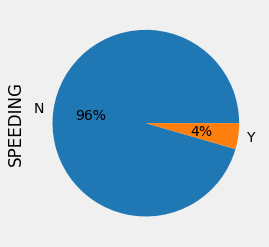

In [31]:
sns.set_palette(sns.color_palette("tab10",10))
speed = data["SPEEDING"]
speed = speed.fillna("N")
speed.value_counts(normalize=True).plot.pie(subplots=True, autopct='%1.0f%%')
# plt.savefig('./blog/6.png')

array([<AxesSubplot:ylabel='OBJECTID'>], dtype=object)

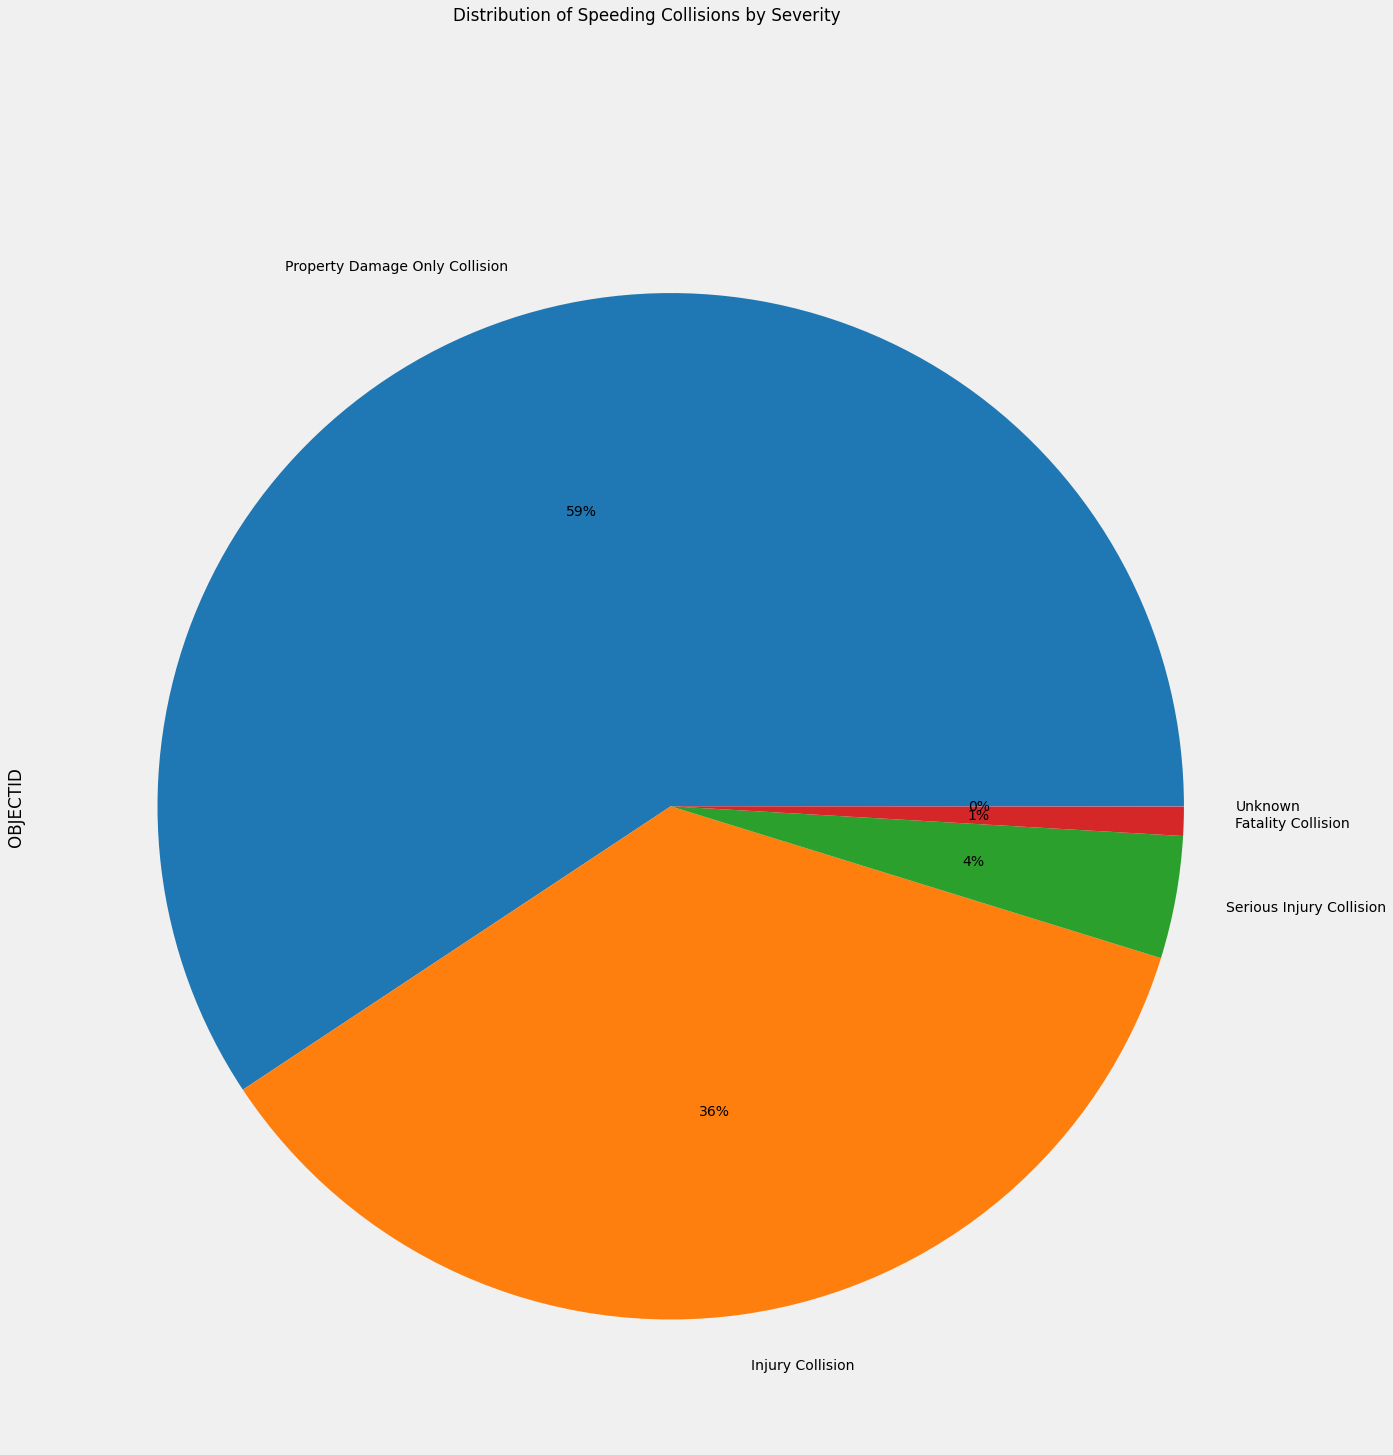

In [32]:
((data[data["SPEEDING"]=="Y"].groupby("SEVERITYDESC")["OBJECTID"].count().sort_values(ascending=False) / data[data["SPEEDING"]=="Y"].groupby("SEVERITYCODE")["OBJECTID"].count().sum())*100).plot.pie(subplots=True,
figsize=(22,22), autopct='%1.0f%%' , title="Distribution of Speeding Collisions by Severity")
# plt.savefig('./blog/7.png')

array([<AxesSubplot:ylabel='SEVERITYDESC'>], dtype=object)

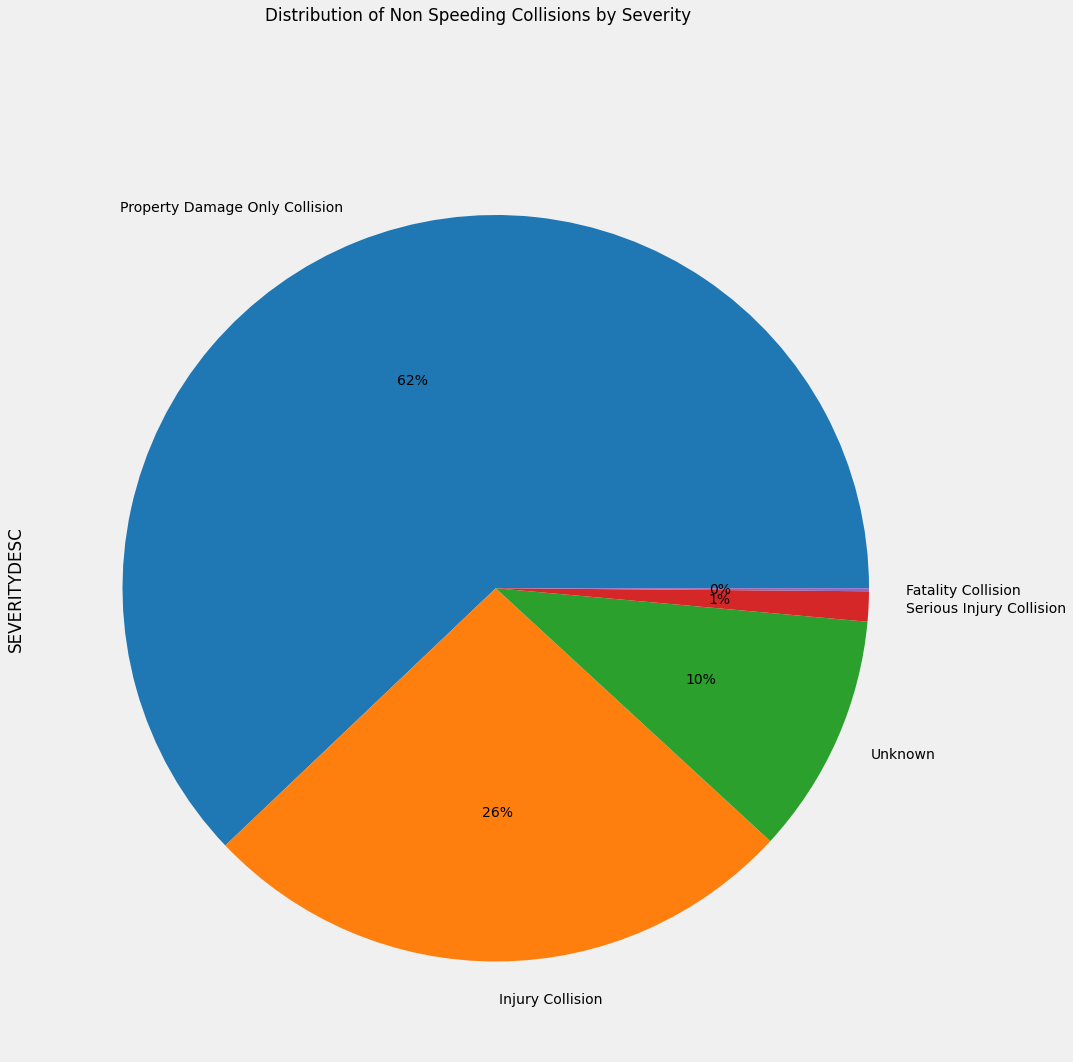

In [33]:
(data[data["SPEEDING"].isnull()]["SEVERITYDESC"].value_counts(normalize=True)*100).plot.pie(subplots=True,figsize=(16,16), autopct='%1.0f%%', title="Distribution of Non Speeding Collisions by Severity")
# plt.savefig('./blog/8.png')

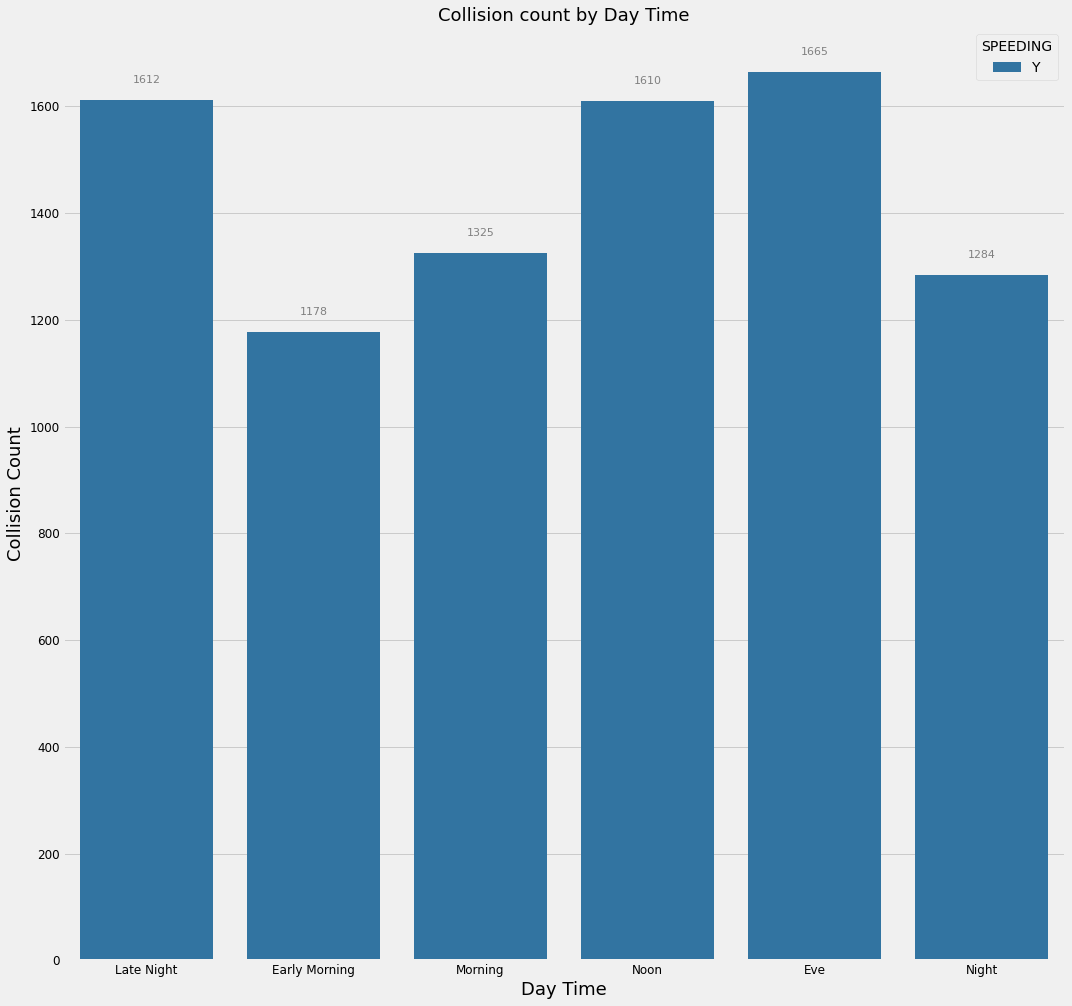

In [34]:
fig, ax = plt.subplots(figsize=(16,16))
sns.countplot(data["TIMEOFDAY"], hue=data['SPEEDING'],ax=ax)
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count by Day Time", fontsize=18)
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
# plt.savefig('./blog/9.png')

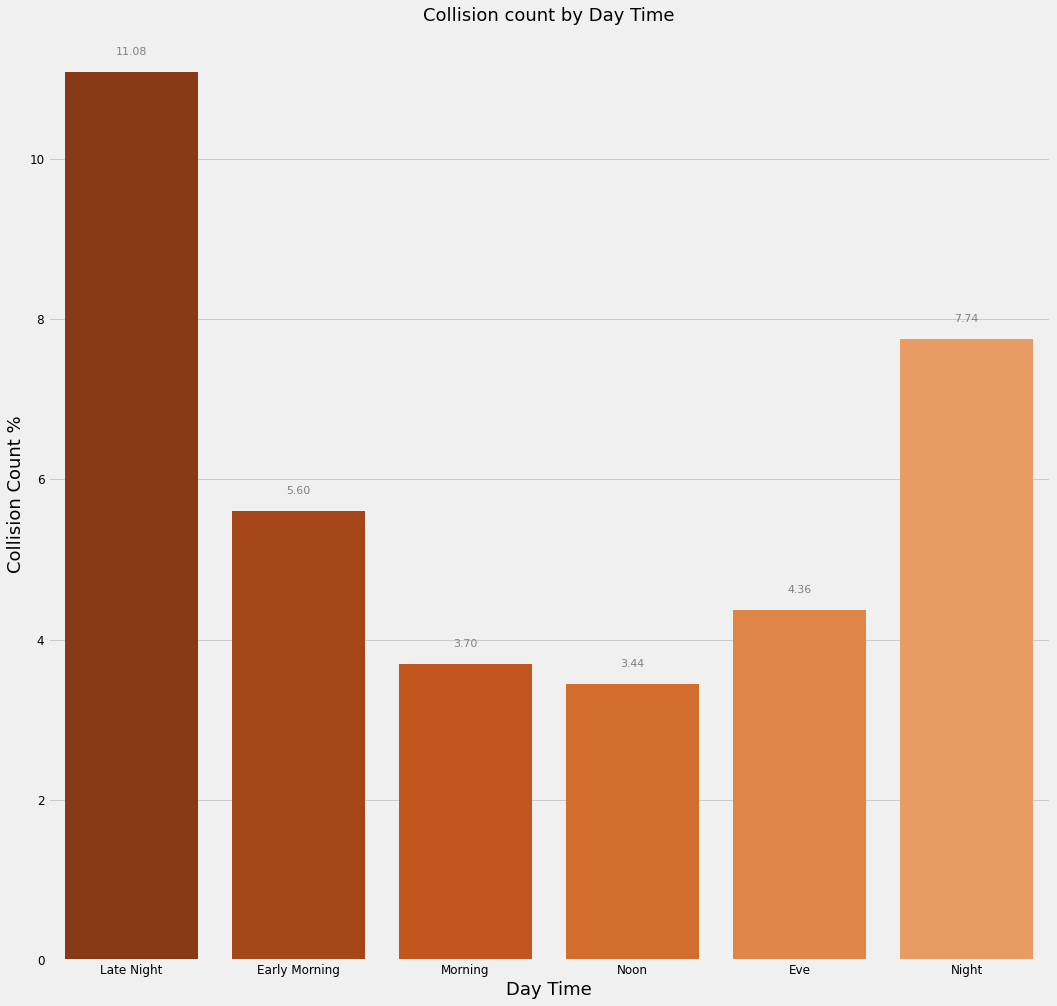

In [35]:
sns.set_palette(sns.color_palette("Oranges_r",10))
fig, ax = plt.subplots(figsize=(16,16))
sns.barplot(y=(data.groupby('TIMEOFDAY')['SPEEDING'].apply(lambda x: x[x == 'Y'].count()) /data.groupby('TIMEOFDAY')['OBJECTID'].count())*100, x=list(data.groupby('TIMEOFDAY').groups.keys()),ax=ax)
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("Collision count by Day Time", fontsize=18)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
# plt.savefig('./blog/10.png')

Text(0.5, 1.0, 'Collision type by count of Speeding collisions')

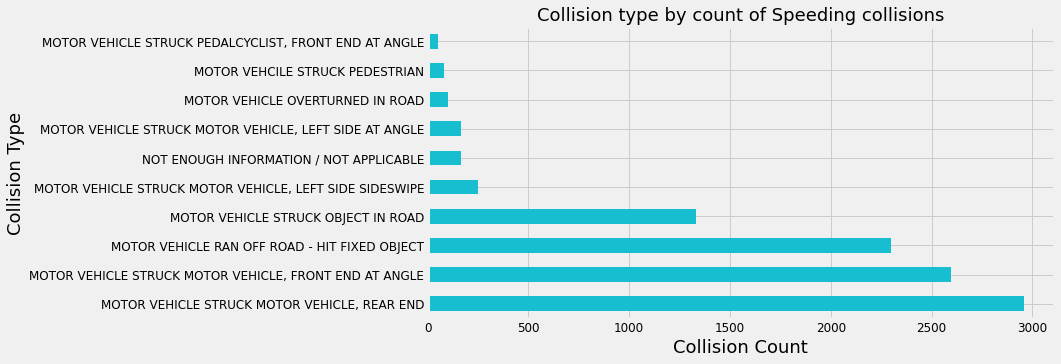

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette(sns.color_palette("tab10_r",10))
data[(data["SPEEDING"]=="Y")].groupby("SDOT_COLDESC")["OBJECTID"].count().sort_values(ascending=False).head(10).plot.barh(ax=ax)
ax.set_xlabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Type', fontsize=18)
plt.title("Collision type by count of Speeding collisions", fontsize=18)
# plt.savefig('./blog/11.png')

Text(0.5, 1.0, 'Location by count of Speeding collisions')

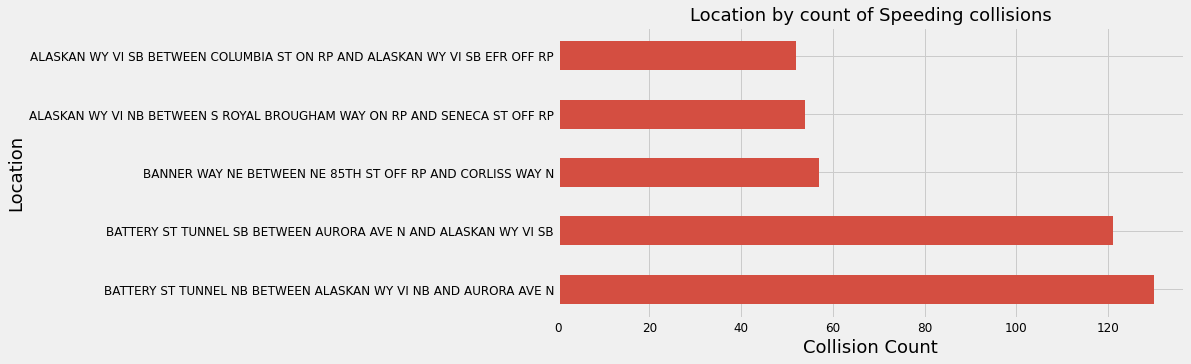

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette(sns.color_palette("coolwarm_r",10))
data[data["SPEEDING"]=="Y"].groupby("LOCATION")["OBJECTID"].count().sort_values(ascending=False).head(5).plot.barh() 
ax.set_xlabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Location', fontsize=18)
plt.title("Location by count of Speeding collisions", fontsize=18)
# plt.savefig('./blog/12.png')

In [38]:
m = folium.Map(location=[data["Y"].mean(), data["X"].mean()], zoom_start=12)
folium.Marker((47.69034175,-122.3290808),popup="MOST SPEEDING COLLISIONS: BATTERY ST TUNNEL").add_to(m)    
m

Text(0.5, 1.0, 'Collision count by Day time for Inattentive driving collisions')

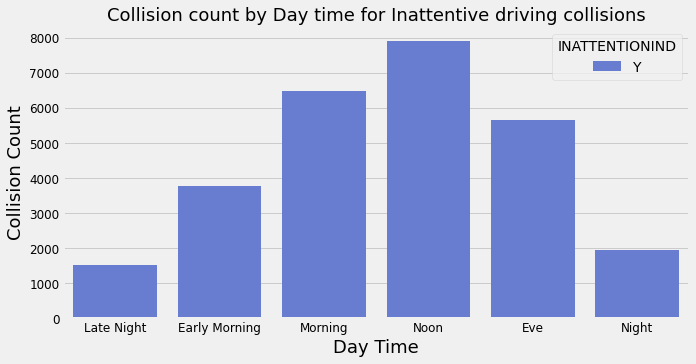

In [39]:
sns.set_palette(sns.color_palette("coolwarm",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data["TIMEOFDAY"], hue=data['INATTENTIONIND'],ax=ax)
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count by Day time for Inattentive driving collisions", fontsize=18)
# plt.savefig('./blog/14.png')

Text(0.5, 1.0, '% of Collision count by Day time for Inattentive driving collisions')

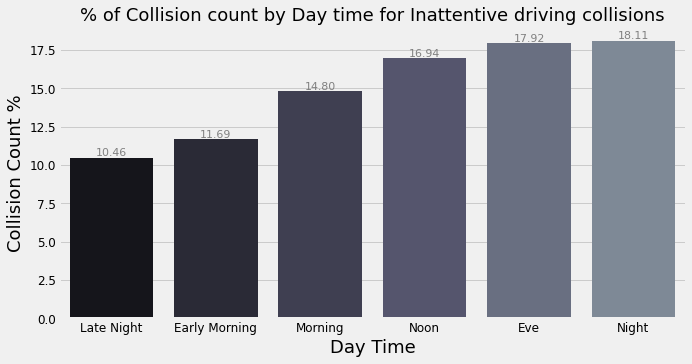

In [40]:
sns.set_palette(sns.color_palette("bone",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=((data.groupby('TIMEOFDAY')['INATTENTIONIND'].apply(lambda x: x[x == 'Y'].count()) /data.groupby('TIMEOFDAY')['OBJECTID'].count())*100).sort_values(), x=list(data.groupby('TIMEOFDAY').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("% of Collision count by Day time for Inattentive driving collisions", fontsize=18)
# plt.savefig('./blog/15.png')

Text(0.5, 1.0, 'Collision type by count for Inattentive driving collisions')

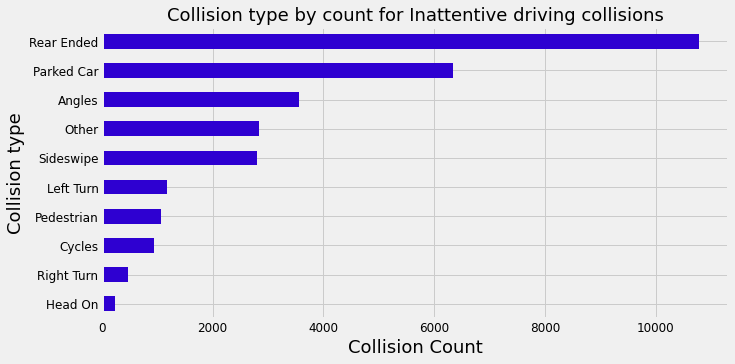

In [41]:
sns.set_palette(sns.color_palette("brg",10))
fig, ax = plt.subplots(figsize=(10,5))
(data[data["INATTENTIONIND"]=="Y"].groupby("COLLISIONTYPE")["OBJECTID"].count().sort_values()).plot.barh()
ax.set_xlabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision type', fontsize=18)
plt.title("Collision type by count for Inattentive driving collisions", fontsize=18)
# plt.savefig('./blog/16.png')

In [42]:
(data[data["INATTENTIONIND"]=="Y"].groupby("COLLISIONTYPE")["OBJECTID"].count().sort_values(ascending=False))[0]/(data[data["INATTENTIONIND"]=="Y"].groupby("COLLISIONTYPE")["OBJECTID"].count().sum()) * 100

35.68589786050209

Text(0.5, 1.0, 'Collision count by Day time for under influenced driving collisions')

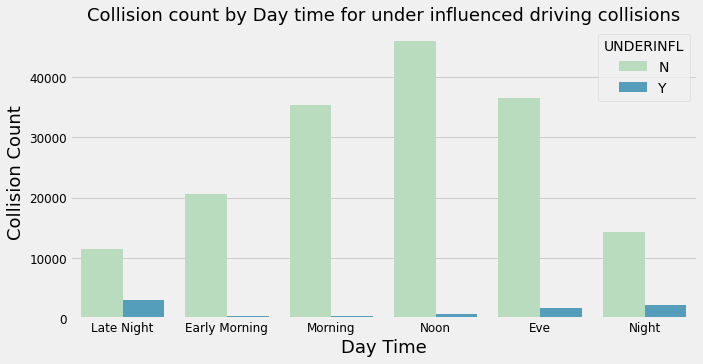

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette(sns.color_palette("GnBu",2))
sns.countplot(data["TIMEOFDAY"], hue=data['UNDERINFL'],ax=ax)
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count by Day time for under influenced driving collisions", fontsize=18)
# plt.savefig('./blog/17.png')

In [44]:
pd.crosstab(data.TIMEOFDAY, data.UNDERINFL).apply(lambda x: (x/x.sum())*100, axis=0)

UNDERINFL              N          Y
TIMEOFDAY                          
Late Night      6.962437  36.961722
Early Morning  12.580777   4.007177
Morning        21.545682   4.306220
Noon           28.005374   8.241627
Eve            22.179128  19.880383
Night           8.726603  26.602871

Text(0.5, 1.0, 'Collision count by Month for under influenced driving collisions')

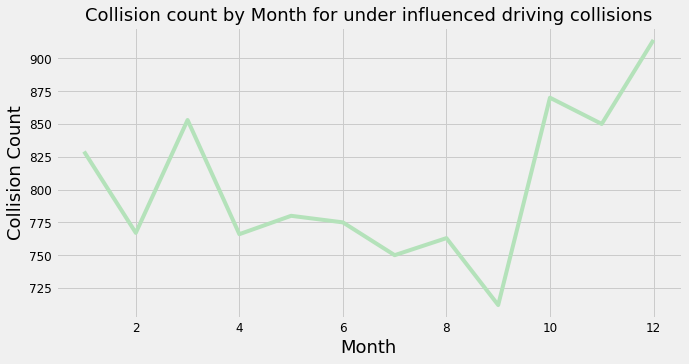

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
data[data["UNDERINFL"]=="Y"].groupby("MONTH")["OBJECTID"].count().plot(ax=ax)
ax.set_xlabel('Month', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count by Month for under influenced driving collisions", fontsize=18)
# plt.savefig('./blog/19.png')

Text(0.5, 1.0, 'Location by Collision count for under influenced driving collisions')

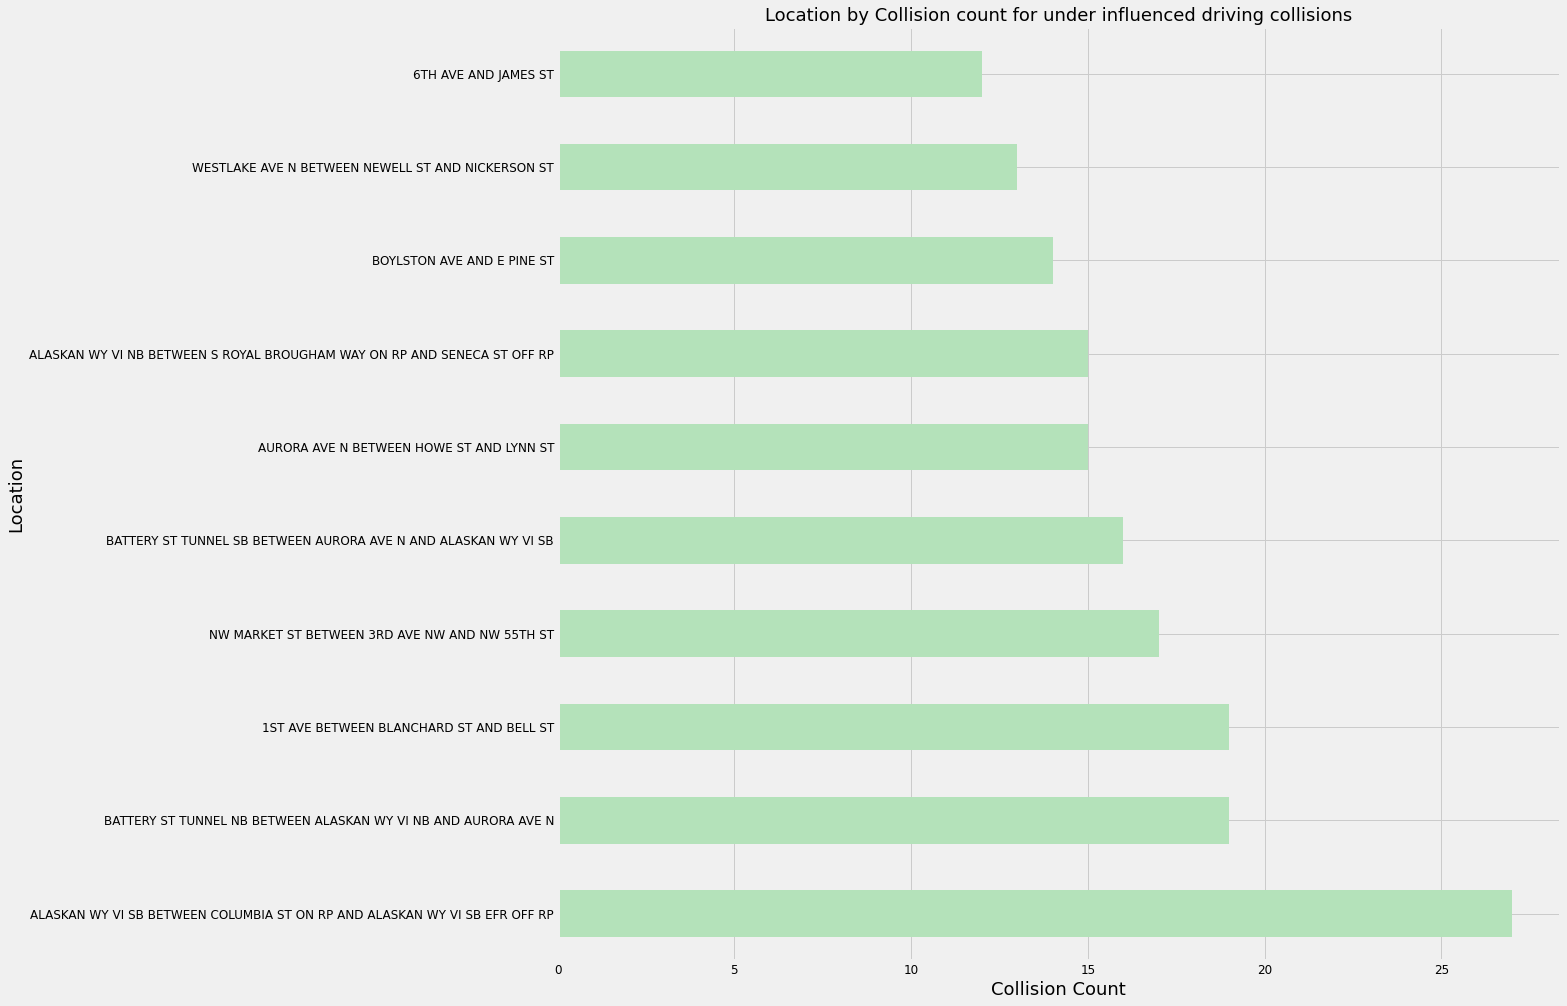

In [46]:
fig, ax = plt.subplots(figsize=(16,16))
data[data["UNDERINFL"]=="Y"].groupby("LOCATION")["OBJECTID"].count().sort_values(ascending=False).head(10).plot.barh(ax=ax)
ax.set_xlabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Location', fontsize=18)
plt.title("Location by Collision count for under influenced driving collisions", fontsize=18)
# plt.savefig('./blog/20.png')

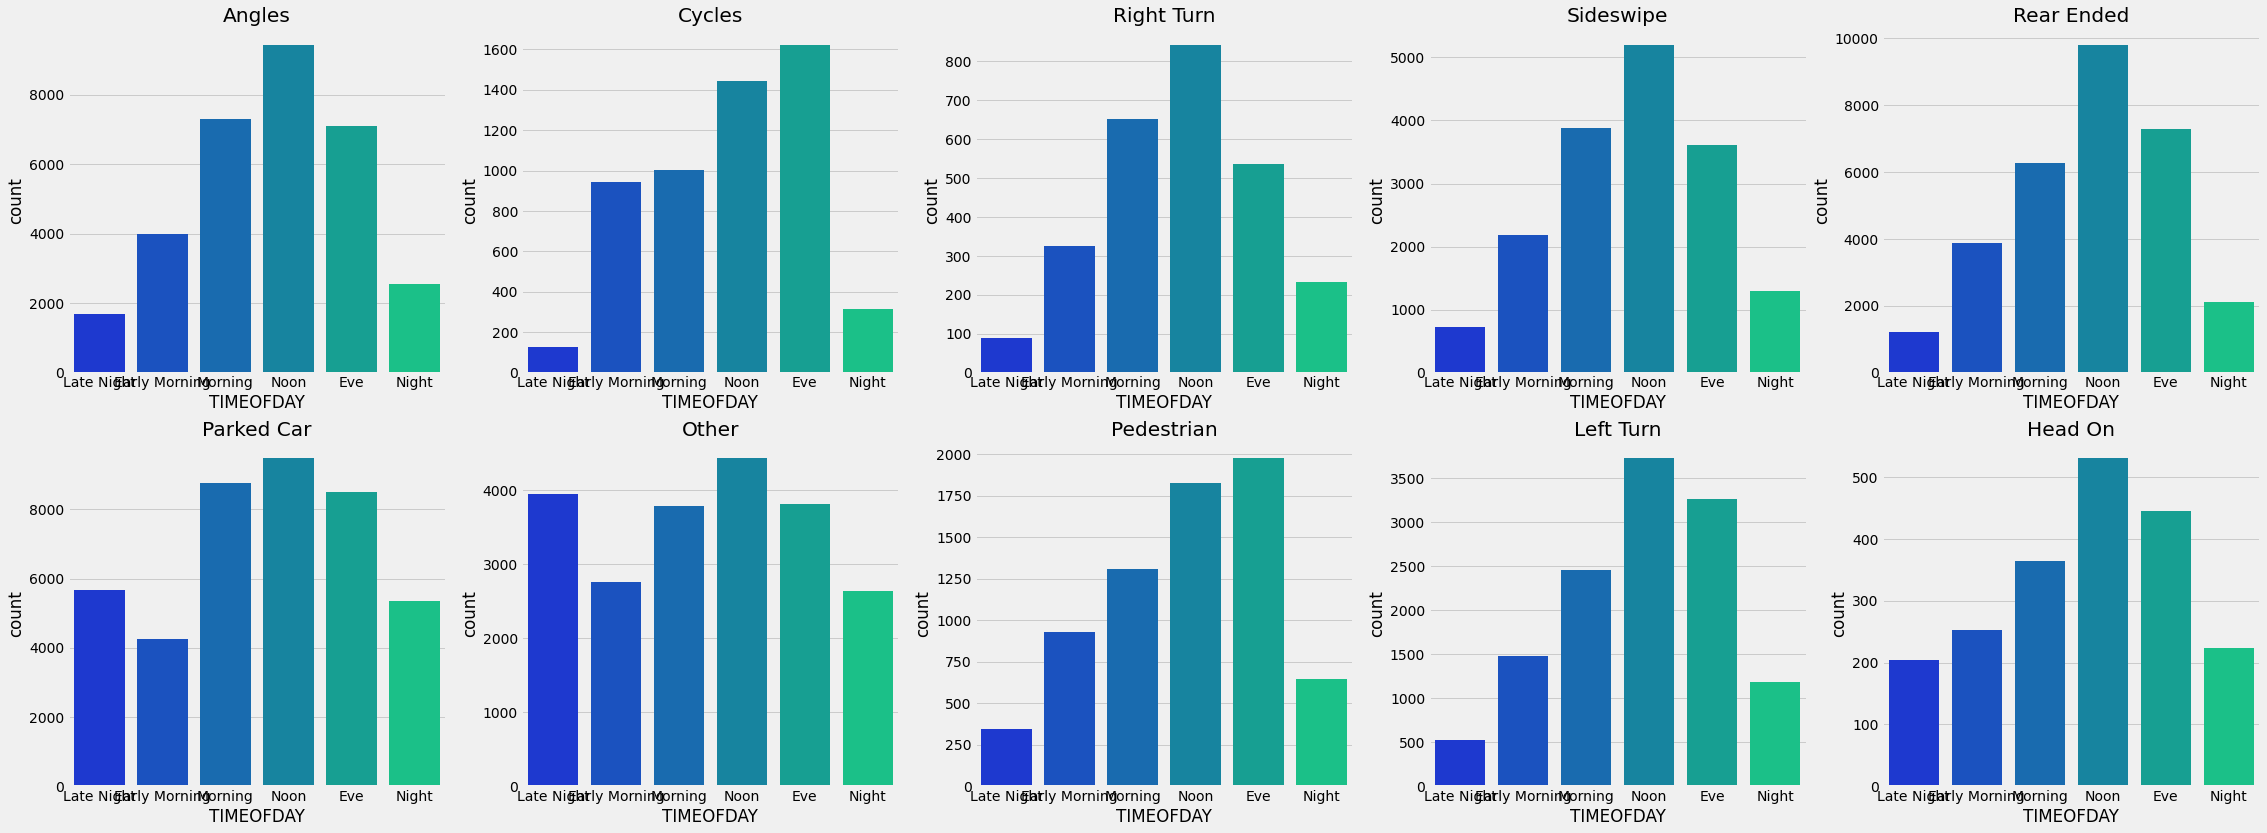

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(35,13))
sns.set_palette(sns.color_palette("winter"))
col_type = list(data['COLLISIONTYPE'].unique())
(col_type).remove(np.nan)

for i in range(0,2):
    for j in range(0,5):
        sns.countplot(data[data['COLLISIONTYPE'] == col_type[0]]['TIMEOFDAY'], ax=ax[i,j])
        ax[i,j].set_title(col_type[0])
        col_type.pop(0)
# plt.savefig('./blog/21.png')

In [48]:
pd.crosstab(data.COLLISIONTYPE, data.TIMEOFDAY).apply(lambda r: (r/r.sum())*100, axis=0)

TIMEOFDAY      Late Night  Early Morning    Morning       Noon        Eve  \
COLLISIONTYPE                                                               
Angles          11.648216      19.029727  20.373785  20.186096  18.585324   
Cycles           0.887025       4.494649   2.801989   3.093048   4.257662   
Head On          1.402737       1.203329   1.019667   1.135829   1.166662   
Left Turn        3.596232       7.048751   6.872276   7.974332   8.546784   
Other           27.174586      13.136742  10.587775   9.490909   9.996592   
Parked Car      38.912191      20.233056  24.494357  20.282353  22.279317   
Pedestrian       2.379151       4.428062   3.662420   3.903743   5.180505   
Rear Ended       8.430173      18.525565  17.521511  21.001070  19.130640   
Right Turn       0.618854       1.550535   1.818639   1.803209   1.402616   
Sideswipe        4.950835      10.349584  10.847581  11.129412   9.453897   

TIMEOFDAY          Night  
COLLISIONTYPE             
Angles         15.478345  
Cycles          1.900109  
Head On         1.345156  
Left Turn       7.148028  
Other          15.948848  
Parked Car     32.271685  
Pedestrian      3.878634  
Rear Ended     12.806129  
Right Turn      1.399445  
Sideswipe       7.823622

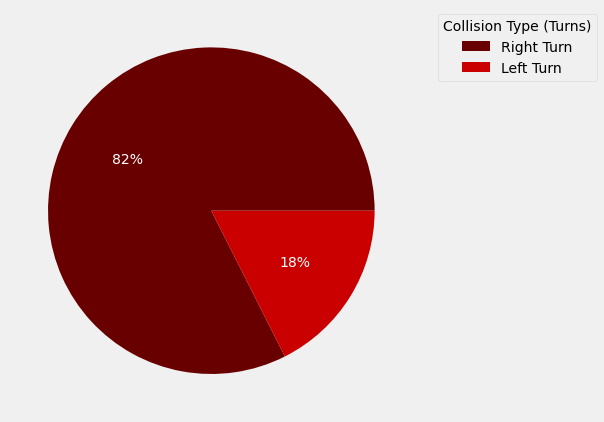

In [49]:
sns.set_palette(sns.color_palette("hot"))
tempdf = data[(data["COLLISIONTYPE"]=="Left Turn")|(data["COLLISIONTYPE"]=="Right Turn")]
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(tempdf["COLLISIONTYPE"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.0f%%')

ax.legend(tempdf["COLLISIONTYPE"],
          title="Collision Type (Turns)",
          loc="upper center",
          bbox_to_anchor=(1, 0, 0.5, 1))
# plt.savefig('./blog/24.png')
plt.show()

In [50]:
((data[data["COLLISIONTYPE"]=="Left Turn"]["OBJECTID"].count() - data[data["COLLISIONTYPE"]=="Right Turn"]["OBJECTID"].count()) / data[(data["COLLISIONTYPE"]=="Right Turn")|(data["COLLISIONTYPE"]=="Left Turn")]["OBJECTID"].count()) * 100

64.88234957348142

In [51]:
data[data["COLLISIONTYPE"]=="Left Turn"].groupby("ADDRTYPE")["OBJECTID"].count()

ADDRTYPE
Block             2232
Intersection     12138
Not Mentioned       30
Name: OBJECTID, dtype: int64

In [52]:
data[data["COLLISIONTYPE"]=="Right Turn"].groupby("ADDRTYPE")["OBJECTID"].count()

ADDRTYPE
Block            1277
Intersection     1774
Not Mentioned      16
Name: OBJECTID, dtype: int64

In [53]:
sns.set_palette(sns.color_palette("Paired"))
x = pd.DataFrame(data[(data["COLLISIONTYPE"]=='Other')&(data["TIMEOFDAY"]=='Late Night')].groupby('SDOT_COLDESC')['OBJECTID'].count()).sort_values(by='OBJECTID', ascending=False)

In [54]:
others_values = x["OBJECTID"].tail(12).sum()
x.drop(x.tail(12).index,inplace=True)
x = x.append(pd.DataFrame(data={"OBJECTID":others_values}, index=["Others Remaining"]))

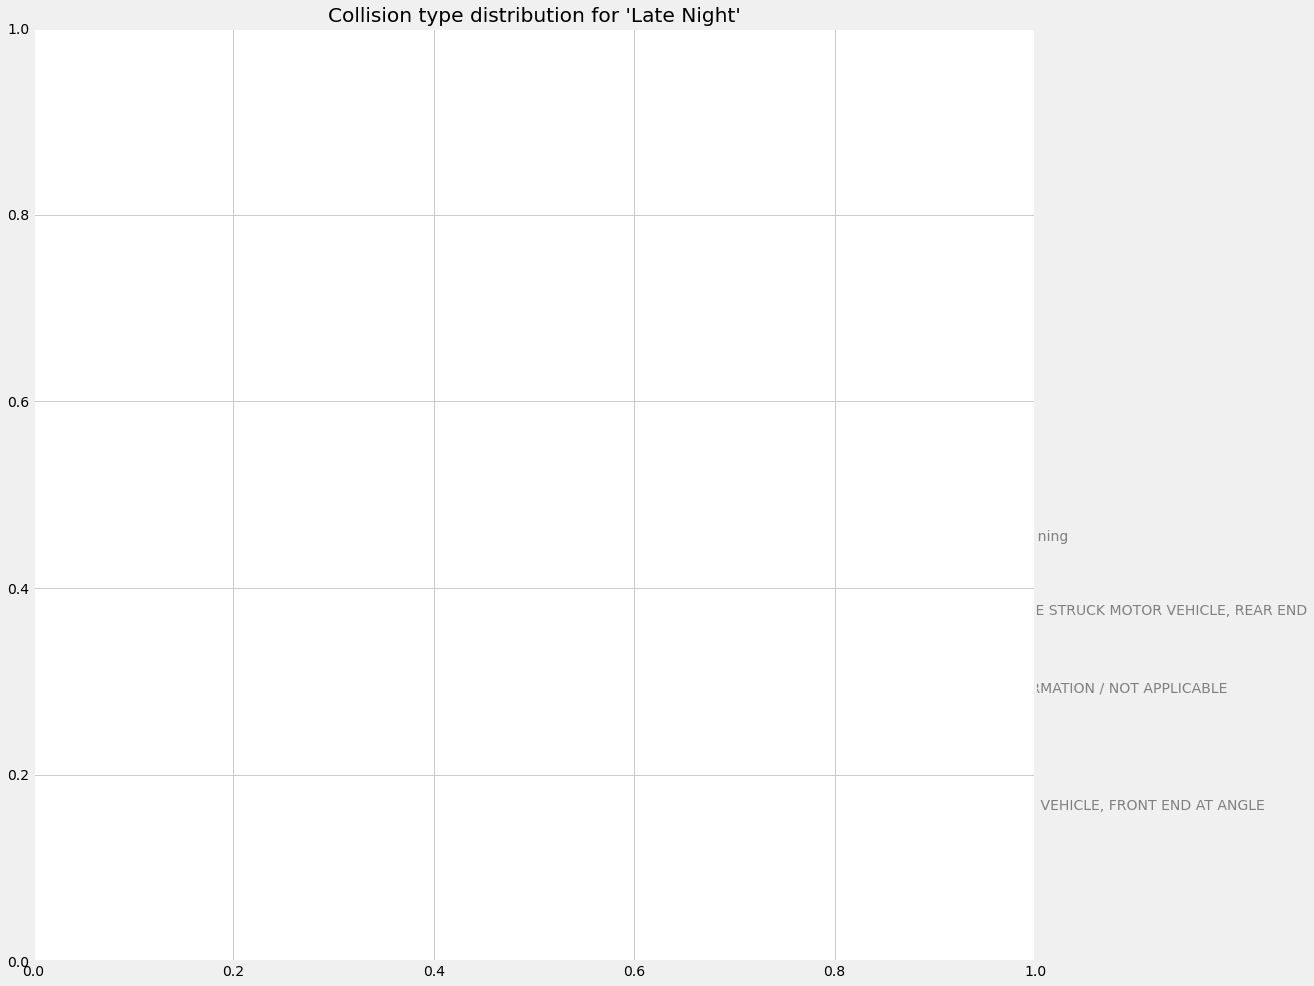

In [55]:
x.plot(kind='pie',subplots=True,figsize=(16,16), autopct='%1.0f%%',textprops={'color':"grey", 'fontsize': 14}, explode=(0.1,0.1,0,0,0,0))
plt.axes().set_facecolor("white")
#plt.axes().get_legend().remove()
plt.title("Collision type distribution for 'Late Night'")
# plt.savefig('./blog/25.png')
plt.show()

<AxesSubplot:xlabel='count', ylabel='SDOT_COLDESC'>

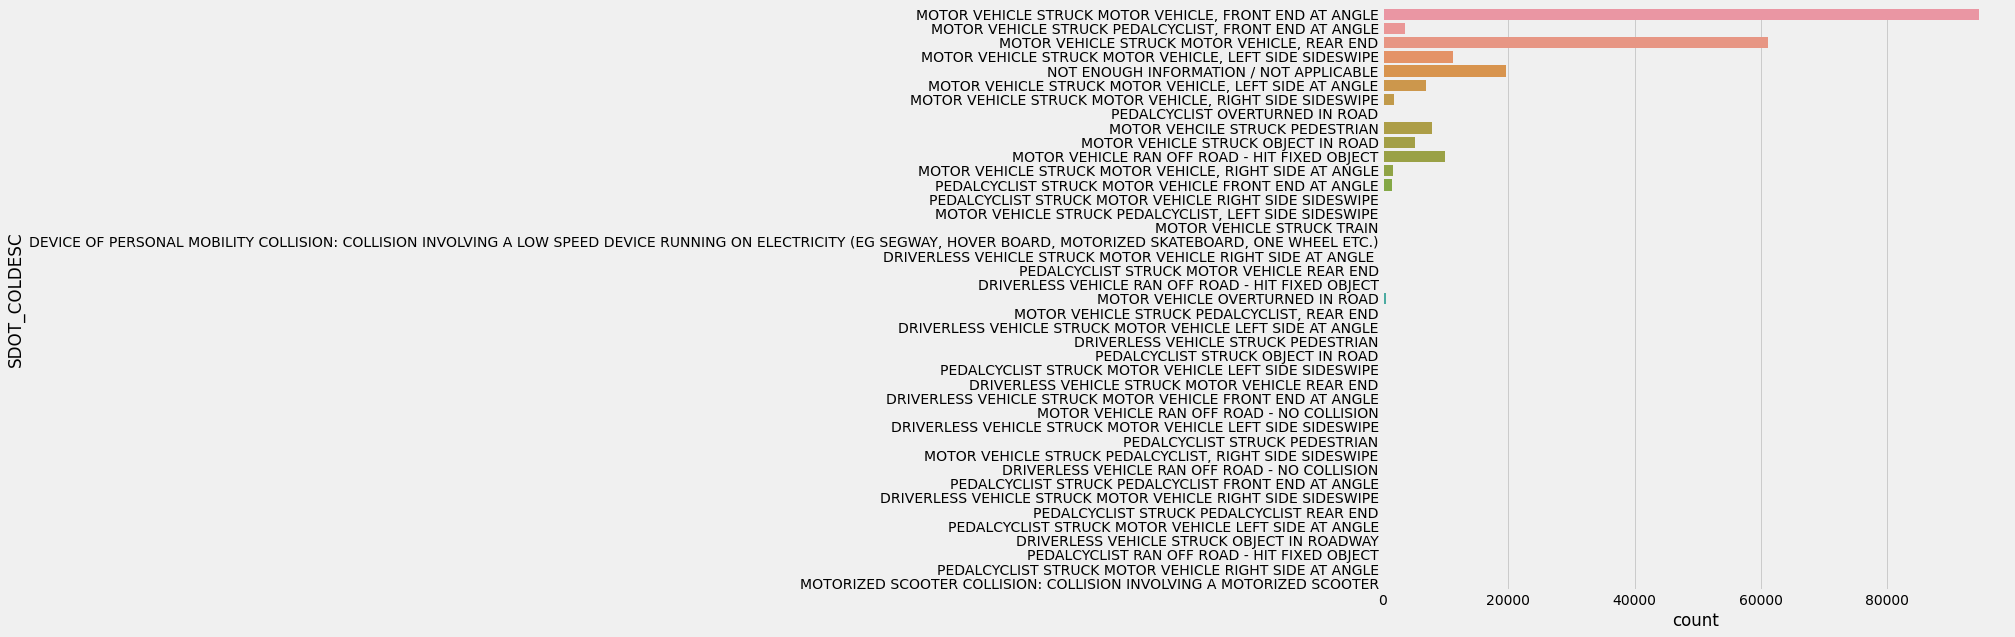

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y=data['SDOT_COLDESC'],ax=ax,orient="h")

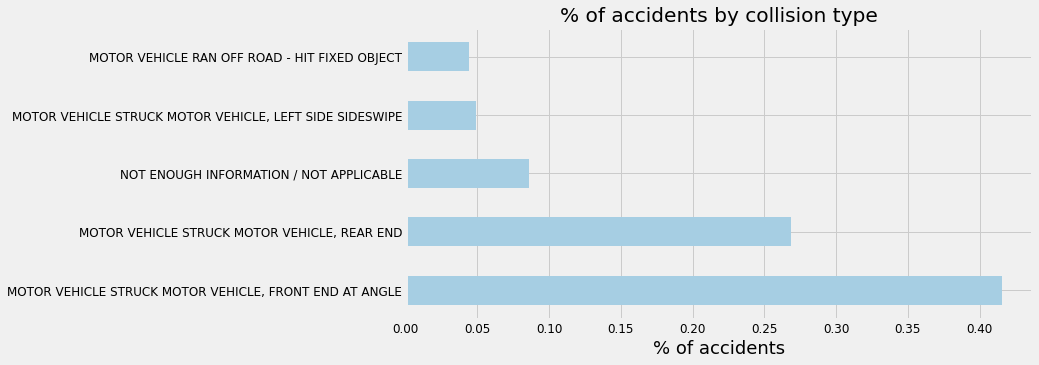

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
data['SDOT_COLDESC'].value_counts(normalize=True).head(5).plot.barh(title="% of accidents by collision type",ax=ax)
ax.set_xlabel('% of accidents', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
# ax.set_ylabel('Collision Count', fontsize=18)
# plt.title("Collision count by Month for under influenced driving collisions", fontsize=18)
# plt.savefig('./blog/26.png')

In [58]:
df1 = data.copy()

df1["COLLISIONTYPE"].fillna("Unknown",inplace=True)
df1["SDOT_COLDESC"].fillna("Unknown",inplace=True)
fig = px.sunburst(
    data_frame=df1[~df1["TIMEOFDAY"].isnull()],
    path= ["TIMEOFDAY",'COLLISIONTYPE',"SDOT_COLDESC"], 
    color="TIMEOFDAY",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth=-1,                        
    branchvalues="total", 
    title="Breakdown of collision type by time",
)
fig.update_traces(textinfo='label+percent entry') # percent parent
fig.update_layout(margin=dict(t=30, b=10, r=10, l=10),
                  width=1000, height=1000)
fig.show()

In [59]:
pd.crosstab(data.COLLISIONTYPE, data.TIMEOFDAY).apply(lambda r: ((r/r.sum())*100).round(2), axis=1)

TIMEOFDAY      Late Night  Early Morning  Morning   Noon    Eve  Night
COLLISIONTYPE                                                         
Angles               5.28          12.47    22.73  29.42  22.10   8.00
Cycles               2.36          17.30    18.36  26.47  29.73   5.77
Head On             10.09          12.52    18.06  26.27  22.02  11.03
Left Turn            4.14          11.73    19.47  29.50  25.80   9.38
Other               18.47          12.91    17.71  20.74  17.82  12.36
Parked Car          13.47          10.13    20.87  22.57  20.23  12.73
Pedestrian           4.92          13.24    18.64  25.95  28.10   9.14
Rear Ended           4.00          12.72    20.48  32.05  23.82   6.93
Right Turn           3.36          12.18    24.32  31.49  19.99   8.67
Sideswipe            4.26          12.89    23.00  30.81  21.36   7.68

In [60]:
f_df = data.groupby('ADDRTYPE')[['FATALITIES']].sum()
f_df['INJURIES'] = data.groupby('ADDRTYPE')[['INJURIES']].sum()
f_df['SERIOUSINJURIES'] = data.groupby('ADDRTYPE')[['SERIOUSINJURIES']].sum()
f_df['ACDNTCOUNT'] = data.groupby('ADDRTYPE')[['OBJECTID']].count()
f_df = f_df.reset_index()
f_df

ADDRTYPE  FATALITIES  INJURIES  SERIOUSINJURIES  ACDNTCOUNT
0          Alley           0       101                5         893
1          Block         229     43580             1751      148480
2   Intersection         169     40880             1719       74222
3  Not Mentioned           0       242                3        3786

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Alley'),
  Text(1, 0, 'Block'),
  Text(2, 0, 'Intersection'),
  Text(3, 0, 'Not Mentioned')])

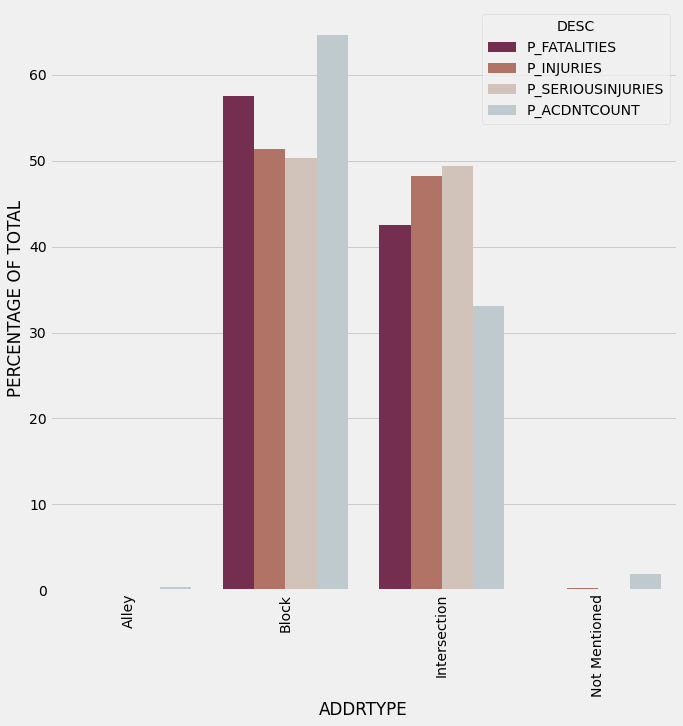

In [61]:
sns.set_palette('twilight_shifted_r')
a = data.groupby('ADDRTYPE')[['FATALITIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_INJURIES'] = data.groupby('ADDRTYPE')[['INJURIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_SERIOUSINJURIES'] = data.groupby('ADDRTYPE')[['SERIOUSINJURIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_ACDNTCOUNT'] = data.groupby('ADDRTYPE')[['OBJECTID']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
#f_df1 = f_df1.drop(columns=['FATALITIES', 'INJURIES'])
f_df1.reset_index(inplace=True)
f_df1.rename(columns={'FATALITIES':'P_FATALITIES'}, inplace=True)
f_df1

fig, ax = plt.subplots(figsize=(10,10))
df2=pd.melt(f_df1,id_vars=['ADDRTYPE'],var_name='DESC', value_name='PERCENTAGE OF TOTAL')
df2
sns.barplot(x='ADDRTYPE', y='PERCENTAGE OF TOTAL', hue='DESC', data=df2, ax=ax)
plt.xticks(rotation=90)
# plt.savefig('./blog/29.png')

In [62]:
layout = go.Layout(
    title="Location wise Type of Injuries",
    xaxis=dict(
        title="ACCIDENT ADDRESS TYPE",
        linecolor='#A9A9A9',
        showgrid=True),
    yaxis=dict(
        title="NUMBER OF ACCIDENTS",
        showgrid=False),
    barmode='group'
)

fig = go.Figure(data=[
    go.Bar(name='TOTAL #OF ACCIDENT', x=f_df['ADDRTYPE'], y=f_df['ACDNTCOUNT']),
    go.Bar(name='INJURIES', x=f_df['ADDRTYPE'], y=f_df['INJURIES']),
    go.Bar(name='SERIOUSINJURIES', x=f_df['ADDRTYPE'], y=f_df['SERIOUSINJURIES']),
    go.Bar(name='FATALITIES', x=f_df['ADDRTYPE'], y=f_df['FATALITIES'])
    
], layout= layout)
fig.show()

In [63]:
pd.crosstab(data["COLLISIONTYPE"],data["ADDRTYPE"])

ADDRTYPE       Alley  Block  Intersection  Not Mentioned
COLLISIONTYPE                                           
Angles            60   5926         30316             66
Cycles             8   2558          3490              4
Head On            5   1755           491              6
Left Turn          0   2232         12138             30
Other            299  20633          4084            176
Parked Car       327  46355          1365           1144
Pedestrian        42   2344          5462              6
Rear Ended        11  30574          4468            245
Right Turn         0   1277          1774             16
Sideswipe         16  15035          4050            138

In [64]:
df1 = data[data['INCDATE'].dt.year > 2016]
a= df1.groupby(['INTKEY','LOCATION'])['OBJECTID'].count() #,
a = a.to_frame()
a.reset_index(inplace=True)
a.rename(columns={'OBJECTID':'# OF ACCIDENTS'}, inplace=True)
bins = [0, 10, 20, 30, 40,50,120]
labels = ['Below 10', 'Between 10 and 20','Between 20 and 30','Between 30 and 40','Between 40 and 50',
         'Above 50']
a['BINNED'] = pd.cut(a['# OF ACCIDENTS'], bins, labels=labels)
a = a.sort_values(by=['# OF ACCIDENTS'],ascending=False)
b = a.head(20)
fig = px.bar(b, x="# OF ACCIDENTS", y="LOCATION", color="# OF ACCIDENTS")
fig.show()

<AxesSubplot:xlabel='count', ylabel='LIGHTCOND'>

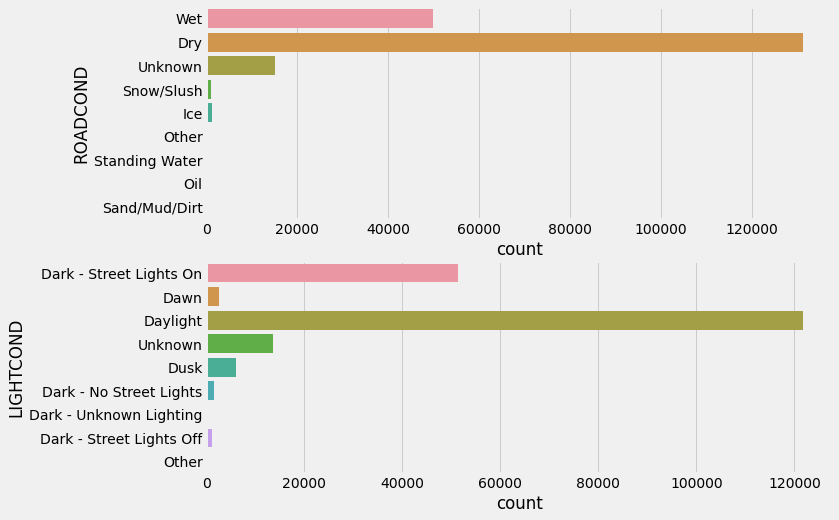

In [65]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(y=data['ROADCOND'], ax=ax[0],orient="h")
sns.countplot(y=data['LIGHTCOND'], ax=ax[1],orient="h")
# plt.savefig('./blog/33.png')

In [66]:
data["LIGHTCOND"].unique()

array(['Dark - Street Lights On', 'Dawn', 'Daylight', nan, 'Unknown',
       'Dusk', 'Dark - No Street Lights', 'Dark - Unknown Lighting',
       'Dark - Street Lights Off', 'Other'], dtype=object)

In [67]:
data[(data["SEVERITYCODE"]=="1")]["LIGHTCOND"].value_counts()

Daylight                    79854
Dark - Street Lights On     35109
Unknown                     12957
Dusk                         4075
Dawn                         1737
Dark - No Street Lights      1244
Dark - Street Lights Off      903
Other                         189
Dark - Unknown Lighting        46
Name: LIGHTCOND, dtype: int64

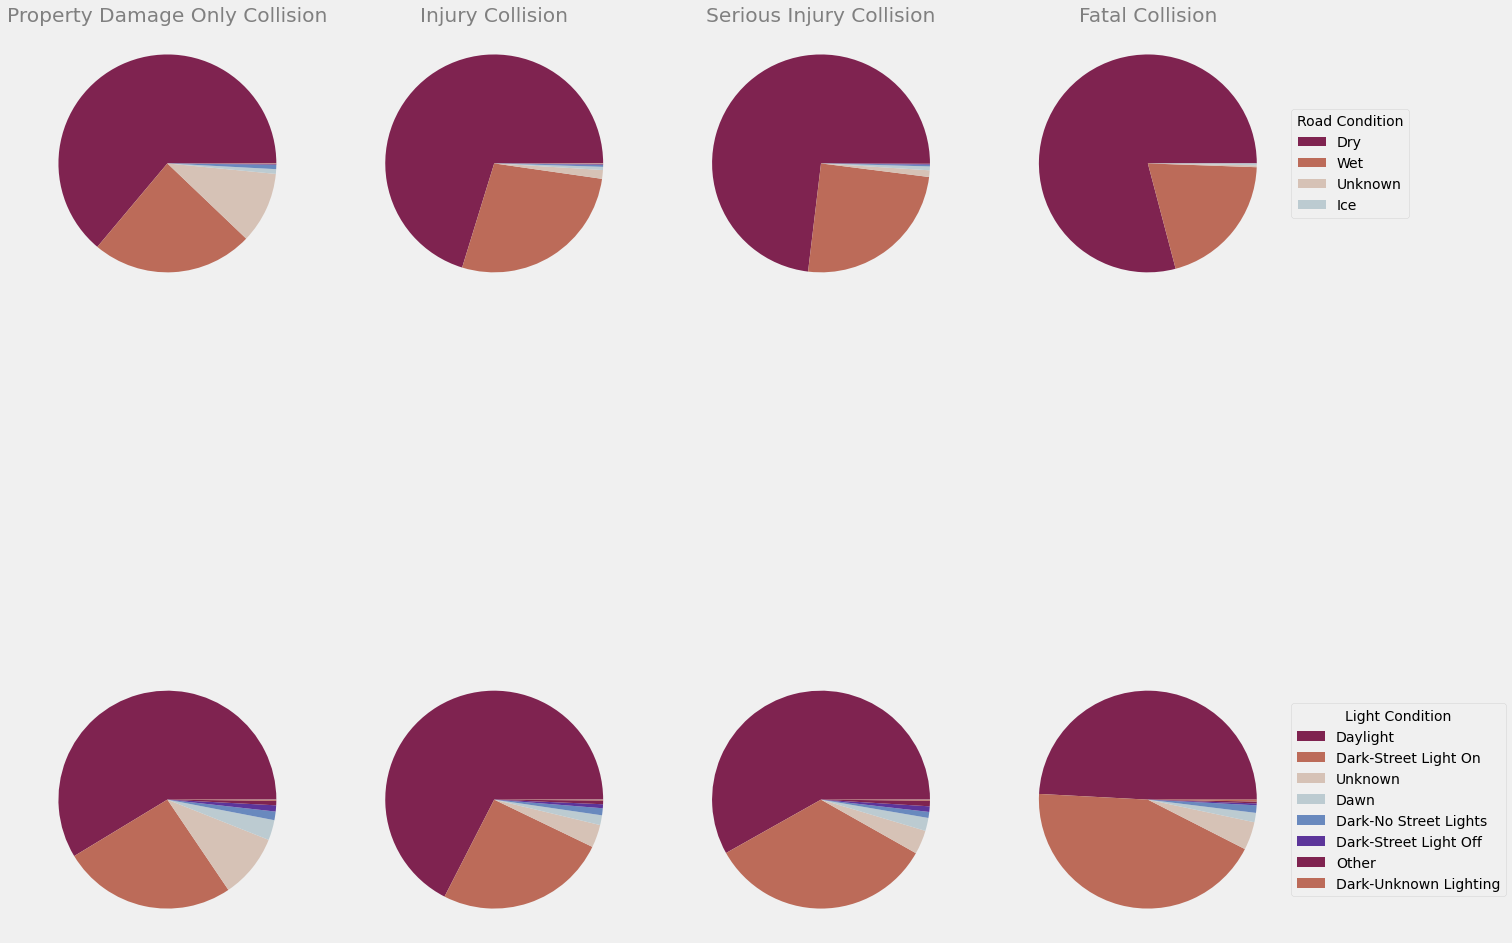

In [68]:
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(20,20))
ax[0,0].pie(data[(data["SEVERITYCODE"]=="1")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[0,1].pie(data[(data["SEVERITYCODE"]=="2")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[0,2].pie(data[(data["SEVERITYCODE"]=="2b")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[0,3].pie(data[(data["SEVERITYCODE"]=="3")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})

ax[0,0].set_title("Property Damage Only Collision",color="grey")
ax[0,1].set_title("Injury Collision",color="grey")
ax[0,2].set_title("Serious Injury Collision",color="grey")
ax[0,3].set_title("Fatal Collision",color="grey")


ax[1,0].pie(data[(data["SEVERITYCODE"]=="1")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[1,1].pie(data[(data["SEVERITYCODE"]=="2")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[1,2].pie(data[(data["SEVERITYCODE"]=="2b")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[1,3].pie(data[(data["SEVERITYCODE"]=="3")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})


ax[0,3].legend(["Dry","Wet","Unknown","Ice","Snow/Slush","Other","Standing Water","Sand/Mud/Dirt","Oil"],
          title="Road Condition",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax[1,3].legend(["Daylight","Dark-Street Light On","Unknown","Dawn","Dark-No Street Lights","Dark-Street Light Off","Other","Dark-Unknown Lighting"],
          title="Light Condition",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# plt.savefig('./blog/34.png')
plt.show()

In [69]:
a = data[data['YEAR']!=2020].groupby(['MONTH'])['OBJECTID'].count()/data[data['YEAR']!=2020].groupby(['MONTH']).size().nunique()
a = a.to_frame()
a.reset_index(inplace=True)
a.rename(columns = {'OBJECTID':'2013-2019'}, inplace=True)
b= data[data['YEAR']==2020].groupby(['MONTH'])['OBJECTID'].count()
b = b.to_frame()
b.reset_index(inplace=True)
b.rename(columns = {'OBJECTID':'2020'}, inplace=True)
# merging dataframes
df_compare = pd.merge(a, b, on='MONTH', how='left')

In [70]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_compare['MONTH'], y=df_compare['2013-2019'],mode='lines+markers', 
                         name='Before 2020'))
fig.add_trace(go.Scatter(x=df_compare['MONTH'], y=df_compare['2020'],mode='lines+markers',
                        name='2020'))
fig.update_layout(title="Impact of COVID-19 on Road Accidents",
                  xaxis_title='Month',
                  yaxis_title='Average Number of Accidents'
                 )
# plt.savefig('./blog/35.png')
fig.show()

In [71]:
sf_map = folium.Map(location=[data["Y"].mean(), data["X"].mean()],  zoom_start=12, control_scale=True, min_zoom=11)

df_filtered = data[(data["YEAR"]>= 2014)]
HeatMap(data=df_filtered[["X","Y","VEHCOUNT"]].groupby(['Y', 'X']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(sf_map)

sf_map

In [72]:
data.head()

X              Y  OBJECTID  INCKEY  COLDETKEY REPORTNO   STATUS  \
0  1.270903e+06  202514.900099         1  336405     337905  EA80579  Matched   
1  1.269818e+06  205487.186566         2  339626     341126  3889108  Matched   
2  1.272455e+06  234505.292132         3  339594     341094  EB20946  Matched   
3  1.271451e+06  222766.587288         4  326983     328483  E993876  Matched   
4  1.259160e+06  196525.743229         5    1277       1277  3331265  Matched   

       ADDRTYPE   INTKEY                                           LOCATION  \
0  Intersection  34219.0                        4TH AVE S AND S MICHIGAN ST   
1  Intersection  33034.0                          1ST AVE S AND S LUCILE ST   
2         Block      NaN  EASTLAKE AVE E BETWEEN FAIRVIEW AVE N AND E GA...   
3  Intersection  30494.0                      4TH AVE S AND S WASHINGTON ST   
4  Intersection  34685.0                      35TH AVE SW AND SW THISTLE ST   

  EXCEPTRSNCODE EXCEPTRSNDESC SEVERITYCODE                    SEVERITYDESC  \
0                         NaN            2                Injury Collision   
1                         NaN            2                Injury Collision   
2                         NaN            2                Injury Collision   
3                         NaN            1  Property Damage Only Collision   
4                         NaN            1  Property Damage Only Collision   

  COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
0        Angles            2         0            0         2         1   
1        Angles            2         0            0         2         1   
2        Cycles            2         0            1         1         1   
3    Right Turn            2         0            0         2         0   
4     Sideswipe            2         0            0         2         0   

   SERIOUSINJURIES  FATALITIES                   INCDATE  \
0                0           0 2020-09-24 00:00:00+00:00   
1                0           0 2021-04-12 00:00:00+00:00   
2                0           0 2021-04-09 00:00:00+00:00   
3                0           0 2019-12-11 00:00:00+00:00   
4                0           0 2013-03-27 00:00:00+00:00   

                 INCDTTM                             JUNCTIONTYPE  \
0   9/24/2020 4:10:00 AM   At Intersection (intersection related)   
1   4/12/2021 8:22:00 AM   At Intersection (intersection related)   
2    4/9/2021 4:47:00 PM  Mid-Block (not related to intersection)   
3  12/11/2019 7:31:00 AM   At Intersection (intersection related)   
4  3/27/2013 12:04:00 PM   At Intersection (intersection related)   

   SDOT_COLCODE                                       SDOT_COLDESC  \
0          11.0  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
1          11.0  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
2          18.0  MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...   
3          14.0       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END   
4          11.0  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   

  INATTENTIONIND UNDERINFL   WEATHER ROADCOND                LIGHTCOND  \
0            NaN         N   Raining      Wet  Dark - Street Lights On   
1            NaN         N     Clear      Dry                     Dawn   
2            NaN         N     Clear      Dry                 Daylight   
3              Y         N  Overcast      Wet                 Daylight   
4            NaN         N     Clear      Dry                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN         NaN      NaN         10   
2             Y         NaN      NaN          5   
3           NaN         NaN      NaN         16   
4           NaN         NaN      NaN         71   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1                                  Entering at 

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227381 entries, 0 to 227380
Data columns (total 44 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   X                219800 non-null  float64            
 1   Y                219800 non-null  float64            
 2   OBJECTID         227381 non-null  int64              
 3   INCKEY           227381 non-null  int64              
 4   COLDETKEY        227381 non-null  int64              
 5   REPORTNO         227381 non-null  object             
 6   STATUS           227381 non-null  object             
 7   ADDRTYPE         227381 non-null  object             
 8   INTKEY           74222 non-null   float64            
 9   LOCATION         222702 non-null  object             
 10  EXCEPTRSNCODE    106978 non-null  object             
 11  EXCEPTRSNDESC    12099 non-null   object             
 12  SEVERITYCODE     227381 non-null  object             
 13 

In [74]:
#otherwise drop records with meaningless data
data=data[data["SEVERITYDESC"]!='Unknown']

In [75]:
#Put above pickle in next full run
#create new column for Machine Learning and Visualizations with Not Serious and Serious
data['Collision_type'] = data['SEVERITYDESC']
data['Collision_type'] = data['Collision_type'].replace(to_replace="Property Damage Only Collision", 
                                                                value="Property Damage Only Collision")
data['Collision_type'] = data['Collision_type'].replace(to_replace="Injury Collision",
                                                                value="Injury Collision")
data['Collision_type'] = data['Collision_type'].replace(to_replace="Serious Injury Collision", 
                                                                value="Injury Collision")
data['Collision_type'] = data['Collision_type'].replace(to_replace="Fatality Collision", 
                                                                value="Injury Collision")
data.shape

(204758, 45)

In [76]:
data.Collision_type.value_counts()

Property Damage Only Collision    140924
Injury Collision                   63834
Name: Collision_type, dtype: int64

In [77]:
Null_values = data.isnull().sum()
Null_values[0:45]

X                    5442
Y                    5442
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE                0
INTKEY             135213
LOCATION             2714
EXCEPTRSNCODE      111629
EXCEPTRSNDESC      199006
SEVERITYCODE            0
SEVERITYDESC            0
COLLISIONTYPE        5834
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE         6420
SDOT_COLCODE            0
SDOT_COLDESC            0
INATTENTIONIND     174562
UNDERINFL            5814
WEATHER              6034
ROADCOND             5949
LIGHTCOND            6128
PEDROWNOTGRNT      199463
SDOTCOLNUM          87758
SPEEDING           194572
ST_COLCODE             18
ST_COLDESC           5834
SEGLANEKEY              0
CROSSWALKKEY

In [78]:
data['ST_COLCODE'] = data['ST_COLCODE'].fillna(0)
data['X'] = data['X'].fillna(0)
data['Y'] = data['Y'].fillna(0)
data['INTKEY'] = data['INTKEY'].fillna(0)
data['LOCATION'] = data['LOCATION'].fillna(0)
data['EXCEPTRSNCODE'] = data['EXCEPTRSNCODE'].fillna(0)
data['EXCEPTRSNDESC'] = data['EXCEPTRSNDESC'].fillna(0)
data['ST_COLDESC'] = data['ST_COLDESC'].fillna(0)
data['ST_COLCODE'] = data['ST_COLCODE'].fillna(0)
data['PEDROWNOTGRNT'] = data['PEDROWNOTGRNT'].fillna(0)
data['INATTENTIONIND'] = data['INATTENTIONIND'].fillna(0)
data['UNDERINFL'] = data['UNDERINFL'].fillna(0)
data['INCTIME'] = data['INCTIME'].fillna(0)
data['SDOTCOLNUM'] = data['SDOTCOLNUM'].fillna(0)

data['SPEEDING'] = data['SPEEDING'].fillna(0)
data['SEVERITYDESC'] = data['SEVERITYDESC'].fillna(0)

data['ADDRTYPE'] = data['ADDRTYPE'].fillna(0)
data['ADDRTYPE'] = data['ADDRTYPE'].replace(0,'others')

#data['TIMEOFDAY'] = data['TIMEOFDAY'].fillna(0)
#data['TIMEOFDAY'] = data['TIMEOFDAY'].replace(0,'others')

data['WEATHER'] = data['WEATHER'].fillna(0)
data['WEATHER'] = data['WEATHER'].replace(0,'others')

data['ROADCOND'] = data['ROADCOND'].fillna(0)
data['ROADCOND'] = data['ROADCOND'].replace(0,'others')

data['LIGHTCOND'] = data['LIGHTCOND'].fillna(0)
data['LIGHTCOND'] = data['LIGHTCOND'].replace(0,'others')

data['COLLISIONTYPE'] = data['COLLISIONTYPE'].fillna(0)
data['COLLISIONTYPE'] = data['COLLISIONTYPE'].replace(0,'others')

data['JUNCTIONTYPE'] = data['JUNCTIONTYPE'].fillna(0)
data['JUNCTIONTYPE'] = data['JUNCTIONTYPE'].replace(0,'others')

In [79]:
Null_values = data.isnull().sum()
Null_values[0:45]

X                      0
Y                      0
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE               0
INTKEY                 0
LOCATION               0
EXCEPTRSNCODE          0
EXCEPTRSNDESC          0
SEVERITYCODE           0
SEVERITYDESC           0
COLLISIONTYPE          0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE           0
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND         0
UNDERINFL              0
WEATHER                0
ROADCOND               0
LIGHTCOND              0
PEDROWNOTGRNT          0
SDOTCOLNUM             0
SPEEDING               0
ST_COLCODE             0
ST_COLDESC             0
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0


In [80]:
# Print markdown programatically for better visualization.
def printmd(string):
    display(Markdown(string))

In [81]:
# Plots and creates labels for values plotted. Used for exploration of features.
def plot_and_annotate(data, **kwarg):
    ax = data['percent'].sort_values().plot(kind='barh', **kwarg)
    for p in ax.patches:
        width = p.get_width()
        plt.text(5 + width, p.get_y() + 0.55 * p.get_height(),
                 '{:1.2f}%'.format(width),
                 ha='center', va='center')


In [82]:
# Creates percentages for value_counts of a pd.series object.
def create_count_percentages(series, name=None):
    values = series.value_counts()
    expanded_value = values.to_frame(name)
    expanded_value['percent'] = values.apply(lambda _: _ / series.size * 100)
    return expanded_value


In [83]:
# Data must be loaded before definin create_plot_data due to inside reference.
def create_plot_data(data, feature):
    return create_count_percentages(data[feature], name=feature)


In [84]:
def cast_df_features(data, feature_catalog):
    def parse_type(dtype):
        if dtype == 'int':
            return np.int8
        elif dtype == 'float':
            return np.float
        else:
            return dtype

    # Make a dict to use as dtypes for panda's dataframe
    features_dtypes = feature_catalog.set_index('feature_name')['pandas_dtype'].apply(parse_type).to_dict()
    # Keep only the columns that remain in the clean version of the dataframe
    features_dtypes = {k: v for k, v in features_dtypes.items() if k in data.columns}
    return data.astype(features_dtypes)

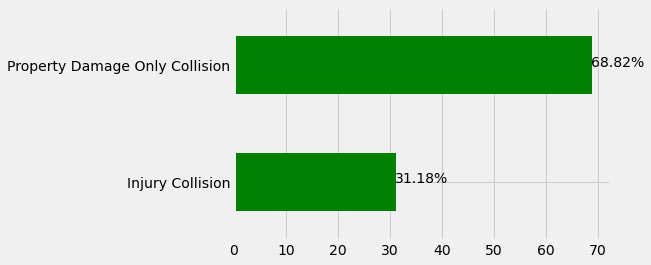

In [85]:
plot_data = create_plot_data(data, 'Collision_type')
plot_and_annotate(plot_data, color='green')

In [86]:
data.Collision_type.value_counts()

Property Damage Only Collision    140924
Injury Collision                   63834
Name: Collision_type, dtype: int64

In [87]:
# prepare dataframe with simple counts
counts = data.groupby(['STATUS', 'Collision_type']).size()

counts = counts.rename_axis(['STATUS', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
STATUS                                                          
Matched                    62590                          136351
Unmatched                   1244                            4573

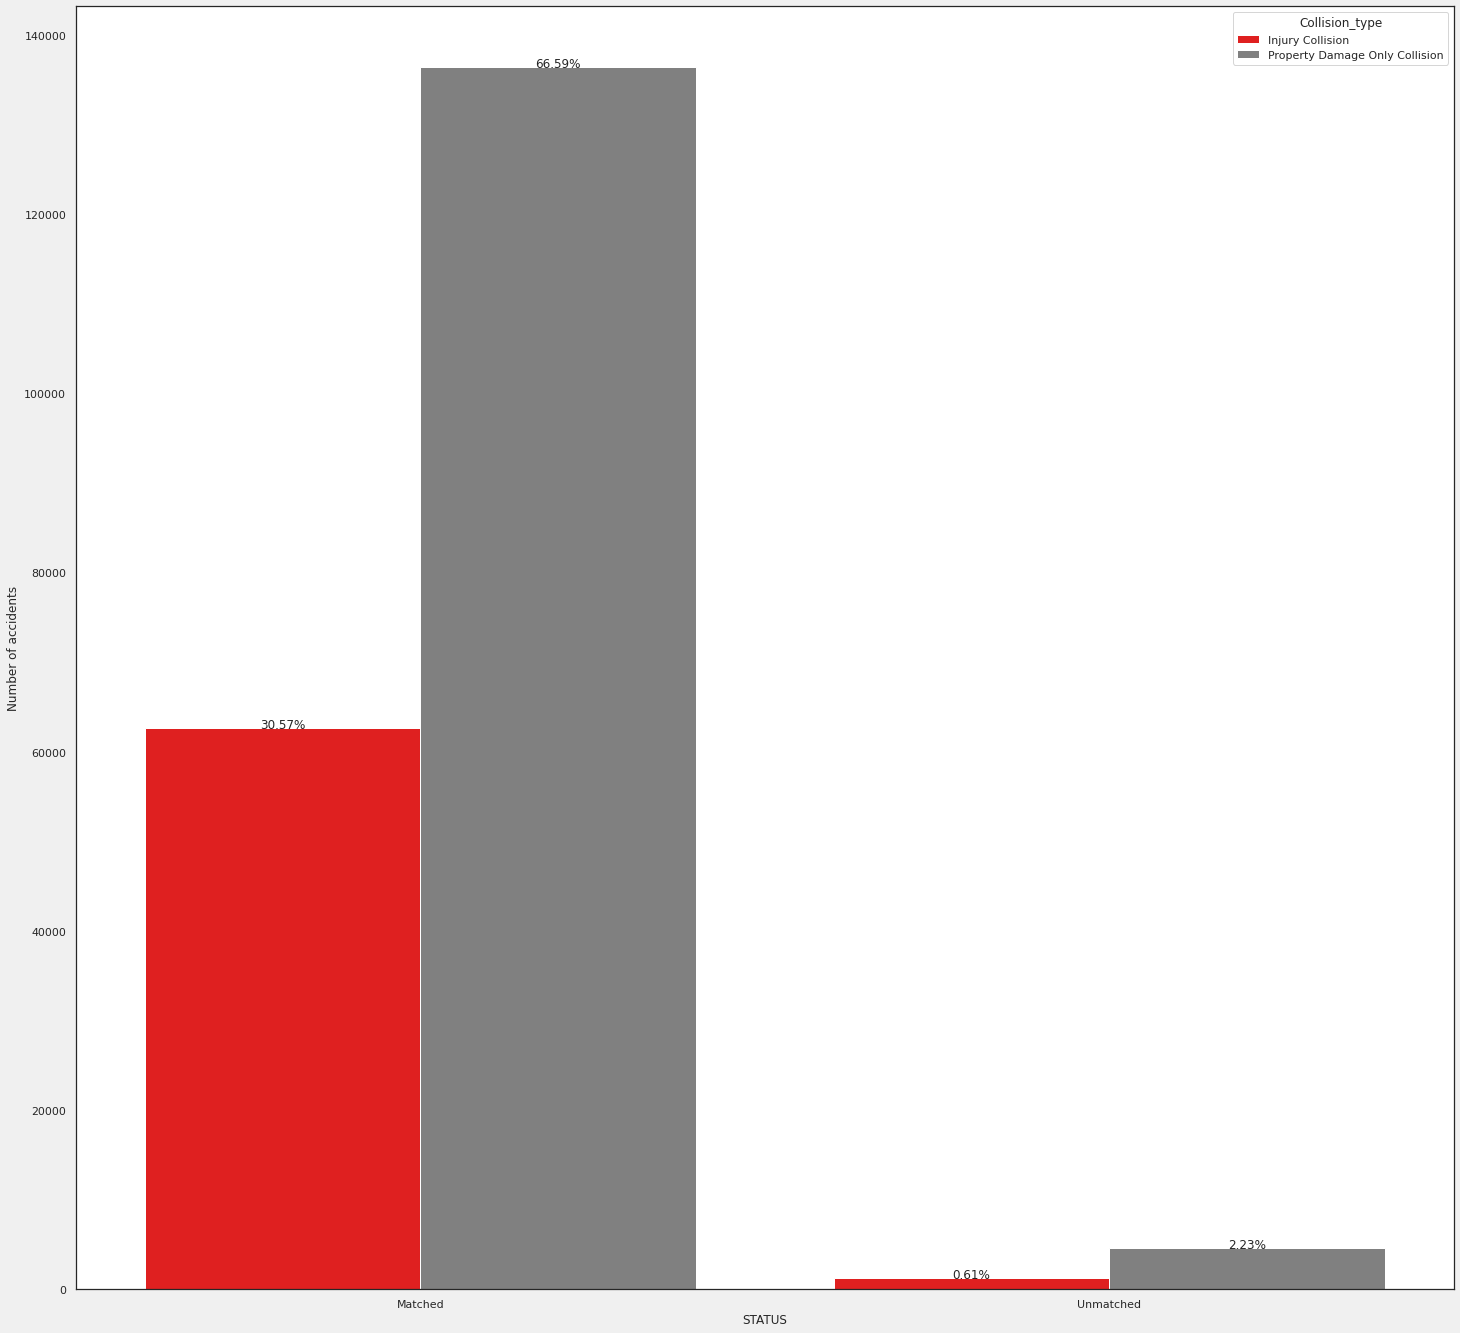

In [88]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="STATUS", hue="Collision_type",data=data)
ax.set(xlabel="STATUS",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [89]:
# prepare dataframe with simple counts
counts = data.groupby(['ADDRTYPE', 'Collision_type']).size()

counts = counts.rename_axis(['ADDRTYPE', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
ADDRTYPE                                                        
Alley                         92                             680
Block                      32856                           99643
Intersection               30689                           38856
Not Mentioned                197                            1745

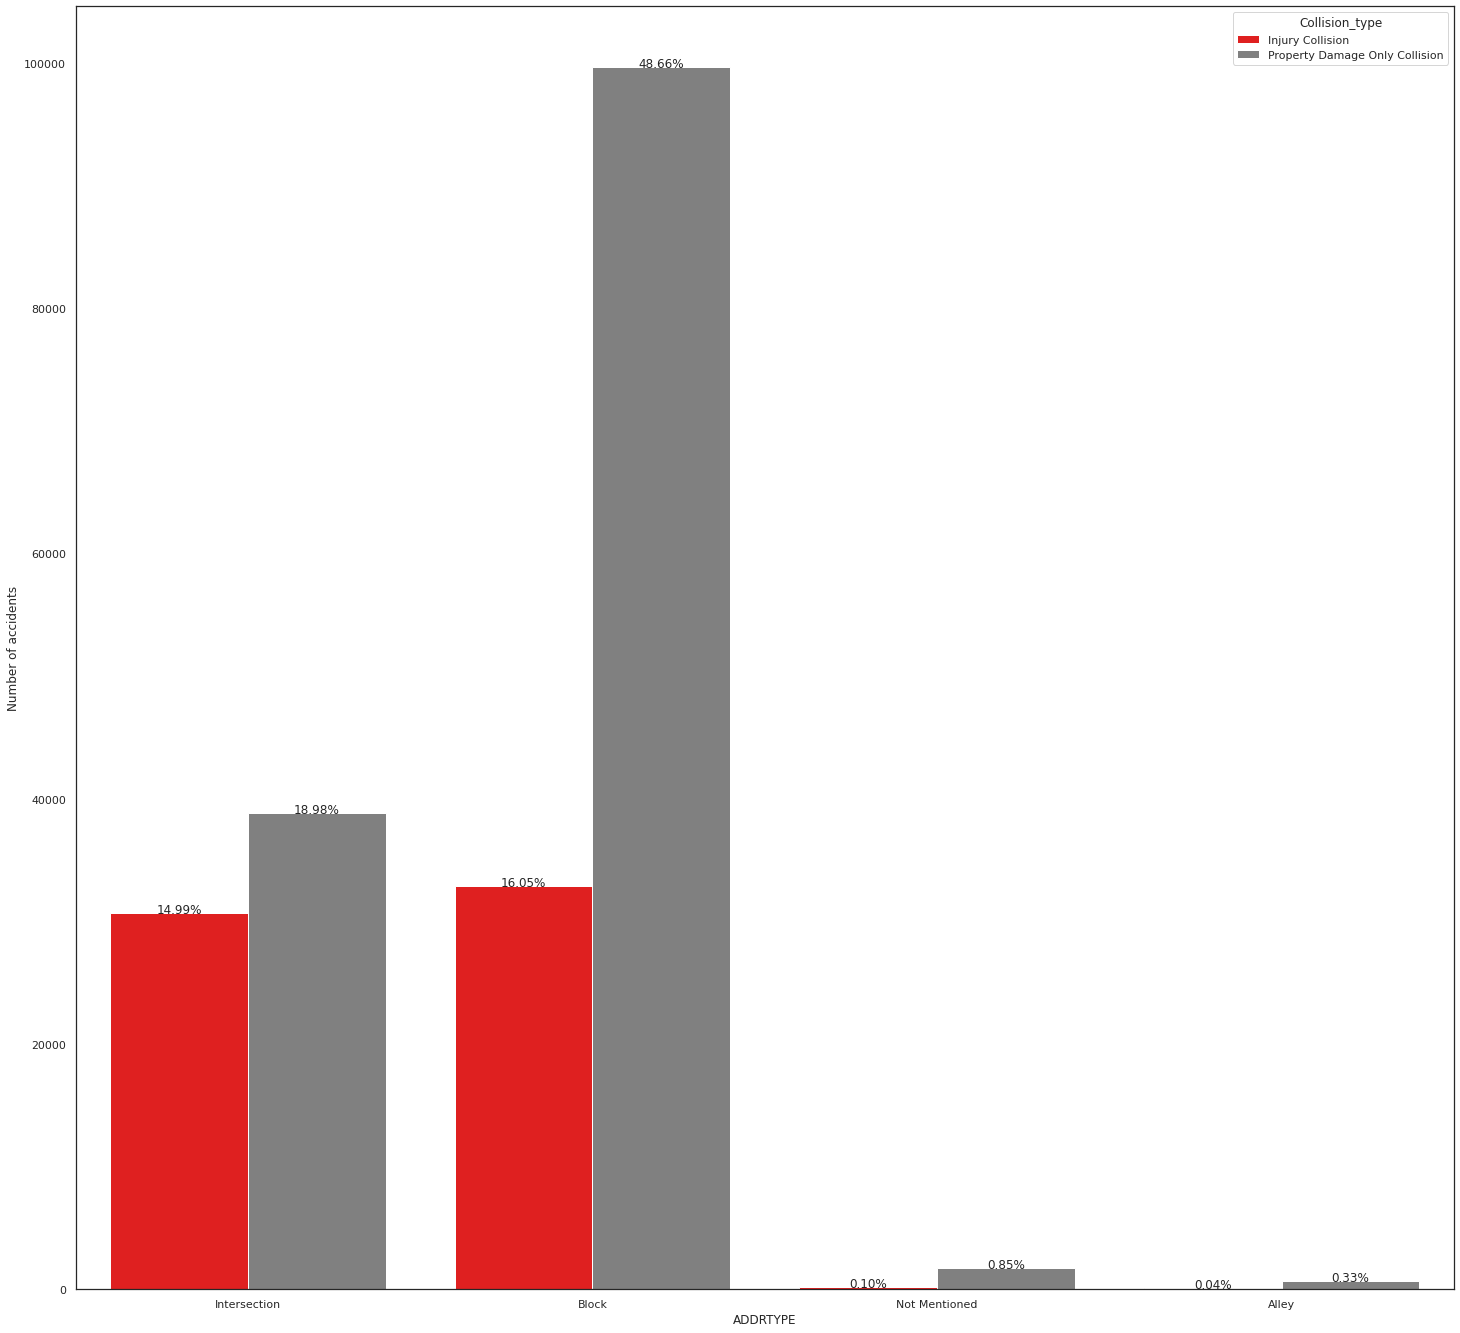

In [90]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="ADDRTYPE", hue="Collision_type",data=data)
ax.set(xlabel="ADDRTYPE",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [91]:
# prepare dataframe with simple counts
counts = data.groupby(['PEDCOUNT', 'Collision_type']).size()

counts = counts.rename_axis(['PEDCOUNT', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
PEDCOUNT                                                        
0                        56287.0                        140197.0
1                         7251.0                           707.0
2                          256.0                            19.0
3                           27.0                             1.0
4                            9.0                             NaN
5                            2.0                             NaN
6                            2.0                             NaN

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


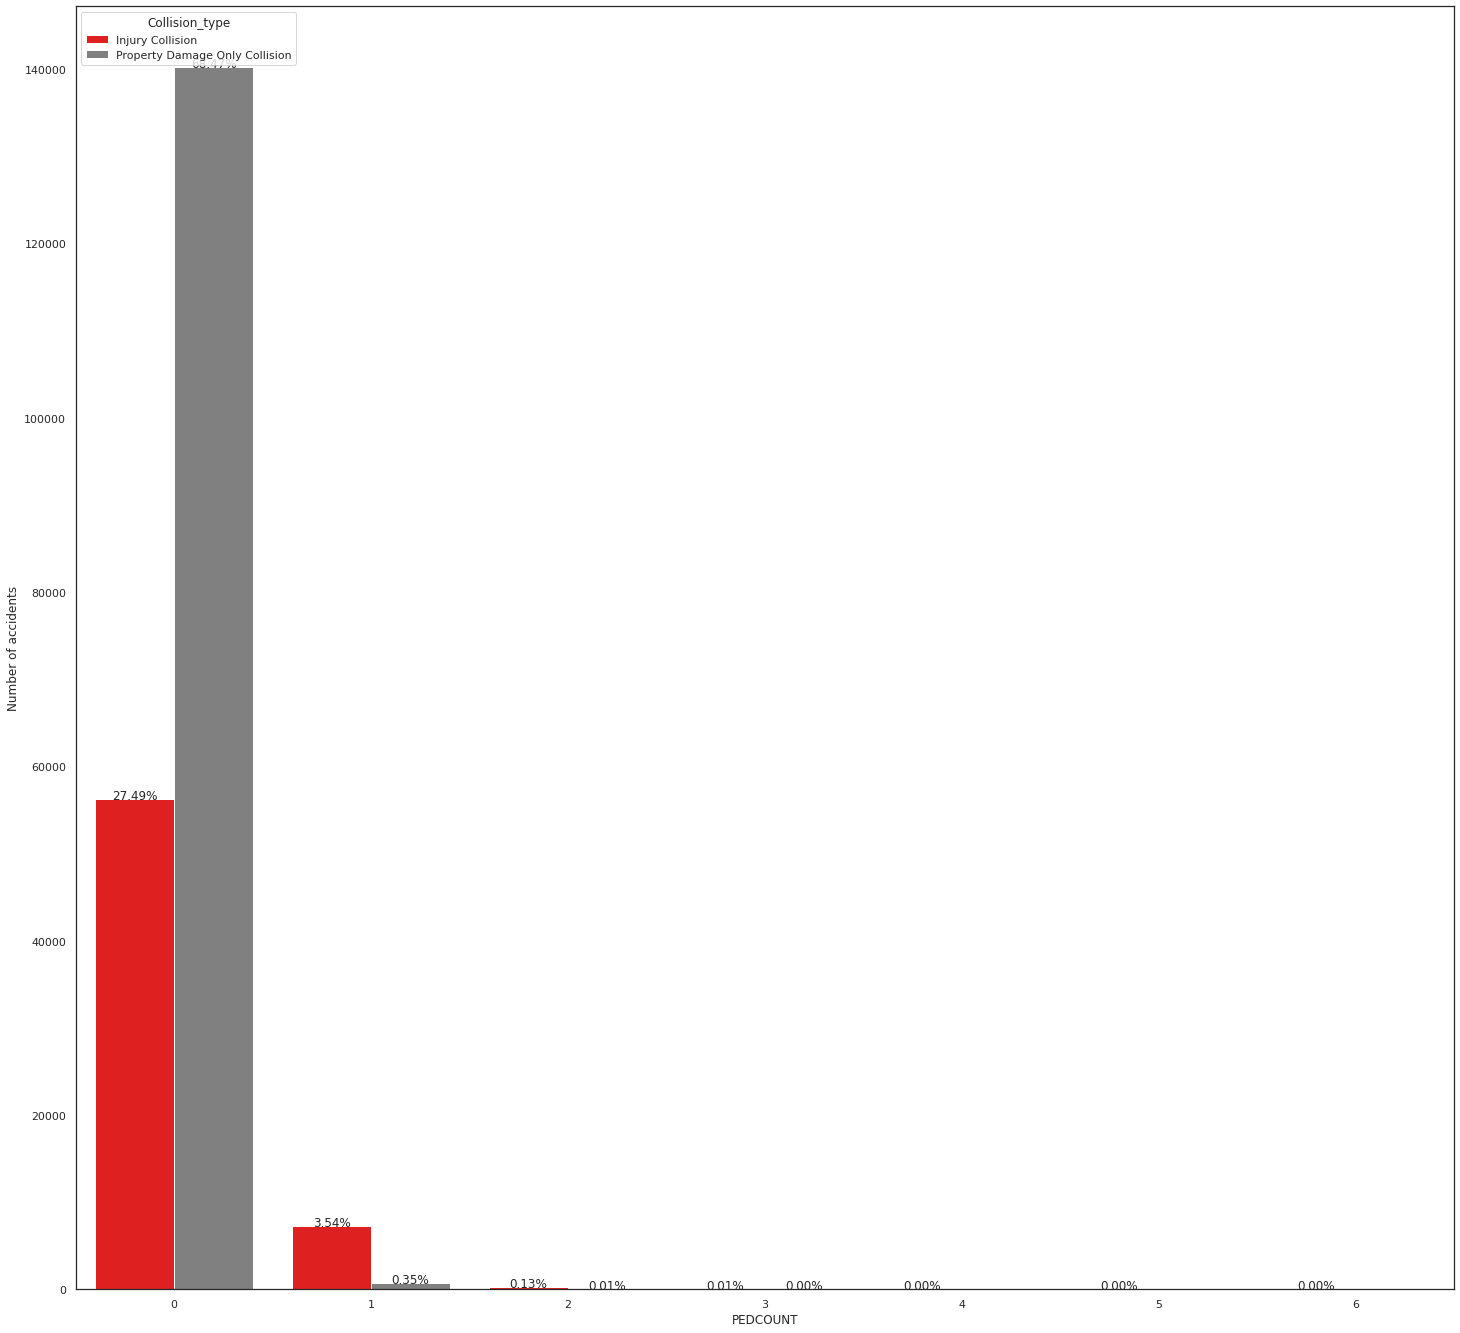

In [92]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="PEDCOUNT", hue="Collision_type",data=data)
ax.set(xlabel="PEDCOUNT",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [93]:
# prepare dataframe with simple counts
counts = data.groupby(['PEDCYLCOUNT', 'Collision_type']).size()

counts = counts.rename_axis(['PEDCYLCOUNT', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
PEDCYLCOUNT                                                     
0                        58400.0                        140217.0
1                         5382.0                           707.0
2                           52.0                             NaN

posx and posy should be finite values
posx and posy should be finite values


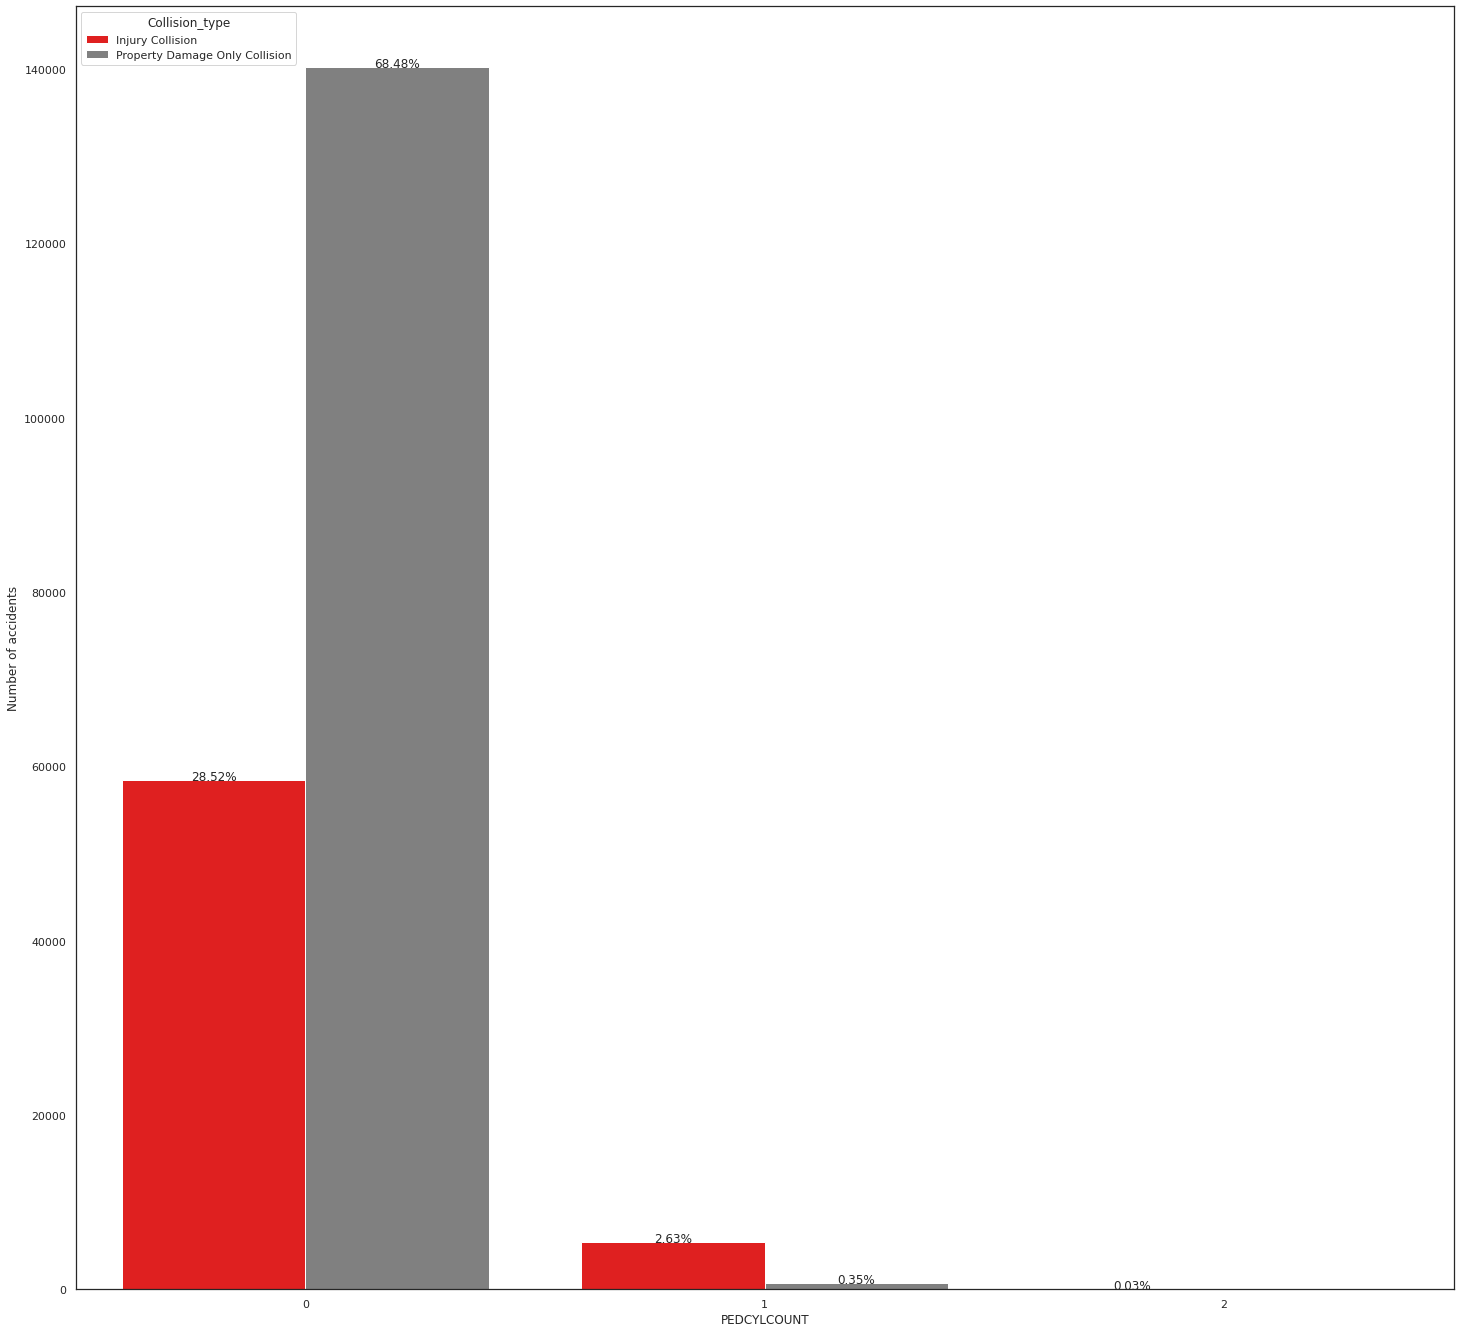

In [94]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="PEDCYLCOUNT", hue="Collision_type",data=data)
ax.set(xlabel="PEDCYLCOUNT",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [95]:
data.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              94724
At Intersection (intersection related)               67224
Mid-Block (but intersection related)                 23181
Driveway Junction                                    10875
others                                                6420
At Intersection (but not related to intersection)     2152
Ramp Junction                                          171
Unknown                                                 11
Name: JUNCTIONTYPE, dtype: int64

In [96]:
#otherwise drop records with meaningless data
#data=data[data["JUNCTIONTYPE"]!='Unknown']

In [97]:
# prepare dataframe with simple counts
counts = data.groupby(['JUNCTIONTYPE', 'Collision_type']).size()

counts = counts.rename_axis(['JUNCTIONTYPE', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type                                     Injury Collision  \
JUNCTIONTYPE                                                          
At Intersection (but not related to intersection)               663   
At Intersection (intersection related)                        29997   
Driveway Junction                                              3399   
Mid-Block (but intersection related)                           7566   
Mid-Block (not related to intersection)                       21715   
Ramp Junction                                                    59   
Unknown                                                           2   
others                                                          433   

Collision_type                                     Property Damage Only Collision  
JUNCTIONTYPE                                                                       
At Intersection (but not related to intersection)                            1489  
At Intersection (intersection related)                                      37227  
Driveway Junction                                                            7476  
Mid-Block (but intersection related)                                        15615  
Mid-Block (not related to intersection)                                     73009  
Ramp Junction                                                                 112  
Unknown                                                                         9  
others                                                                       5987

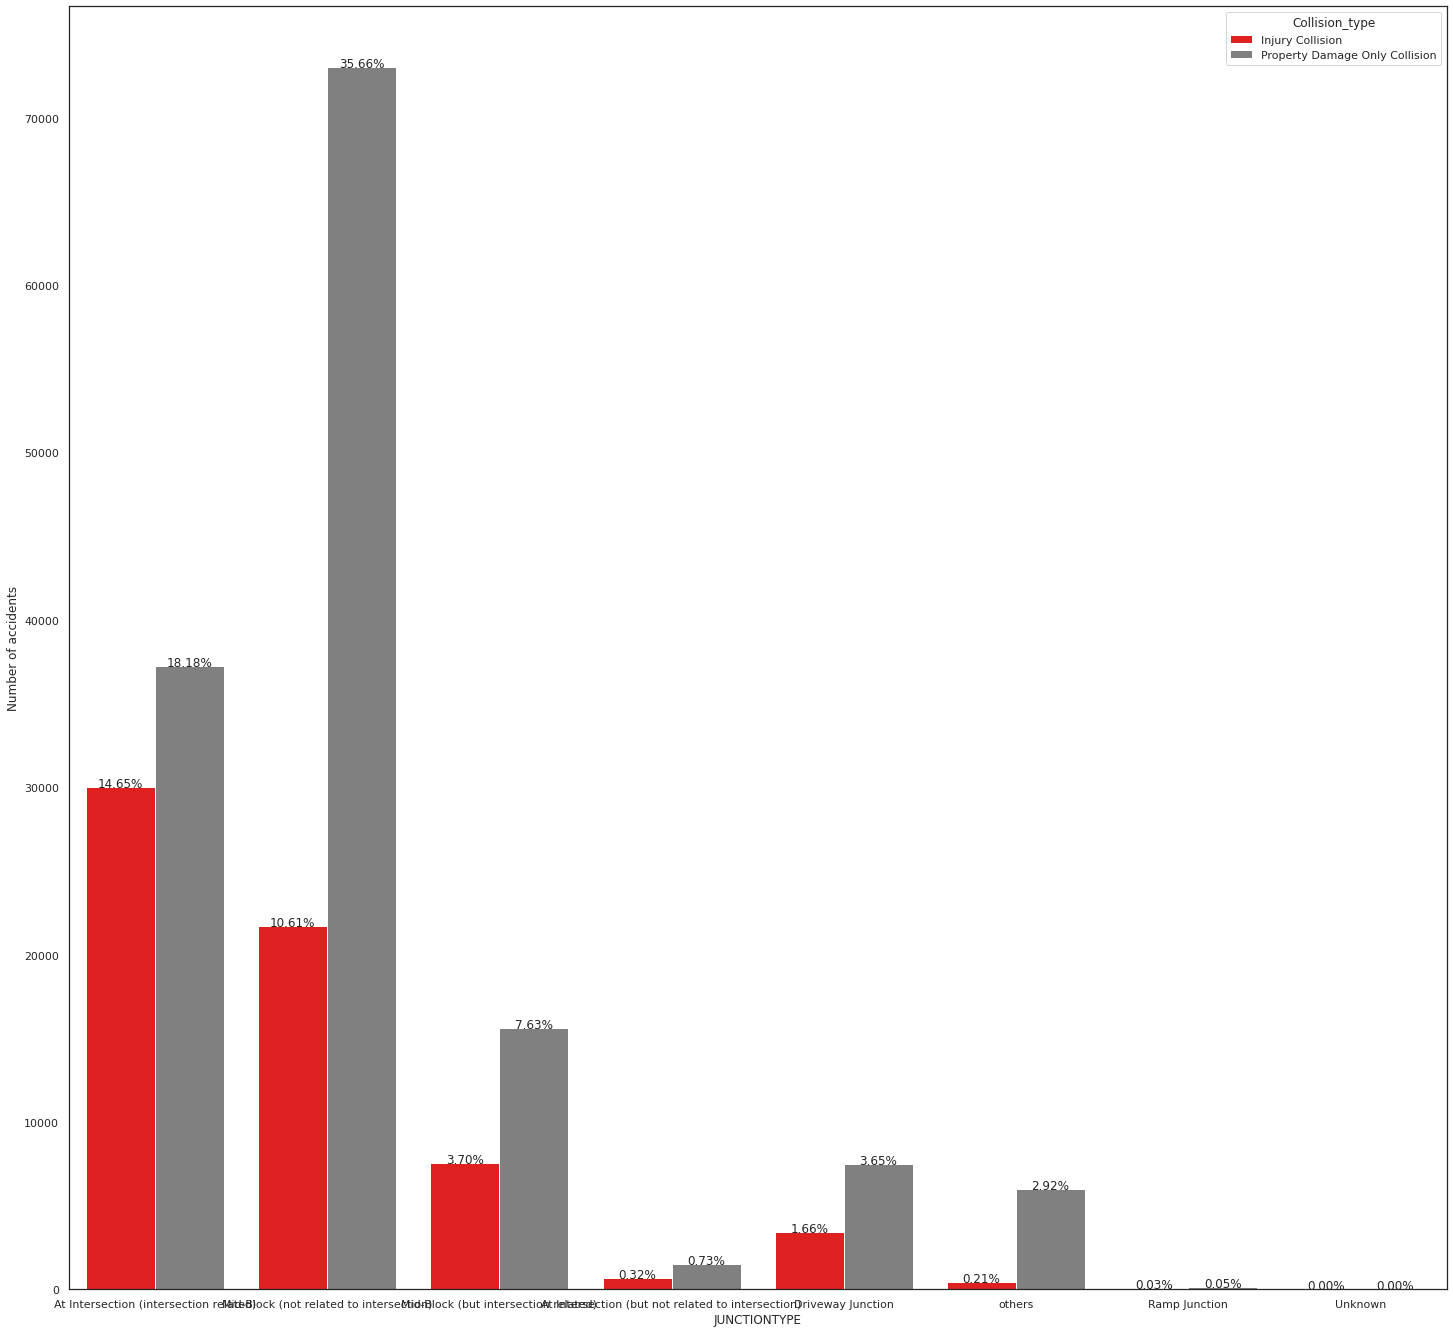

In [98]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="JUNCTIONTYPE", hue="Collision_type",data=data)
ax.set(xlabel="JUNCTIONTYPE",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [99]:
#replacing missing values with the most frequent ones and grouping the similar types together
data["WEATHER"].replace(np.nan, data['WEATHER'].value_counts().idxmax(), inplace=True)
data["WEATHER"].replace("Other","Unknown",inplace=True)
data["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
data["WEATHER"].replace("Raining","SevereWeather",inplace=True)
data["WEATHER"].replace("Snowing","SevereWeather",inplace=True)
data["WEATHER"].replace("Sleet/Hail/Freezing Rain","SevereWeather",inplace=True)
data["WEATHER"].replace("Fog/Smog/Smoke","SevereWeather",inplace=True)
data["WEATHER"].replace("Blowing Sand/Dirt","SevereWeather",inplace=True)
data["WEATHER"].replace("Severe Crosswind","SevereWeather",inplace=True)
data['WEATHER'].value_counts()

Clear            116855
SevereWeather     36516
Overcast          29298
Unknown           16053
others             6034
Blowing Snow          2
Name: WEATHER, dtype: int64

In [100]:
# prepare dataframe with simple counts
counts = data.groupby(['WEATHER', 'Collision_type']).size()

counts = counts.rename_axis(['WEATHER', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
WEATHER                                                         
Blowing Snow                 2.0                             NaN
Clear                    39352.0                         77503.0
Overcast                  9612.0                         19686.0
SevereWeather            12563.0                         23953.0
Unknown                    994.0                         15059.0
others                    1311.0                          4723.0

posx and posy should be finite values
posx and posy should be finite values


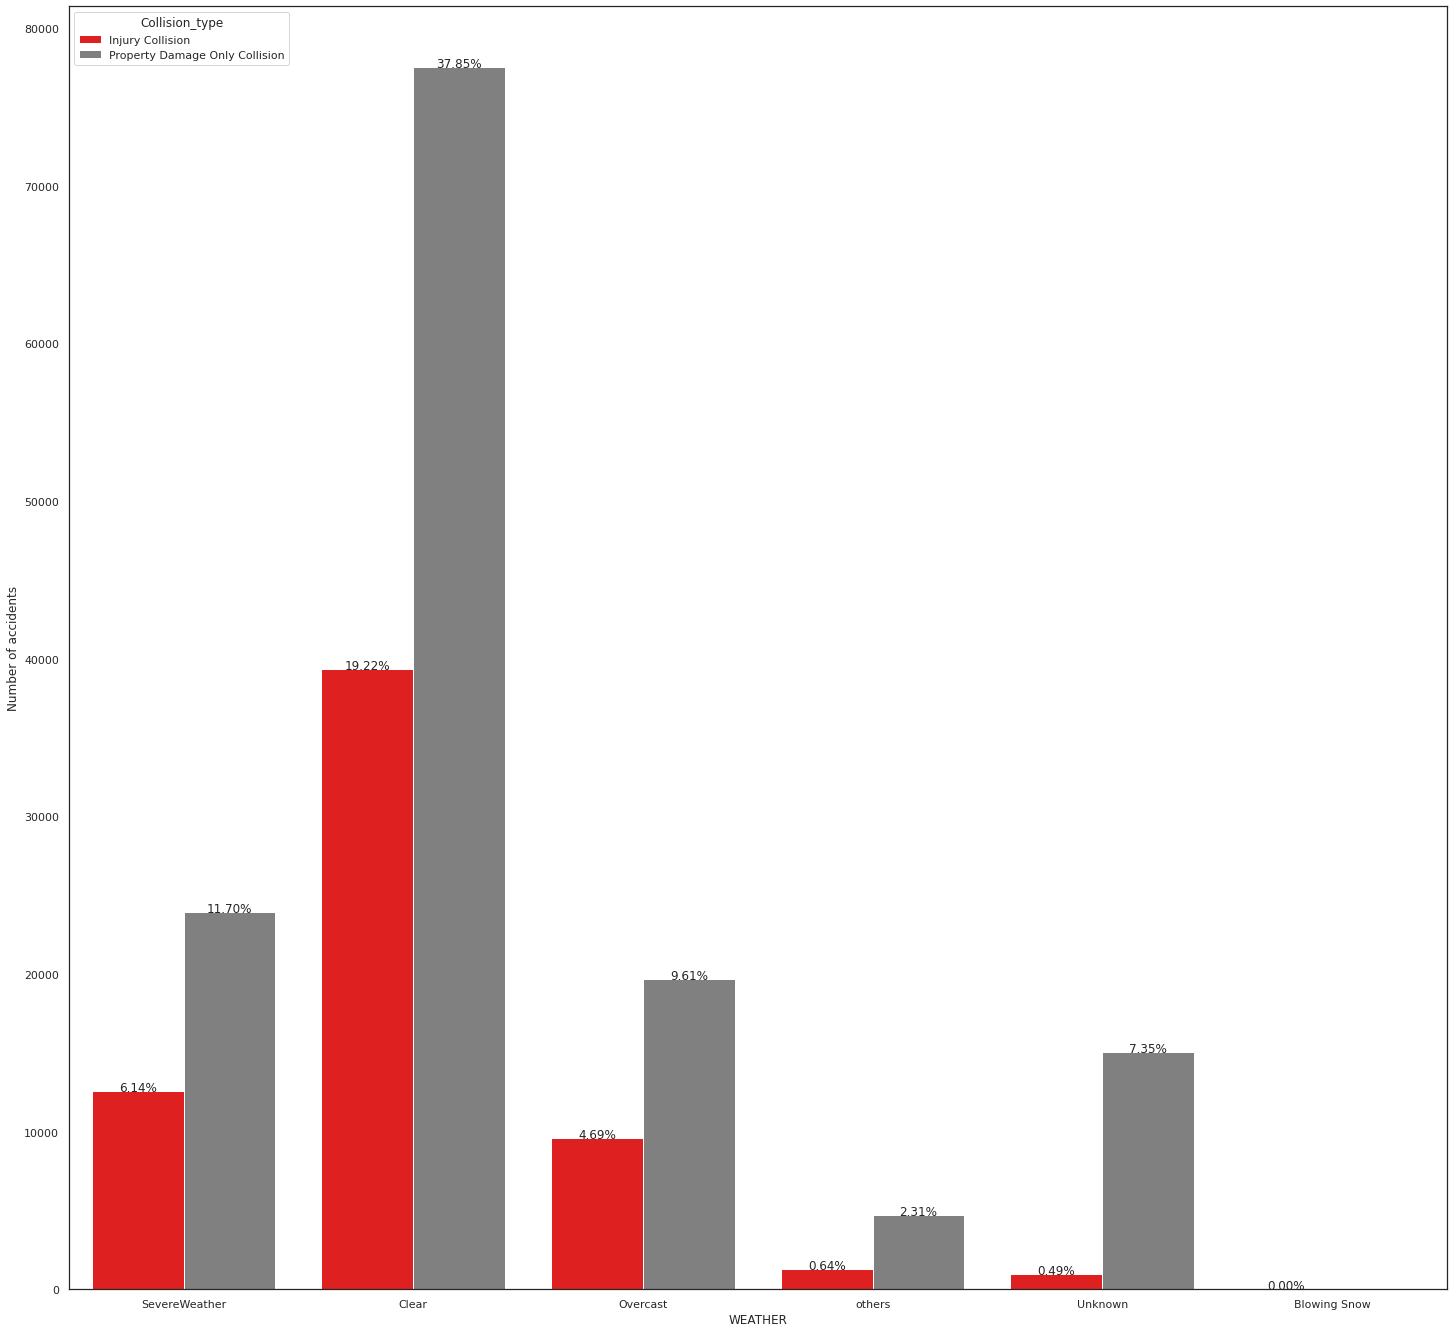

In [101]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="WEATHER", hue="Collision_type",data=data)
ax.set(xlabel="WEATHER",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [102]:
#replacing missing values with the most frequent ones and grouping the similar types together
data["ROADCOND"].replace(np.nan, data['ROADCOND'].value_counts().idxmax(), inplace=True)
data["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
data["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
data["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
data["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
data["ROADCOND"].replace("Other", "Unknown", inplace=True)
data["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
data['ROADCOND'].value_counts()

Dry                131107
Wet                 49775
Unknown             15364
others               5949
IceOilWaterSnow      2563
Name: ROADCOND, dtype: int64

In [103]:
# prepare dataframe with simple counts
counts = data.groupby(['ROADCOND', 'Collision_type']).size()

counts = counts.rename_axis(['ROADCOND', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type   Injury Collision  Property Damage Only Collision
ROADCOND                                                         
Dry                         44062                           87045
IceOilWaterSnow               557                            2006
Unknown                       844                           14520
Wet                         17092                           32683
others                       1279                            4670

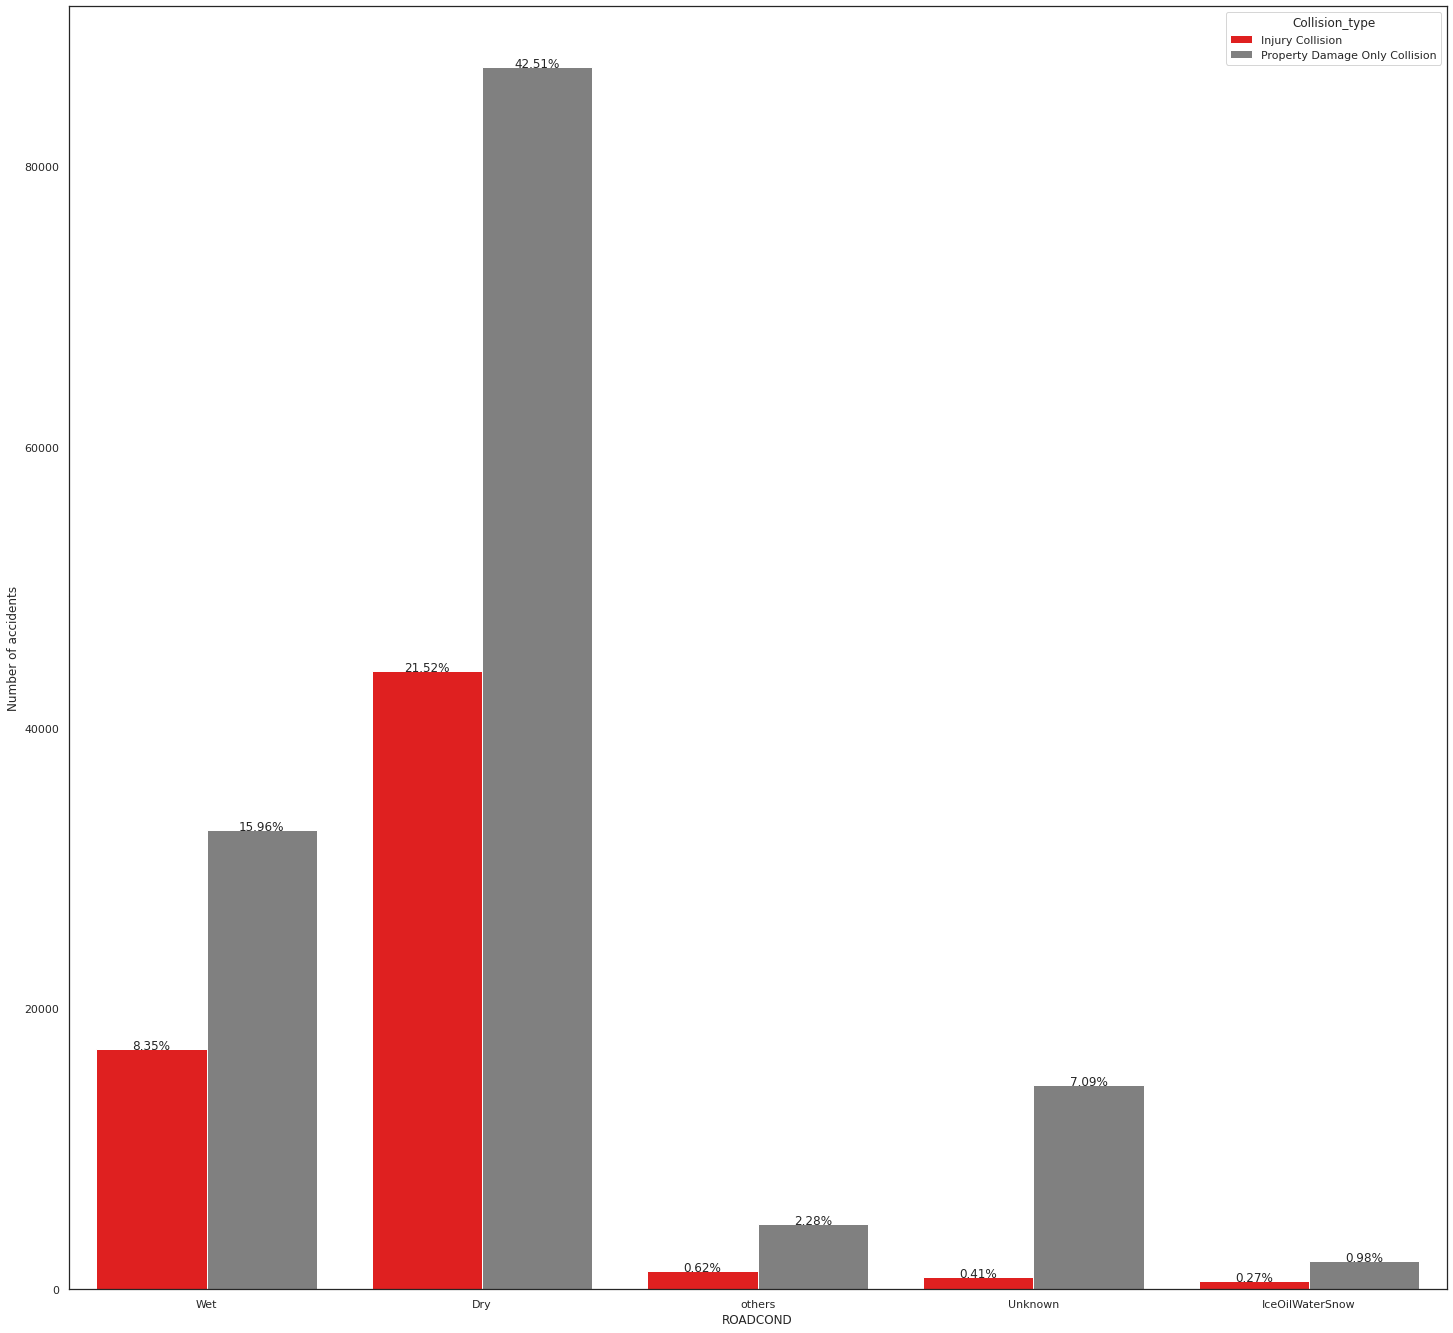

In [104]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="ROADCOND", hue="Collision_type",data=data)
ax.set(xlabel="ROADCOND",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [105]:
#replacing missing values with the most frequent ones and grouping the similar types together
data["LIGHTCOND"].replace(np.nan, data['LIGHTCOND'].value_counts().idxmax(), inplace=True)
data["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
data["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
data["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
data["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
data["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
data["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
data["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
data['LIGHTCOND'].value_counts()

Daylight           121670
Dark-With-Light     51310
Unknown             13846
DuskDawn             8859
others               6128
Dark-No-Light        2945
Name: LIGHTCOND, dtype: int64

In [106]:
# prepare dataframe with simple counts
counts = data.groupby(['LIGHTCOND', 'Collision_type']).size()

counts = counts.rename_axis(['LIGHTCOND', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type   Injury Collision  Property Damage Only Collision
LIGHTCOND                                                        
Dark-No-Light                 752                            2193
Dark-With-Light             16201                           35109
Daylight                    41816                           79854
DuskDawn                     3047                            5812
Unknown                       700                           13146
others                       1318                            4810

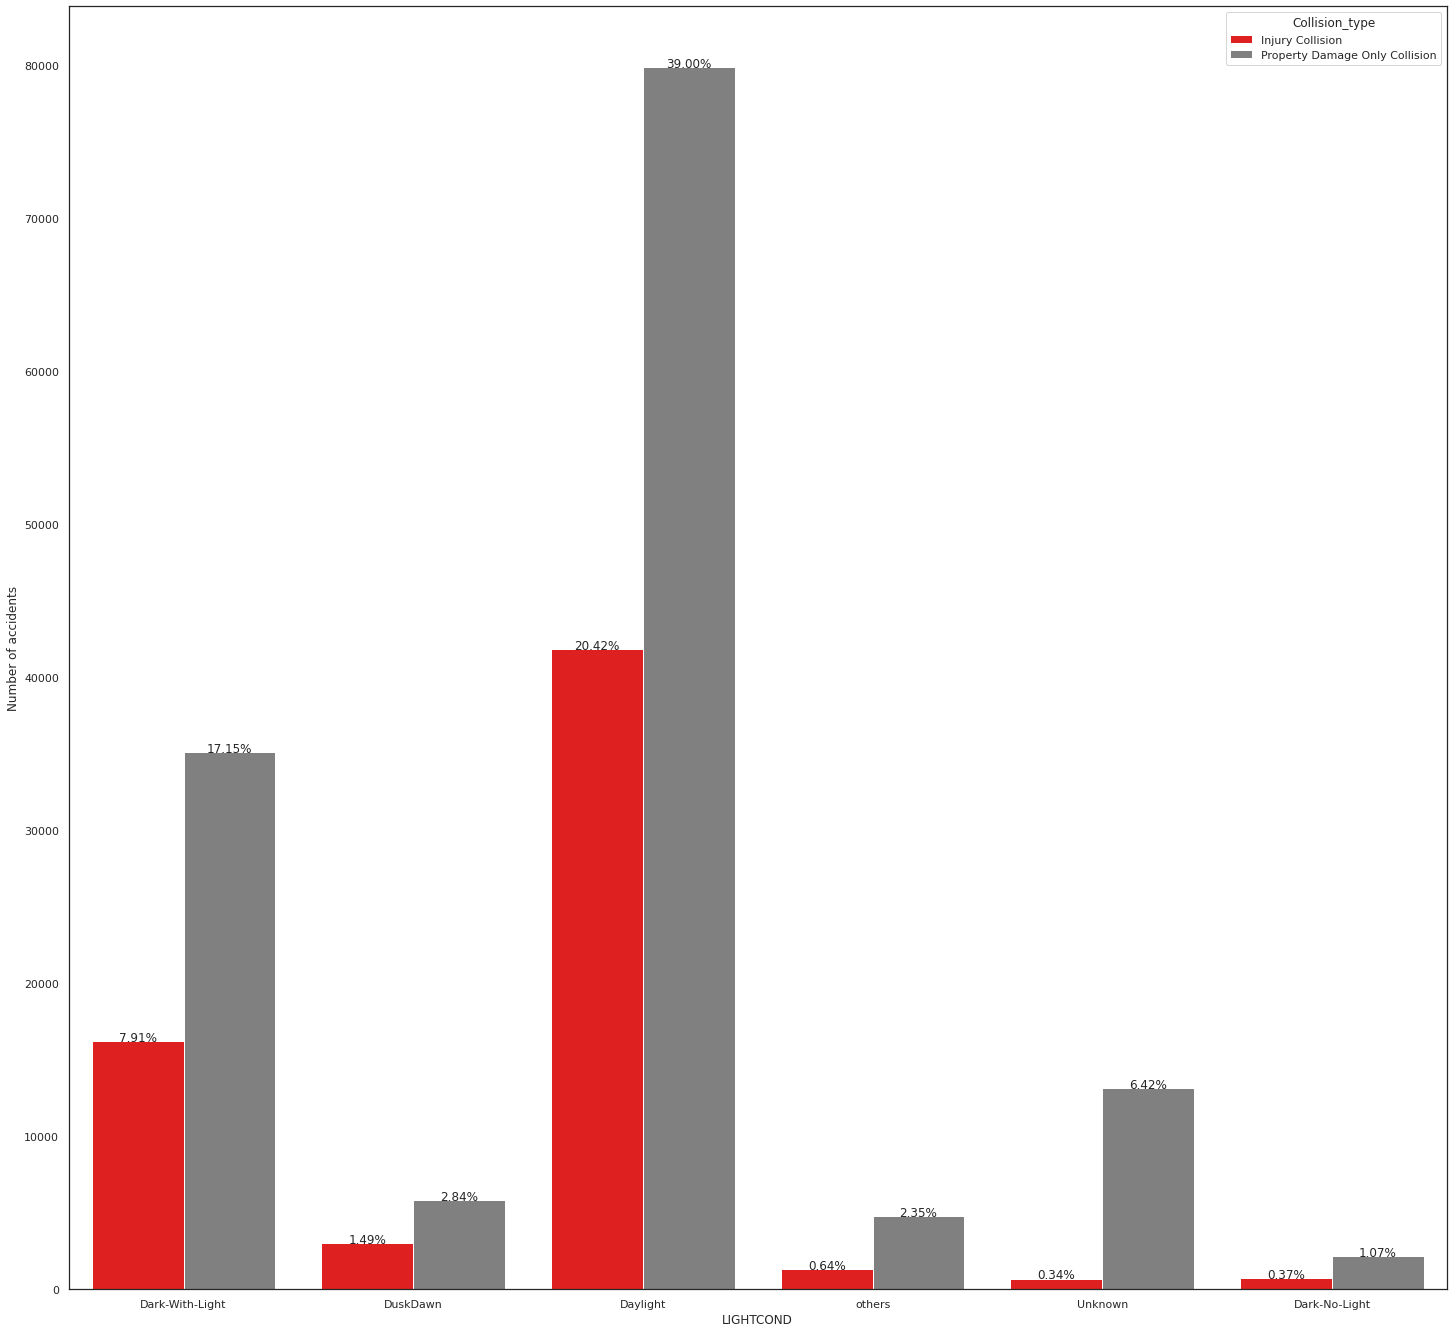

In [107]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="LIGHTCOND", hue="Collision_type",data=data)
ax.set(xlabel="LIGHTCOND",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [108]:
# prepare dataframe with simple counts
counts = data.groupby(['TIMEOFDAY', 'Collision_type']).size()

counts = counts.rename_axis(['TIMEOFDAY', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
TIMEOFDAY                                                       
Late Night                  3675                           10868
Early Morning               6932                           14097
Morning                    10819                           24983
Noon                       15514                           31243
Eve                        13099                           25047
Night                       4769                           11810

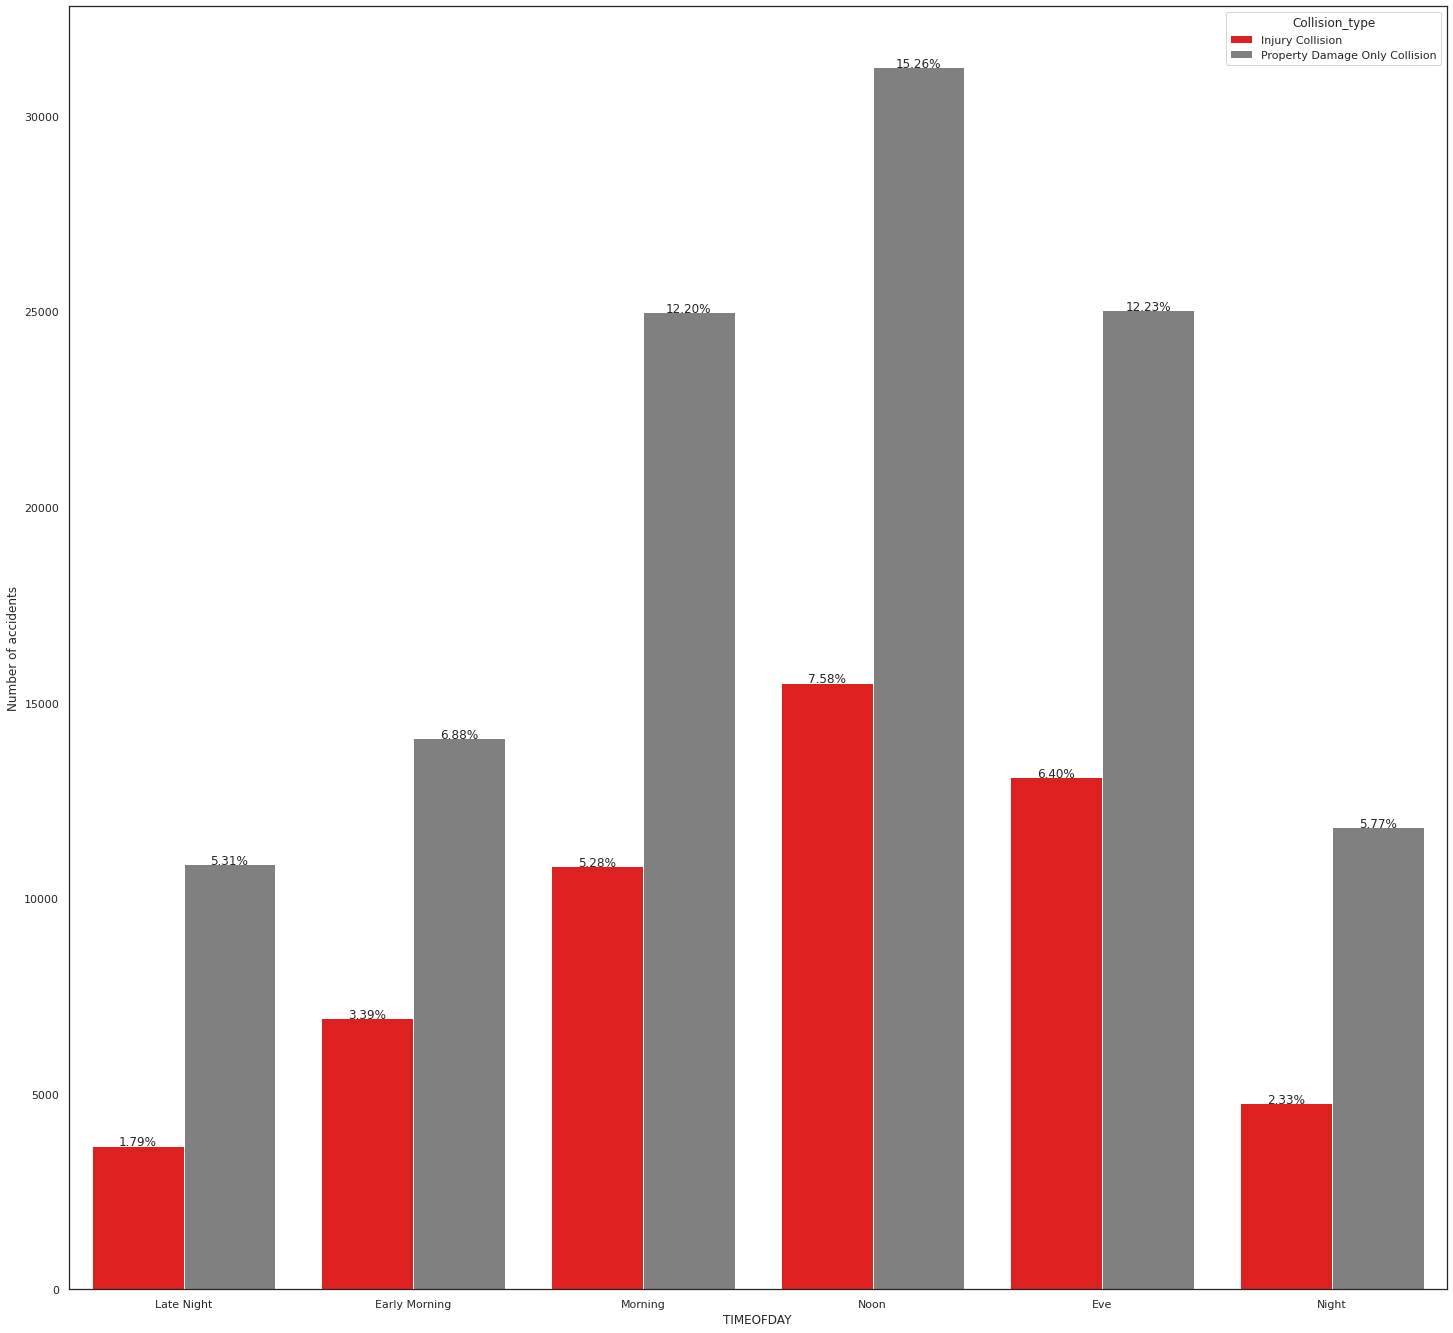

In [109]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="TIMEOFDAY", hue="Collision_type",data=data)
ax.set(xlabel="TIMEOFDAY",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [110]:
# prepare dataframe with simple counts
counts = data.groupby(['SPEEDING', 'Collision_type']).size()

counts = counts.rename_axis(['SPEEDING', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
SPEEDING                                                        
0                          59690                          134882
Y                           4144                            6042

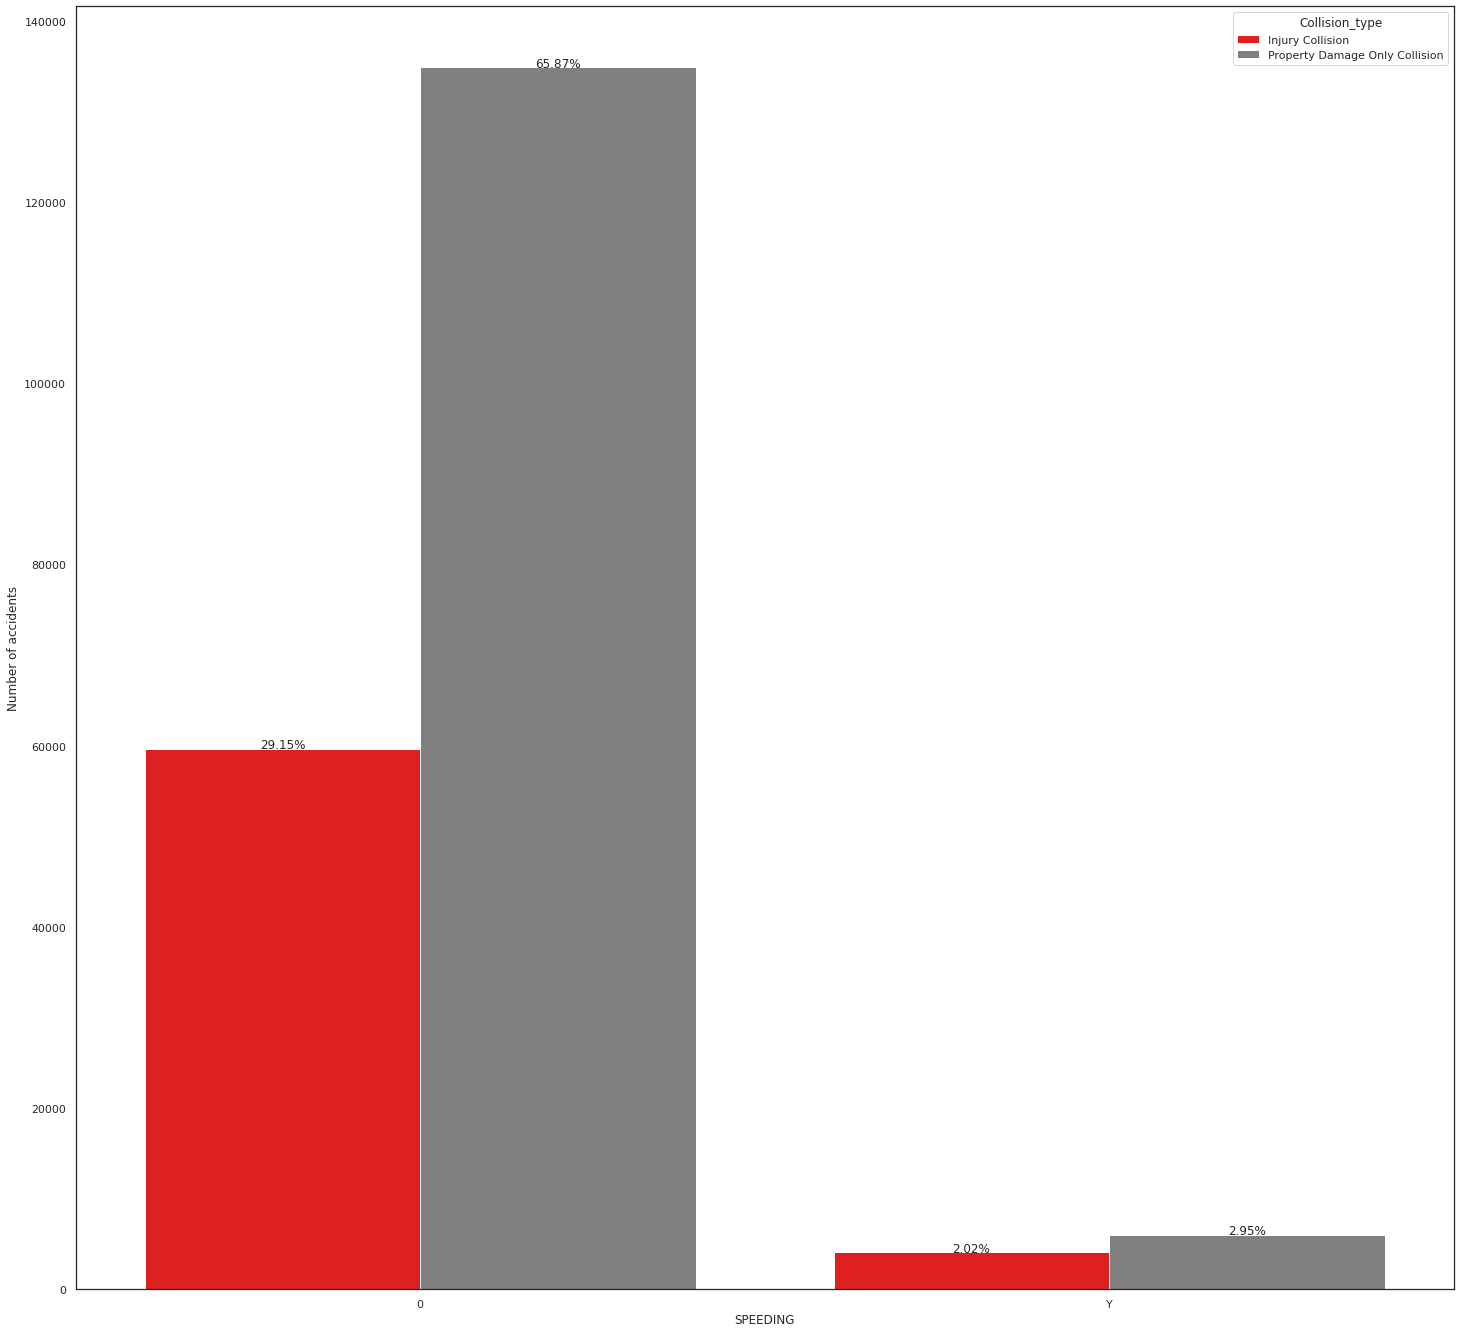

In [111]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="SPEEDING", hue="Collision_type",data=data)
ax.set(xlabel="SPEEDING",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [112]:
# prepare dataframe with simple counts
counts = data.groupby(['HITPARKEDCAR', 'Collision_type']).size()

counts = counts.rename_axis(['HITPARKEDCAR', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
HITPARKEDCAR                                                    
N                          63269                          133213
Y                            565                            7711

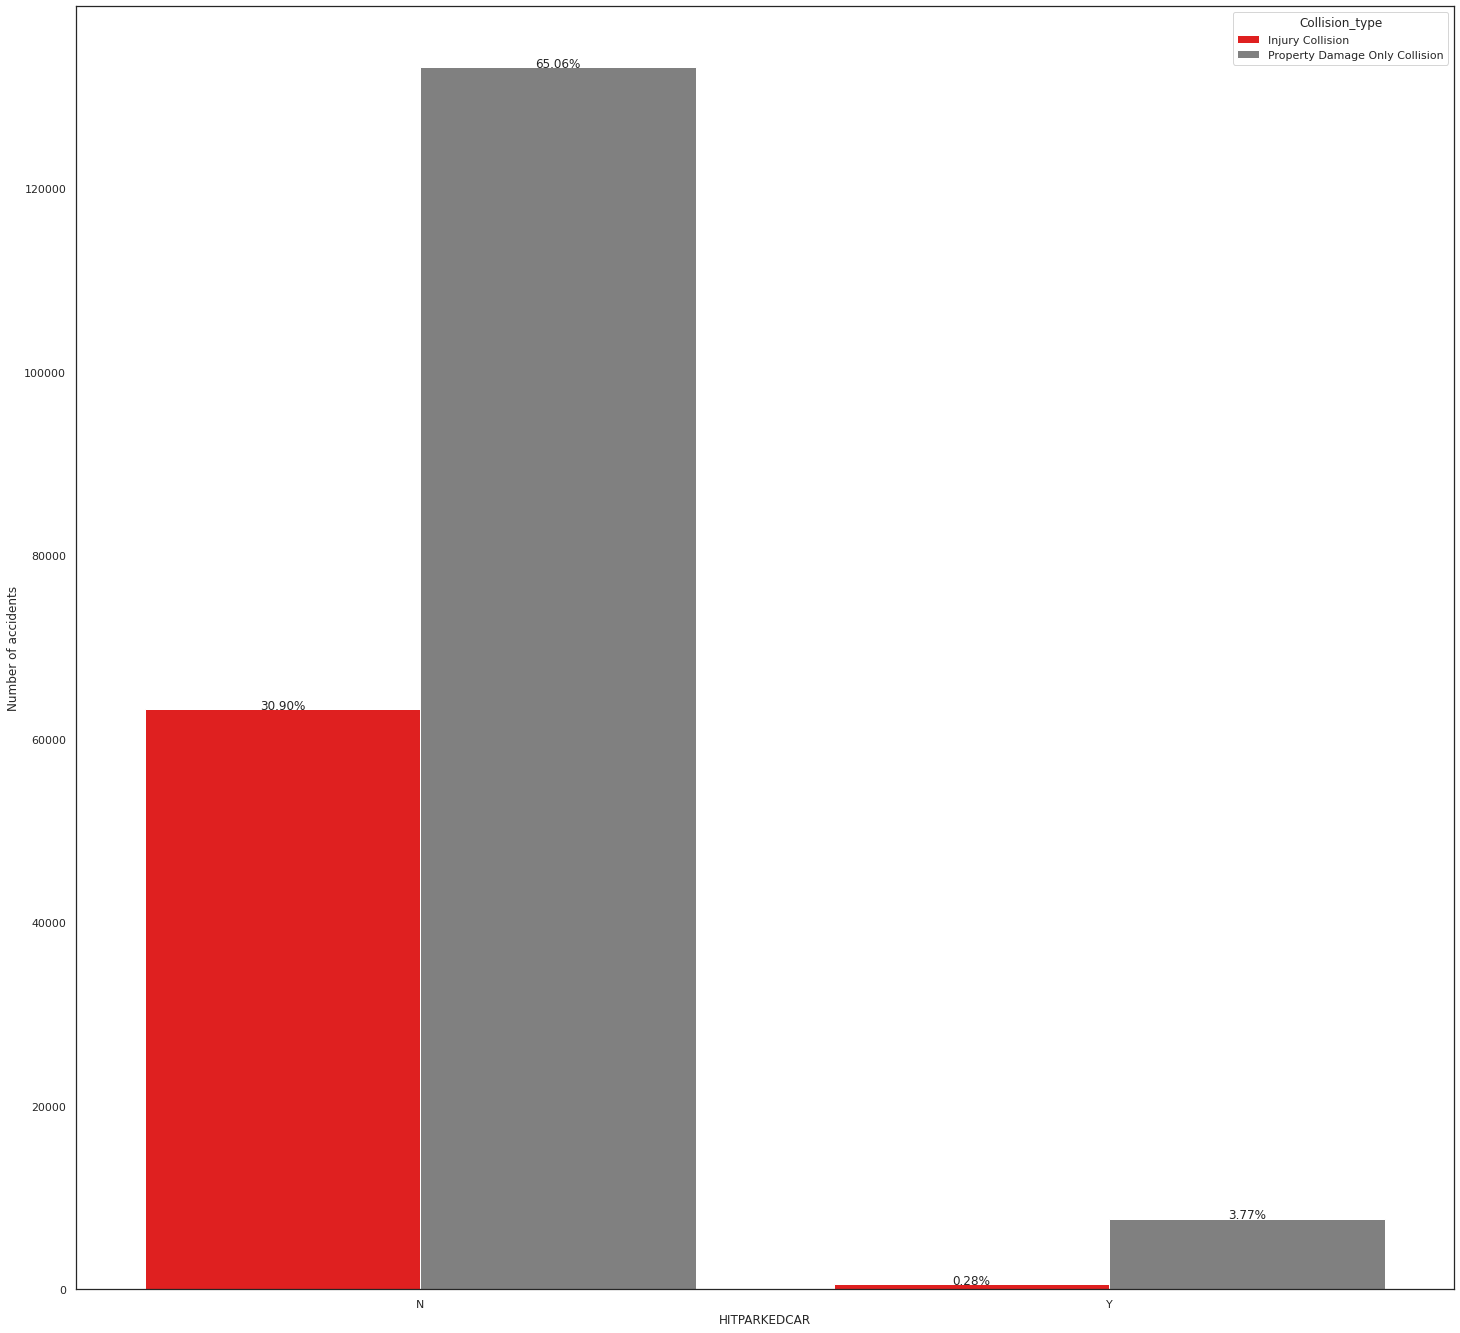

In [113]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="HITPARKEDCAR", hue="Collision_type",data=data)
ax.set(xlabel="HITPARKEDCAR",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [114]:
# prepare dataframe with simple counts
counts = data.groupby(['COLLISIONTYPE', 'Collision_type']).size()

counts = counts.rename_axis(['COLLISIONTYPE', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
COLLISIONTYPE                                                   
Angles                     14626                           21741
Cycles                      5362                             698
Head On                     1049                            1208
Left Turn                   5868                            8532
Other                       6939                           18253
Parked Car                  2927                           46264
Pedestrian                  7155                             698
Rear Ended                 15317                           19981
Right Turn                   658                            2409
Sideswipe                   2677                           16562
others                      1256                            4578

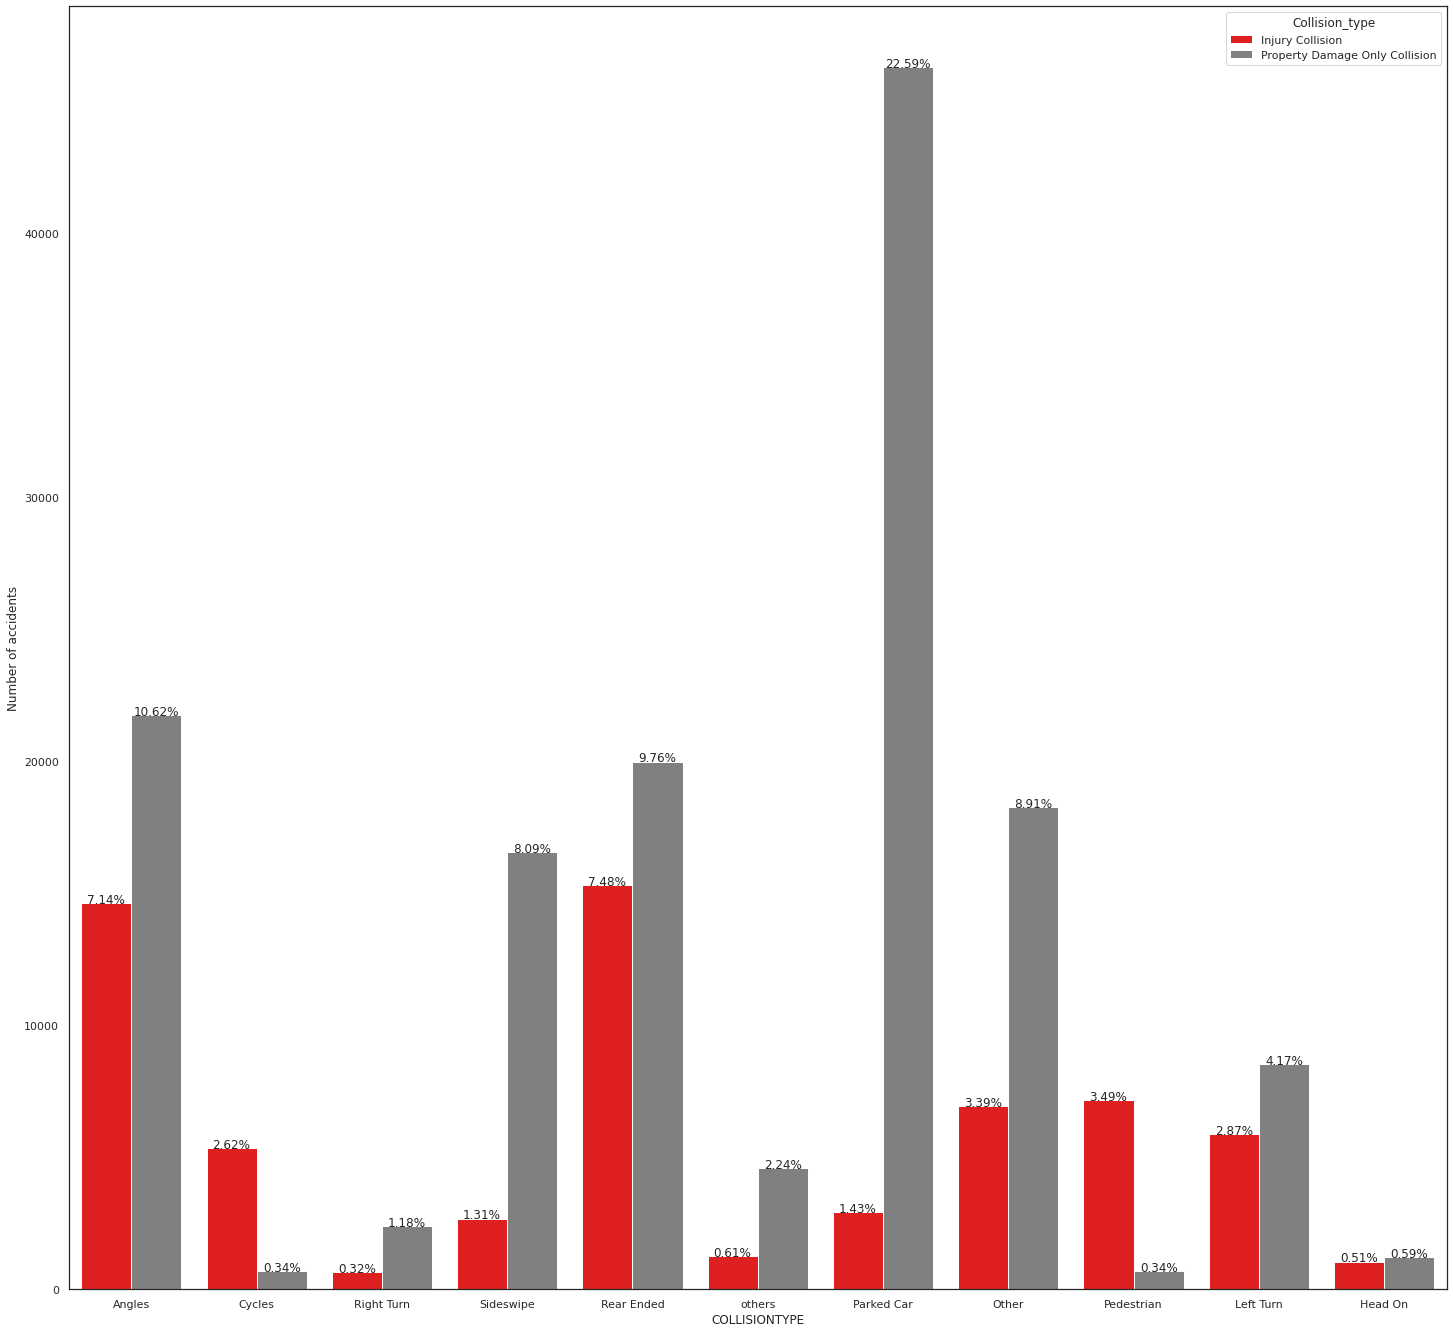

In [115]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="COLLISIONTYPE", hue="Collision_type",data=data)
ax.set(xlabel="COLLISIONTYPE",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [116]:
# prepare dataframe with simple counts
counts = data.groupby(['SERIOUSINJURIES', 'Collision_type']).size()

counts = counts.rename_axis(['SERIOUSINJURIES', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type   Injury Collision  Property Damage Only Collision
SERIOUSINJURIES                                                  
0                         60621.0                        140924.0
1                          3038.0                             NaN
2                           139.0                             NaN
3                            24.0                             NaN
4                             6.0                             NaN
5                             5.0                             NaN
41                            1.0                             NaN

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


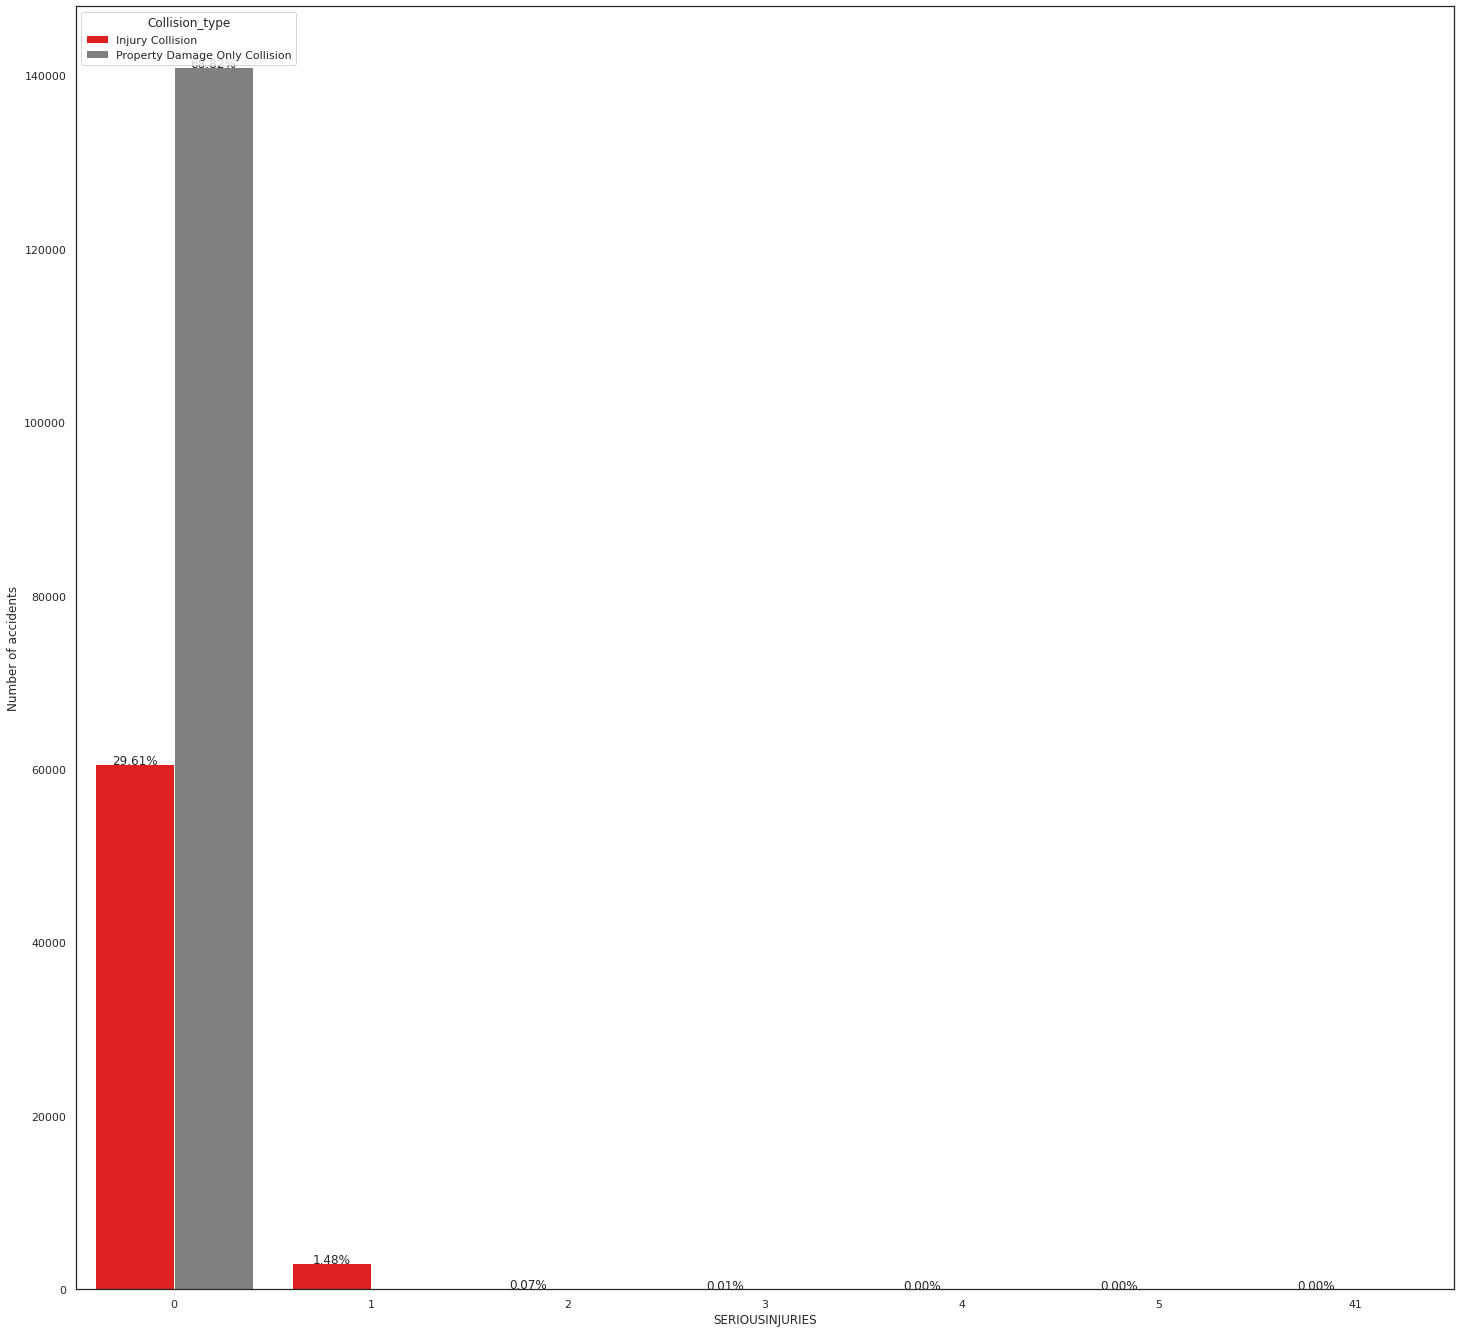

In [117]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="SERIOUSINJURIES", hue="Collision_type",data=data)
ax.set(xlabel="SERIOUSINJURIES",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [118]:
# prepare dataframe with simple counts
counts = data.groupby(['FATALITIES', 'Collision_type']).size()

counts = counts.rename_axis(['FATALITIES', 'Collision_type'])\
                                .unstack('Collision_type')\
                                .rename({ 1:'Property Damage Only Collision', 2:'Injury Collision'}, axis='columns')
counts

Collision_type  Injury Collision  Property Damage Only Collision
FATALITIES                                                      
0                        63460.0                        140924.0
1                          357.0                             NaN
2                           13.0                             NaN
3                            2.0                             NaN
4                            1.0                             NaN
5                            1.0                             NaN

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


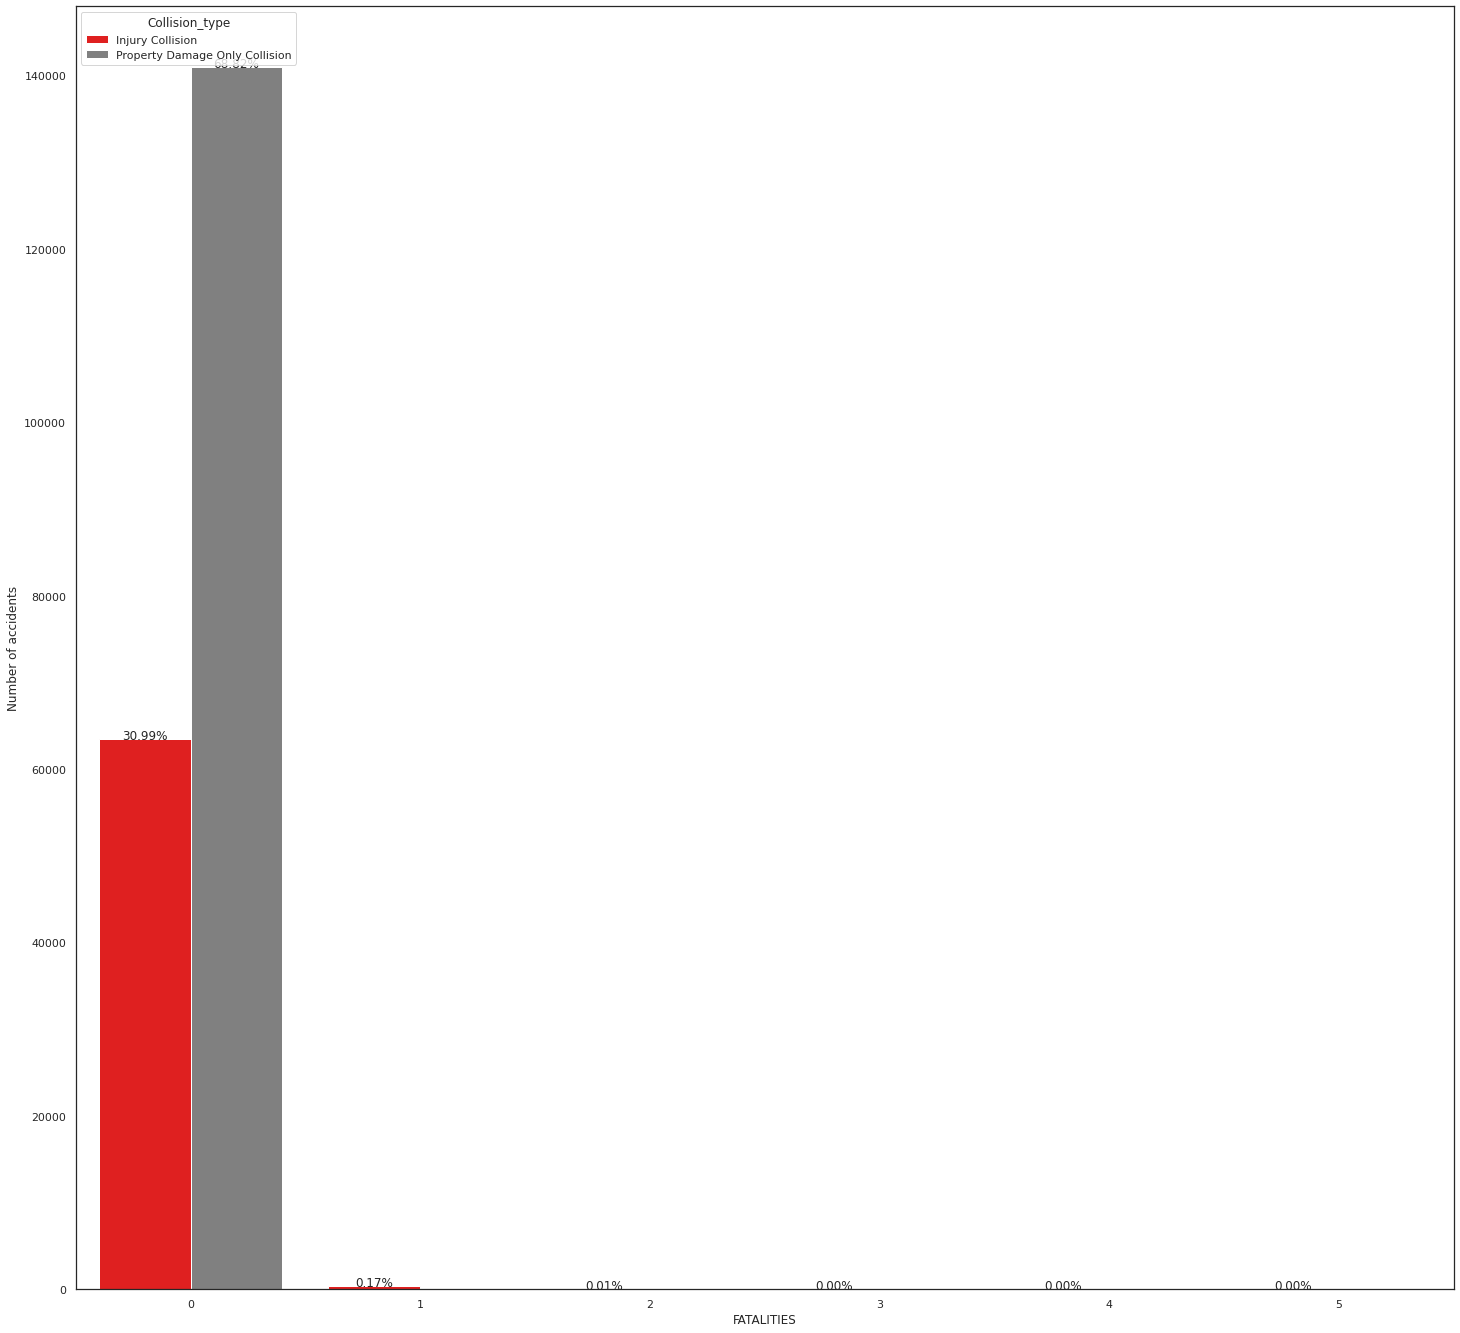

In [119]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="FATALITIES", hue="Collision_type",data=data)
ax.set(xlabel="FATALITIES",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [120]:
data.ADDRTYPE.value_counts()

Block            132499
Intersection      69545
Not Mentioned      1942
Alley               772
Name: ADDRTYPE, dtype: int64

In [121]:
#addrtype
from sklearn import preprocessing
addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','Not Mentioned'])
data['ADDRTYPE'] = addrtype.transform(data['ADDRTYPE'])

In [122]:
#status
from sklearn import preprocessing
status = preprocessing.LabelEncoder()
status.fit(['Unmatched','Matched'])
data['STATUS'] = status.transform(data['STATUS'])

In [123]:
#weather
from sklearn import preprocessing
weathercond = preprocessing.LabelEncoder()
weathercond.fit(data['WEATHER'])
data['WEATHER'] = weathercond.transform(data['WEATHER'])

In [124]:
#Road
from sklearn import preprocessing
roadcond = preprocessing.LabelEncoder()
roadcond.fit(data['ROADCOND'])
data['ROADCOND'] = roadcond.transform(data['ROADCOND'])

In [125]:
#light
from sklearn import preprocessing
light = preprocessing.LabelEncoder()
light.fit(data['LIGHTCOND'])
data['LIGHTCOND'] = light.transform(data['LIGHTCOND'])

In [126]:
#collision type
from sklearn import preprocessing
coll = preprocessing.LabelEncoder()
coll.fit(data['COLLISIONTYPE'])
data['COLLISIONTYPE'] = coll.transform(data['COLLISIONTYPE'])

In [127]:
#junction type
from sklearn import preprocessing
jun = preprocessing.LabelEncoder()
jun.fit(data['JUNCTIONTYPE'])
data['JUNCTIONTYPE'] = jun.transform(data['JUNCTIONTYPE'])

In [128]:
encoding = {
"TIMEOFDAY": {"Early Morning": 1, "Morning": 2, "Noon": 3,  "Eve": 4, "Night": 5, "Late Night": 6 }
}
data.replace(encoding, inplace=True)
print(data['TIMEOFDAY'].value_counts())

3.0    46757
4.0    38146
2.0    35802
1.0    21029
5.0    16579
6.0    14543
Name: TIMEOFDAY, dtype: int64


In [129]:
data.SPEEDING.value_counts()

0    194572
Y     10186
Name: SPEEDING, dtype: int64

In [130]:
encoding = {
"SPEEDING": {"0": 1, "Y": 2 }
}
data.replace(encoding, inplace=True)
print(data['SPEEDING'].value_counts())

0    194572
2     10186
Name: SPEEDING, dtype: int64


In [131]:
#split the data

X = data[['OBJECTID','INCKEY','STATUS','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','SPEEDING','TIMEOFDAY',
          'VEHCOUNT','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
y = data['Collision_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(163806, 15)
(163806,)

Test set size
(40952, 15)
(40952,)


In [133]:
# Imports and initial setup
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
plt.style.use('fivethirtyeight')
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import seaborn as sns
import time
from IPython.display import Image
import matplotlib as mpl
# Undersampling and Oversampling for class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
%matplotlib inline
import matplotlib.pyplot as plt
# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb
import matplotlib as mpl
# Metrics & Corss-Validation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, make_scorer, classification_report, confusion_matrix)
import statsmodels
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
from pandas_profiling import ProfileReport
import plotly.express as px
import pprint
import plotly.graph_objs as go
import matplotlib as mpl
import calendar
import warnings
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

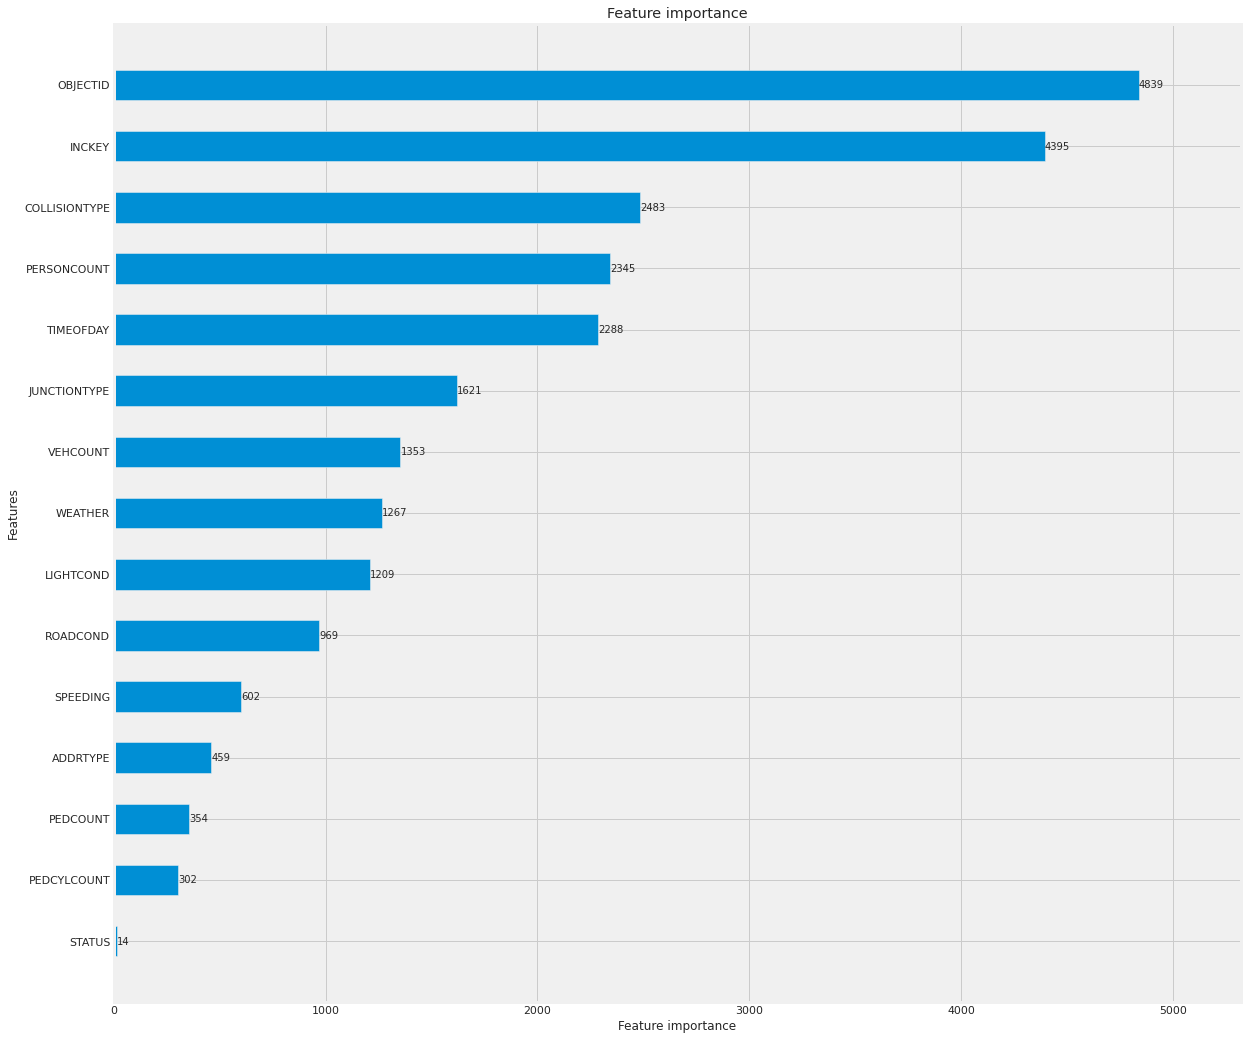

In [134]:
from matplotlib import pyplot
from lightgbm import plot_importance, plot_tree
import lightgbm as lgbm
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(learning_rate =0.03, max_depth=40, min_data_in_leaf=10,
                   n_estimators=500, num_leaves=50, random_state = 42)
lgbm_clf.fit(X_train,y_train)
plot_importance(lgbm_clf,height=0.5,figsize=(18,18))

In [135]:
import shap
import xgboost

In [136]:
import xgboost
import shap

# train XGBoost model
model = xgboost.XGBClassifier().fit(X_train, y_train)

# compute SHAP values
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

 99%|===================| 40722/40952 [00:55<00:00]        

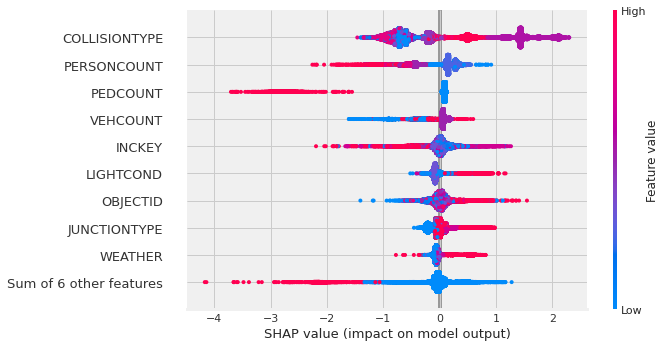

In [137]:
shap.plots.beeswarm(shap_values)

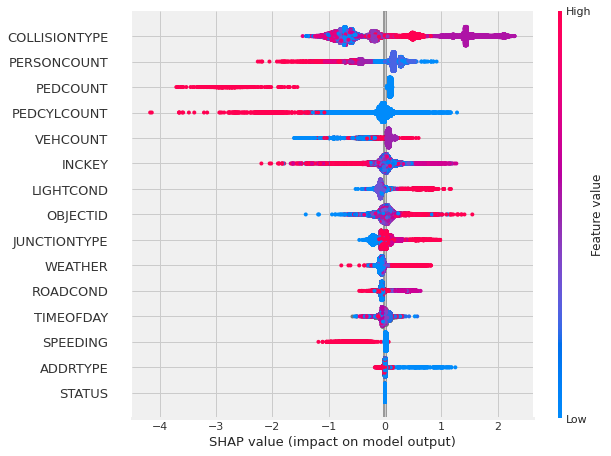

In [138]:
shap.summary_plot(shap_values, X_test, show=False, max_display=X.shape[1])

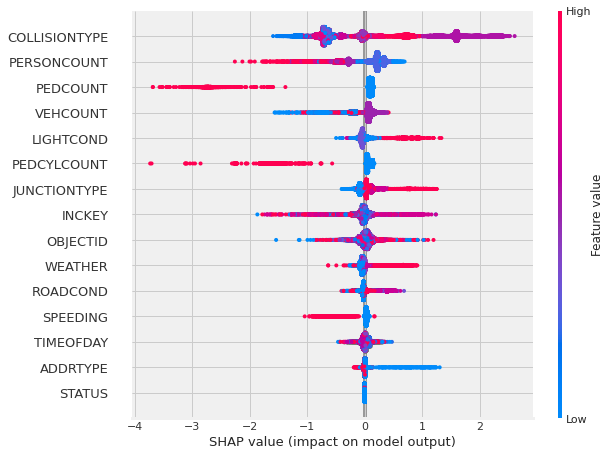

In [139]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
#shap.summary_plot(shap_values[1], X_test)
shap.summary_plot(shap_values, X_test, show=False, max_display=X.shape[1])

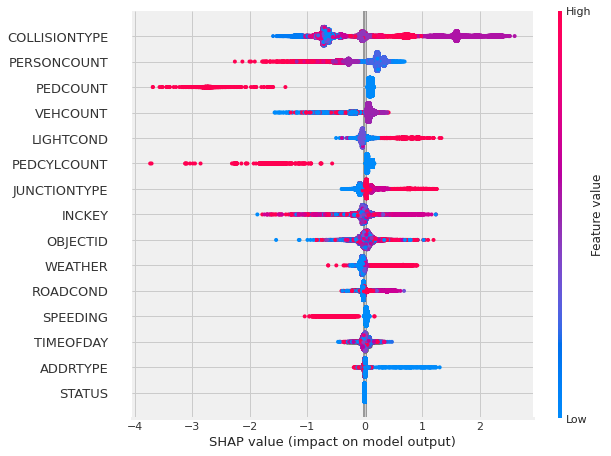

In [140]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
#shap.summary_plot(shap_values[1], X_test)
shap.summary_plot(shap_values, X_test, show=False, max_display=X.shape[1])